<a href="https://colab.research.google.com/github/AmanMinhas/Eth-Price-Prediction-Time-Series/blob/main/eth_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import ETH CSV Data from Google Drive

In [1]:
##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
import sys

drive.mount('/content/gdrive')
base_dir_path = "gdrive/My Drive/UpGrad/LJMU_ETH"
sys.path.insert(0, base_dir_path)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
# import libraties
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [3]:
# Create ratings dataframe from csv
# eth_history_df = pd.read_csv(f"{base_dir_path}/ETH_day.csv")
# eth_history_df = pd.read_csv(f"{base_dir_path}/ETH-USD.csv")
eth_history_df = pd.read_csv(f"{base_dir_path}/ETH-USD-2017-to-2022.csv")
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0  2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984

In [4]:
eth_history_df.shape

(1656, 7)

## EDA

In [5]:
# Check null values
eth_history_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
eth_history_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [7]:
eth_history_df['Date']= pd.to_datetime(eth_history_df['Date'])

In [8]:
eth_history_df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [9]:
eth_history_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1656 non-null   datetime64[ns]
 1   Open       1656 non-null   float64       
 2   High       1656 non-null   float64       
 3   Low        1656 non-null   float64       
 4   Close      1656 non-null   float64       
 5   Adj Close  1656 non-null   float64       
 6   Volume     1656 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 90.7 KB


In [10]:
eth_history_df.head(5)

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  
0   893249984  
1   885985984  
2   842300992  
3  1613479936  
4  1041889984

In [11]:
print(min(eth_history_df.Date))
print(max(eth_history_df.Date))

2017-11-09 00:00:00
2022-05-22 00:00:00


In [12]:
max(eth_history_df.Date) - min(eth_history_df.Date)

Timedelta('1655 days 00:00:00')

In [13]:
eth_history_df["Volume_in_mil"] = eth_history_df.Volume/1000000
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  Volume_in_mil  
0   893249984     893.249984  
1   885985984     885.985984  
2   842300992     842.300992  
3  1613479936    1613.479936  
4  1041889984    1041.889984

In [14]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1656.000000  1656.000000  1656.000000  1656.000000  1656.000000   
mean   1089.564423  1125.743039  1048.515601  1090.346649  1090.346649   
std    1257.446529  1296.179233  1212.577886  1256.993990  1256.993990   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.959374   204.750748   194.701446   199.109505   199.109505   
50%     401.863403   416.879440   390.609222   403.069519   403.069519   
75%    1894.838776  1970.725159  1811.366547  1901.912811  1901.912811   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil  
count  1.656000e+03    1656.000000  
mean   1.265775e+10   12657.748528  
std    1.116089e+10   11160.885794  
min    6.217330e+08     621.732992  
25%    3.394947e+09    3394.947292  
50%    9.917412e+09    9917.412067  
75%    1.802079e+10   18020.789932  
max    8.448291e+10   84482.912776

In [15]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  
0      320.884003    893249984     893.249984  
1      299.252991    885985984     885.985984  
2      314.681000    842300992     842.300992  
3      307.907990   1613479936    1613.479936  
4      316.716003   1041889984    1041.889984  
...           ...          ...            ...  
1646  2014.418213  24816096567   24816.096567  
1647  2056.273926  15457044616   15457.044616  
1648  2145.706787  14846088335   14846.088335  
1649  2022.725952  21459552191   21459.552191  
1650  2090.409180  18509929297   18509.929297  

[1651 rows x 8 columns]

In [16]:
eth_history_df = eth_history_df.sort_values(by="Date")
eth_history_df.head()

Date        Open        High         Low       Close   Adj Close  \
0 2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
1 2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2 2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3 2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4 2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

       Volume  Volume_in_mil  
0   893249984     893.249984  
1   885985984     885.985984  
2   842300992     842.300992  
3  1613479936    1613.479936  
4  1041889984    1041.889984

In [17]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1656.000000  1656.000000  1656.000000  1656.000000  1656.000000   
mean   1089.564423  1125.743039  1048.515601  1090.346649  1090.346649   
std    1257.446529  1296.179233  1212.577886  1256.993990  1256.993990   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.959374   204.750748   194.701446   199.109505   199.109505   
50%     401.863403   416.879440   390.609222   403.069519   403.069519   
75%    1894.838776  1970.725159  1811.366547  1901.912811  1901.912811   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil  
count  1.656000e+03    1656.000000  
mean   1.265775e+10   12657.748528  
std    1.116089e+10   11160.885794  
min    6.217330e+08     621.732992  
25%    3.394947e+09    3394.947292  
50%    9.917412e+09    9917.412067  
75%    1.802079e+10   18020.789932  
max    8.448291e+10   84482.912776

In [18]:
# Minimum close price
eth_history_df[eth_history_df.Close == eth_history_df.Close.min()]

Date       Open       High        Low      Close  Adj Close  \
400 2018-12-14  86.630356  87.144943  83.226479  84.308296  84.308296   

         Volume  Volume_in_mil  
400  1651491877    1651.491877

In [19]:
# Maximum close price
eth_history_df[eth_history_df.Close == eth_history_df.Close.max()]

Date         Open         High          Low        Close  \
1460 2021-11-08  4619.649414  4822.363281  4619.649414  4812.087402   

        Adj Close       Volume  Volume_in_mil  
1460  4812.087402  19290896267   19290.896267

In [20]:
# Minimum trade volume
eth_history_df[eth_history_df.Volume_in_mil == eth_history_df.Volume_in_mil.min()]

Date        Open        High        Low       Close   Adj Close  \
8 2017-11-17  330.166992  334.963989  327.52301  332.394012  332.394012   

      Volume  Volume_in_mil  
8  621732992     621.732992

In [21]:
# Maximum trade volume
eth_history_df[eth_history_df.Volume_in_mil == eth_history_df.Volume_in_mil.max()]

Date         Open         High          Low        Close  \
1287 2021-05-19  3382.657227  3437.935791  1952.460205  2460.679199   

        Adj Close       Volume  Volume_in_mil  
1287  2460.679199  84482912776   84482.912776

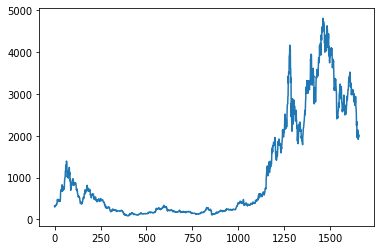

In [22]:
plt.plot(eth_history_df.Close)

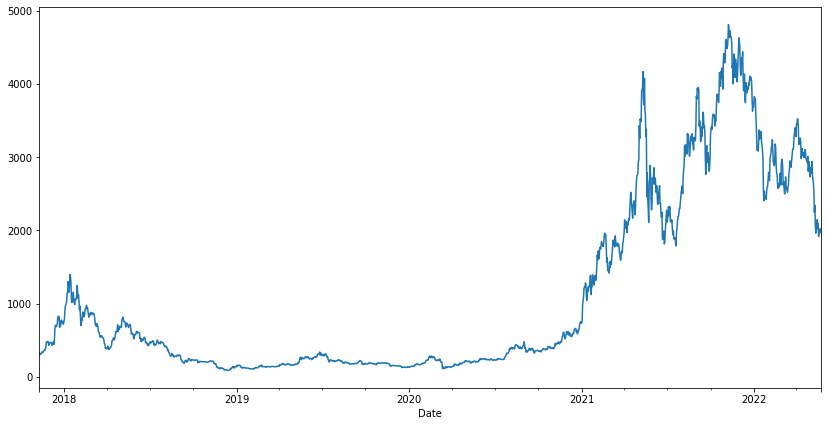

In [23]:
eth_history_date_index_df = eth_history_df.copy()
eth_history_date_index_df = eth_history_date_index_df.set_index('Date')
eth_history_date_index_df.Close.plot(figsize=(14,7))

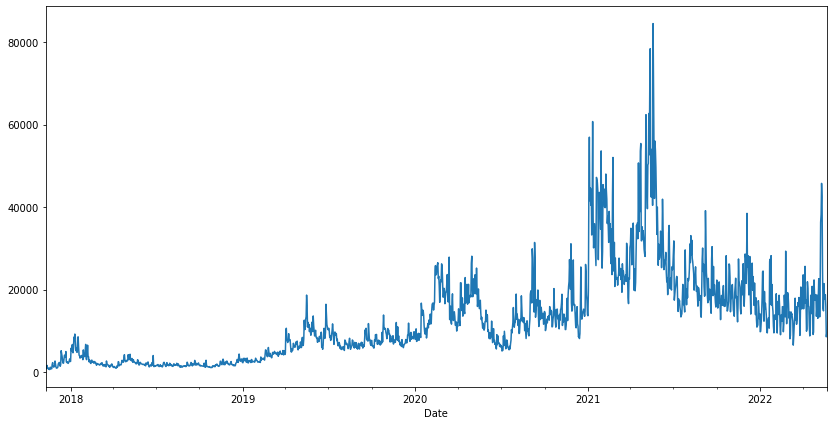

In [24]:
eth_history_date_index_df.Volume_in_mil.plot(figsize=(14,7))

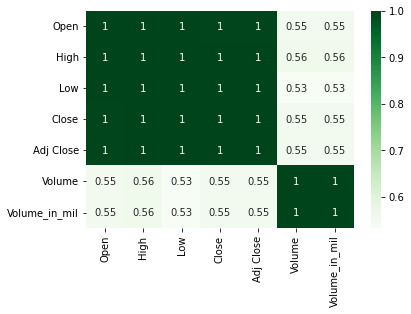

In [25]:
sns.heatmap(eth_history_date_index_df.corr(), annot=True, cmap="Greens")
plt.show()

In [26]:
eth_history_df.Close

0        320.884003
1        299.252991
2        314.681000
3        307.907990
4        316.716003
           ...     
1651    1916.656128
1652    2018.336182
1653    1961.315674
1654    1974.518311
1655    2017.376343
Name: Close, Length: 1656, dtype: float64

In [27]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  
0      320.884003    893249984     893.249984  
1      299.252991    885985984     885.985984  
2      314.681000    842300992     842.300992  
3      307.907990   1613479936    1613.479936  
4      316.716003   1041889984    1041.889984  
...           ...          ...            ...  
1646  2014.418213  24816096567   24816.096567  
1647  2056.273926  15457044616   15457.044616  
1648  2145.706787  14846088335   14846.088335  
1649  2022.725952  21459552191   21459.552191  
1650  2090.409180  18509929297   18509.929297  

[1651 rows x 8 columns]

In [28]:
# Calculate deltaClose and deltaPctClose
eth_history_df['deltaClose'] = eth_history_df['Close'].diff()
eth_history_df['deltaPctClose'] = eth_history_df['Close'].pct_change()
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
0    2017-11-09   308.644989   329.451996   307.056000   320.884003   
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
0      320.884003    893249984     893.249984         NaN            NaN  
1      299.252991    885985984     885.985984  -21.631012      -0.067411  
2      314.681000    842300992     842.300992   15.428009       0.051555  
3      307.907990   1613479936    1613.479936   -6.773010      -0.021523  
4      316.716003   1041889984    1041.889984    8.808013       0.028606  
...           ...          ...            ...         ...            ...  
1646  2014.418213  24816096567   24816.096567   52.716675       0.026873  
1647  2056.273926  15457044616   15457.044616   41.855713       0.020778  
1648  2145.706787  14846088335   14846.088335   89.432861       0.043493  
1649  2022.725952  21459552191   21459.552191 -122.980835      -0.057315  
1650  2090.409180  18509929297   18509.929297   67.683228       0.033461  

[1651 rows x 10 columns]

In [29]:
eth_history_df.shape

(1656, 10)

In [30]:
# Drop first row where deltaClose is NaN
eth_history_df = eth_history_df.iloc[1:, :]
eth_history_df.shape

(1655, 10)

In [31]:
eth_history_df.head(-5)

Date         Open         High          Low        Close  \
1    2017-11-10   320.670990   324.717987   294.541992   299.252991   
2    2017-11-11   298.585999   319.453003   298.191986   314.681000   
3    2017-11-12   314.690002   319.153015   298.513000   307.907990   
4    2017-11-13   307.024994   328.415009   307.024994   316.716003   
5    2017-11-14   316.763000   340.177002   316.763000   337.631012   
...         ...          ...          ...          ...          ...   
1646 2022-05-13  1960.122559  2139.713379  1941.975952  2014.418213   
1647 2022-05-14  2014.280640  2063.429932  1956.572998  2056.273926   
1648 2022-05-15  2056.183105  2147.194336  2008.162720  2145.706787   
1649 2022-05-16  2145.836914  2145.836914  1988.811768  2022.725952   
1650 2022-05-17  2022.882324  2113.059814  2015.971558  2090.409180   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
1      299.252991    885985984     885.985984  -21.631012      -0.067411  
2      314.681000    842300992     842.300992   15.428009       0.051555  
3      307.907990   1613479936    1613.479936   -6.773010      -0.021523  
4      316.716003   1041889984    1041.889984    8.808013       0.028606  
5      337.631012   1069680000    1069.680000   20.915009       0.066037  
...           ...          ...            ...         ...            ...  
1646  2014.418213  24816096567   24816.096567   52.716675       0.026873  
1647  2056.273926  15457044616   15457.044616   41.855713       0.020778  
1648  2145.706787  14846088335   14846.088335   89.432861       0.043493  
1649  2022.725952  21459552191   21459.552191 -122.980835      -0.057315  
1650  2090.409180  18509929297   18509.929297   67.683228       0.033461  

[1650 rows x 10 columns]

In [32]:
def print_col_min_max(df, col):
  display(df[(df[col] == df[col].max()) | (df[col] == df[col].min())])

print_col_min_max(eth_history_df, 'deltaClose')
print_col_min_max(eth_history_df, 'deltaPctClose')

Date         Open         High          Low        Close  \
1287 2021-05-19  3382.657227  3437.935791  1952.460205  2460.679199   
1292 2021-05-24  2099.936035  2672.595703  2090.639648  2643.591064   

        Adj Close       Volume  Volume_in_mil  deltaClose  deltaPctClose  
1287  2460.679199  84482912776   84482.912776 -919.390869      -0.272003  
1292  2643.591064  53697121740   53697.121740  534.011230       0.253136

Date        Open        High         Low       Close   Adj Close  \
33  2017-12-12  522.286011  657.317993  504.493988  651.431030  651.431030   
854 2020-03-12  194.738922  195.147934  111.210709  112.347122  112.347122   

          Volume  Volume_in_mil  deltaClose  deltaPctClose  
33    5179829760    5179.829760  136.295044       0.264581  
854  22134741655   22134.741655  -82.521408      -0.423472

In [33]:
eth_history_df.loc['2020-03-10':'2020-03-15']

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Volume_in_mil, deltaClose, deltaPctClose]
Index: []

In [34]:
eth_history_df.loc['2017-12-10':'2017-12-15']
# eth_history_df.loc[(eth_history_df.index.month==12)].head(15)

Empty DataFrame
Columns: [Date, Open, High, Low, Close, Adj Close, Volume, Volume_in_mil, deltaClose, deltaPctClose]
Index: []

In [35]:
eth_history_df.head(20)

Date        Open        High         Low       Close   Adj Close  \
1  2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2  2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
3  2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
4  2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
5  2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   
6  2017-11-15  337.963989  340.911987  329.812988  333.356995  333.356995   
7  2017-11-16  333.442993  336.158997  323.605988  330.924011  330.924011   
8  2017-11-17  330.166992  334.963989  327.523010  332.394012  332.394012   
9  2017-11-18  331.980011  349.615997  327.687012  347.612000  347.612000   
10 2017-11-19  347.401001  371.290985  344.739990  354.385986  354.385986   
11 2017-11-20  354.093994  372.136993  353.289001  366.730011  366.730011   
12 2017-11-21  367.442993  372.470001  350.692993  360.401001  360.401001   
13 2017-11-22  360.312012  381.420013  360.147003  380.652008  380.652008   
14 2017-11-23  381.438995  425.548004  376.088013  410.165985  410.165985   
15 2017-11-24  412.501007  480.972992  402.757996  474.911011  474.911011   
16 2017-11-25  475.675995  485.191986  461.053009  466.276001  466.276001   
17 2017-11-26  465.973999  472.722992  451.605988  471.329987  471.329987   
18 2017-11-27  471.531006  493.404999  468.484985  480.355011  480.355011   
19 2017-11-28  480.518005  482.480011  466.346985  472.902008  472.902008   
20 2017-11-29  473.281006  522.307007  425.071014  427.523010  427.523010   

        Volume  Volume_in_mil  deltaClose  deltaPctClose  
1    885985984     885.985984  -21.631012      -0.067411  
2    842300992     842.300992   15.428009       0.051555  
3   1613479936    1613.479936   -6.773010      -0.021523  
4   1041889984    1041.889984    8.808013       0.028606  
5   1069680000    1069.680000   20.915009       0.066037  
6    722665984     722.665984   -4.274017      -0.012659  
7    797254016     797.254016   -2.432984      -0.007298  
8    621732992     621.732992    1.470001       0.004442  
9    649638976     649.638976   15.217988       0.045783  
10  1181529984    1181.529984    6.773986       0.019487  
11   807027008     807.027008   12.344025       0.034832  
12   949912000     949.912000   -6.329010      -0.017258  
13   800819008     800.819008   20.251007       0.056190  
14  1845680000    1845.680000   29.513977       0.077535  
15  2292829952    2292.829952   64.745026       0.157851  
16  1422080000    1422.080000   -8.635010      -0.018182  
17  1197779968    1197.779968    5.053986       0.010839  
18  1396480000    1396.480000    9.025024       0.019148  
19  1346499968    1346.499968   -7.453003      -0.015516  
20  2675940096    2675.940096  -45.378998      -0.095959

In [36]:
eth_history_df = eth_history_df.set_index('Date')

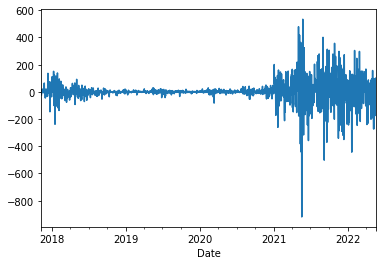

In [37]:
# Plot deltaClose
eth_history_df.deltaClose.plot()

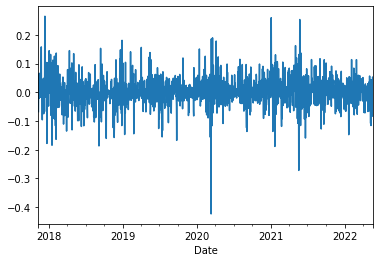

In [38]:
# Plot deltaPctClose
# plt.plot(eth_history_df.deltaPctClose)
eth_history_df.deltaPctClose.plot()

In [39]:
eth_history_df.describe()

Open         High          Low        Close    Adj Close  \
count  1655.000000  1655.000000  1655.000000  1655.000000  1655.000000   
mean   1090.036278  1126.224181  1048.963612  1090.811581  1090.811581   
std    1257.679934  1296.423071  1212.807284  1257.231479  1257.231479   
min      84.279694    85.342743    82.829887    84.308296    84.308296   
25%     198.936753   204.721497   194.634827   199.030334   199.030334   
50%     402.142944   417.159210   390.609985   403.997040   403.997040   
75%    1896.623963  1971.903321  1811.487244  1905.000427  1905.000427   
max    4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   

             Volume  Volume_in_mil   deltaClose  deltaPctClose  
count  1.655000e+03    1655.000000  1655.000000    1655.000000  
mean   1.266486e+10   12664.856986     1.025071       0.002436  
std    1.116051e+10   11160.508713    80.388975       0.051012  
min    6.217330e+08     621.732992  -919.390869      -0.423472  
25%    3.426054e+09    3426.054254    -9.499260      -0.021530  
50%    9.926712e+09    9926.711979     0.371323       0.001544  
75%    1.803431e+10   18034.306122    13.964226       0.028021  
max    8.448291e+10   84482.912776   534.011230       0.264581

In [40]:
df_close = eth_history_df.reset_index()['Close']
df_deltaClose = eth_history_df.reset_index()['deltaClose']
df_deltaPctClose = eth_history_df.reset_index()['deltaPctClose']

In [41]:
eth_history_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [42]:
print(df_close)
print(df_deltaClose)
print(df_deltaPctClose)

0        299.252991
1        314.681000
2        307.907990
3        316.716003
4        337.631012
           ...     
1650    1916.656128
1651    2018.336182
1652    1961.315674
1653    1974.518311
1654    2017.376343
Name: Close, Length: 1655, dtype: float64
0       -21.631012
1        15.428009
2        -6.773010
3         8.808013
4        20.915009
           ...    
1650   -173.753052
1651    101.680054
1652    -57.020508
1653     13.202637
1654     42.858032
Name: deltaClose, Length: 1655, dtype: float64
0      -0.067411
1       0.051555
2      -0.021523
3       0.028606
4       0.066037
          ...   
1650   -0.083119
1651    0.053051
1652   -0.028251
1653    0.006732
1654    0.021706
Name: deltaPctClose, Length: 1655, dtype: float64


### Time Resampling

In [43]:
eth_history_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [44]:
# Rules 
rule_desc = {
    "MS": "Montly Start Frequency",
    "QS": "Quarterly Start Frequency",
    "A": "Year End Frequency",
}

In [45]:
# Check Max price of ETH at the end of every year
eth_history_df.resample(rule='A').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   827.515991   881.943970   792.689026   826.822998   826.822998   
2018-12-31  1397.479980  1432.880005  1290.599976  1396.420044  1396.420044   
2019-12-31   336.959900   361.398682   315.954865   336.753174   336.753174   
2020-12-31   751.626648   754.303223   726.511902   751.618958   751.618958   
2021-12-31  4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   
2022-12-31  3829.535645  3876.785156  3727.357422  3829.564941  3829.564941   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-12-31   5179829760    5179.829760  136.295044       0.264581  
2018-12-31   9214950400    9214.950400  151.209961       0.180750  
2019-12-31  18661465873   18661.465873   30.004486       0.156042  
2020-12-31  31421134556   31421.134556   50.385926       0.189404  
2021-12-31  84482912776   84482.912776  534.011230       0.259475  
2022-12-31  45743399154   45743.399154  304.424316       0.113627

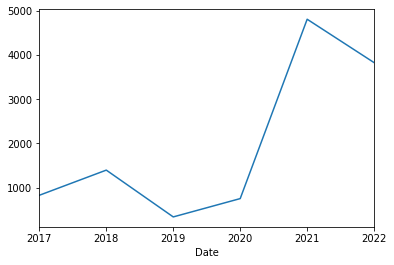

In [46]:
# Plot Max price of ETH at the end of every year
eth_history_df.resample(rule='A').max()['Close'].plot()

In [47]:
# Check Max price of ETH at every quarter
eth_history_df.resample(rule='QS').max()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   827.515991   881.943970   792.689026   826.822998   826.822998   
2018-01-01  1397.479980  1432.880005  1290.599976  1396.420044  1396.420044   
2018-04-01   816.088013   835.057007   784.237000   816.119995   816.119995   
2018-07-01   500.838013   513.432983   488.416992   501.002014   501.002014   
2018-10-01   233.220001   234.145004   226.945007   230.768005   230.768005   
2019-01-01   158.902405   165.549622   154.337418   158.795425   158.795425   
2019-04-01   336.959900   361.398682   315.954865   336.753174   336.753174   
2019-07-01   313.325165   318.223114   305.285828   313.251404   313.251404   
2019-10-01   193.191071   195.942505   188.667679   193.293259   193.293259   
2020-01-01   284.561310   287.123688   264.279663   284.217499   284.217499   
2020-04-01   247.548538   252.222000   242.819748   247.444946   247.444946   
2020-07-01   477.007874   487.211884   432.079193   477.051910   477.051910   
2020-10-01   751.626648   754.303223   726.511902   751.618958   751.618958   
2021-01-01  1959.902954  2036.286499  1896.684448  1960.164795  1960.164795   
2021-04-01  4174.635742  4362.350586  3785.848633  4168.701172  4168.701172   
2021-07-01  3951.520752  4022.469238  3868.994385  3952.133545  3952.133545   
2021-10-01  4810.071289  4891.704590  4718.039063  4812.087402  4812.087402   
2022-01-01  3829.535645  3876.785156  3727.357422  3829.564941  3829.564941   
2022-04-01  3522.364990  3573.960205  3442.000244  3522.833496  3522.833496   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-10-01   5179829760    5179.829760  136.295044       0.264581  
2018-01-01   9214950400    9214.950400  151.209961       0.144702  
2018-04-01   4316120064    4316.120064   92.394043       0.144937  
2018-07-01   2836200000    2836.200000   30.807984       0.152855  
2018-10-01   4370343387    4370.343387   21.071106       0.180750  
2019-01-01   5957715043    5957.715043   14.732445       0.140933  
2019-04-01  18661465873   18661.465873   30.004486       0.156042  
2019-07-01  11757739233   11757.739233   18.153443       0.071311  
2019-10-01  13831784986   13831.784986   19.354660       0.119349  
2020-01-01  27864623061   27864.623061   29.554932       0.189404  
2020-04-01  28089191904   28089.191904   25.589234       0.178264  
2020-07-01  31421134556   31421.134556   41.972168       0.114729  
2020-10-01  31104004592   31104.004592   50.385926       0.098177  
2021-01-01  60733630300   60733.630300  200.972717       0.259475  
2021-04-01  84482912776   84482.912776  534.011230       0.253136  
2021-07-01  39131346397   39131.346397  401.095459       0.116810  
2021-10-01  38478999182   38478.999182  357.061524       0.101889  
2022-01-01  29312342666   29312.342666  304.424316       0.113627  
2022-04-01  45743399154   45743.399154  167.909424       0.056465

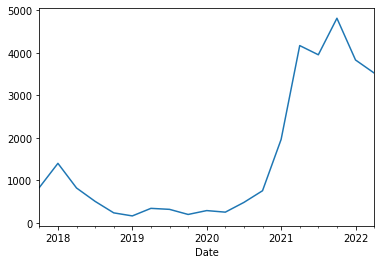

In [48]:
# Plot Max price of ETH at every quarter
eth_history_df.resample(rule='QS').max()['Close'].plot()

In [49]:
# Check Min price of ETH at the end of every year
eth_history_df.resample(rule='A').min()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   298.585999   319.153015   294.541992   299.252991   299.252991   
2018-12-31    84.279694    85.342743    82.829887    84.308296    84.308296   
2019-12-31   104.645050   106.058876   102.934563   104.535301   104.535301   
2020-12-31   110.406784   116.021622    95.184303   110.605873   110.605873   
2021-12-31   730.402649   749.201843   718.109497   730.367554   730.367554   
2022-12-31  1916.149536  1985.395996  1748.303101  1916.656128  1916.656128   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-12-31    621732992     621.732992 -146.203003      -0.178066  
2018-12-31    948488000     948.488000 -238.230103      -0.186866  
2019-12-31   2212109224    2212.109224  -42.485535      -0.167444  
2020-12-31   5109032700    5109.032700  -82.521408      -0.423472  
2021-12-31  10894785525   10894.785525 -919.390869      -0.272003  
2022-12-31   6532996574    6532.996574 -443.188476      -0.147674

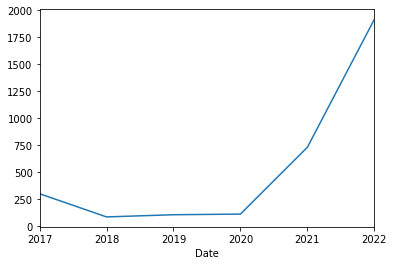

In [50]:
# Plot Min price of ETH at the end of every year
eth_history_df.resample(rule='A').min()['Close'].plot()

In [51]:
# Check Min price of ETH at every quarter
eth_history_df.resample(rule='QS').min()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   298.585999   319.153015   294.541992   299.252991   299.252991   
2018-01-01   385.904999   409.928986   368.632996   385.967987   385.967987   
2018-04-01   370.380005   385.195007   363.804993   370.285004   370.285004   
2018-07-01   183.679001   185.587006   170.257004   183.330994   183.330994   
2018-10-01    84.279694    85.342743    82.829887    84.308296    84.308296   
2019-01-01   104.645050   106.058876   102.934563   104.535301   104.535301   
2019-04-01   141.465485   142.733994   140.737564   141.830322   141.830322   
2019-07-01   166.651703   170.773514   157.130325   166.727127   166.727127   
2019-10-01   122.656837   128.097565   119.780060   122.603889   122.603889   
2020-01-01   110.406784   116.021622    95.184303   110.605873   110.605873   
2020-04-01   133.612320   135.634552   129.730942   135.634552   135.634552   
2020-07-01   225.288483   229.629318   224.544495   225.387070   225.387070   
2020-10-01   340.943085   342.450836   334.545563   340.815857   340.815857   
2021-01-01   730.402649   749.201843   718.109497   730.367554   730.367554   
2021-04-01  1810.884277  1850.179810  1707.600586  1813.217285  1813.217285   
2021-07-01  1786.276245  1836.998047  1722.050781  1787.510742  1787.510742   
2021-10-01  3001.129395  3329.853516  2978.654297  3307.516113  3307.516113   
2022-01-01  2406.924316  2498.507080  2172.301270  2405.181152  2405.181152   
2022-04-01  1916.149536  1985.395996  1748.303101  1916.656128  1916.656128   

                 Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                               
2017-10-01    621732992     621.732992 -146.203003      -0.178066  
2018-01-01   1151170048    1151.170048 -238.230103      -0.184400  
2018-04-01    948488000     948.488000  -92.742004      -0.130962  
2018-07-01   1164120000    1164.120000  -53.391998      -0.186866  
2018-10-01   1084810000    1084.810000  -36.270004      -0.160651  
2019-01-01   2212109224    2212.109224  -22.942764      -0.147065  
2019-04-01   4611999536    4611.999536  -42.485535      -0.126162  
2019-07-01   5238542572    5238.542572  -41.880737      -0.167444  
2019-10-01   5837211771    5837.211771  -14.235626      -0.082403  
2020-01-01   7430904515    7430.904515  -82.521408      -0.423472  
2020-04-01   5600408178    5600.408178  -23.000564      -0.108698  
2020-07-01   5109032700    5109.032700  -54.368561      -0.136464  
2020-10-01   8125837102    8125.837102  -51.885499      -0.090918  
2021-01-01  13652004358   13652.004358 -260.703125      -0.188605  
2021-04-01  18765854896   18765.854896 -919.390869      -0.272003  
2021-07-01  13296586731   13296.586731 -501.985108      -0.127784  
2021-10-01  10894785525   10894.785525 -350.226318      -0.084709  
2022-01-01   6532996574    6532.996574 -443.188476      -0.147674  
2022-04-01   8546822406    8546.822406 -272.029541      -0.115810

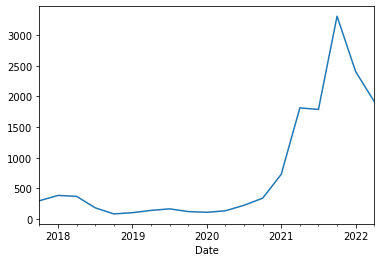

In [52]:
# Plot Min price of ETH at every quarter
eth_history_df.resample(rule='QS').min()['Close'].plot()

In [53]:
# Check mean price of ETH at the end of every year
eth_history_df.resample(rule='A').mean()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-12-31   528.091883   557.766153   503.196944   536.148270   536.148270   
2018-12-31   485.397384   502.704094   463.143234   483.507727   483.507727   
2019-12-31   181.771947   186.367671   176.947580   181.770137   181.770137   
2020-12-31   305.899433   315.010121   297.221470   307.542978   307.542978   
2021-12-31  2771.215477  2872.125942  2658.899019  2778.354149  2778.354149   
2022-12-31  2884.363482  2956.100795  2795.452046  2872.725646  2872.725646   

                  Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                                
2017-12-31  2.037049e+09    2037.048527    8.381711       0.018814  
2018-12-31  2.276869e+09    2276.869352   -1.707849      -0.003163  
2019-12-31  6.967028e+09    6967.027840   -0.010294       0.000771  
2020-12-31  1.424528e+10   14245.276813    1.661728       0.006070  
2021-12-31  2.728082e+10   27280.819105    8.068026       0.005983  
2022-12-31  1.626140e+10   16261.401599  -11.727158      -0.003378

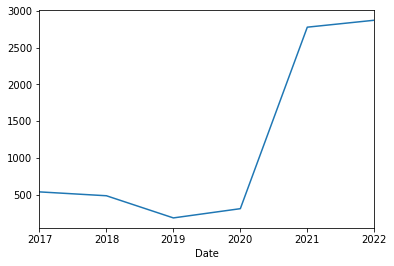

In [54]:
# Plot mean price of ETH at the end of every year
eth_history_df.resample(rule='A').mean()['Close'].plot()

In [55]:
# Check mean price of ETH at every quarter
eth_history_df.resample(rule='QS').mean()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2017-10-01   528.091883   557.766153   503.196944   536.148270   536.148270   
2018-01-01   871.791709   911.641502   818.832786   867.320934   867.320934   
2018-04-01   574.128099   591.948726   553.943782   574.633165   574.633165   
2018-07-01   341.340281   349.463186   329.785836   338.810457   338.810457   
2018-10-01   163.693786   167.622957   158.729876   162.600609   162.600609   
2019-01-01   130.946503   133.907482   128.210433   131.030422   131.030422   
2019-04-01   218.524983   226.252934   212.650139   220.182696   220.182696   
2019-07-01   212.830744   217.485638   205.900593   211.642078   211.642078   
2019-10-01   164.080147   167.117726   160.357724   163.539845   163.539845   
2020-01-01   184.166511   190.282980   177.310988   184.195056   184.195056   
2020-04-01   204.400526   209.576307   200.072916   205.440528   205.440528   
2020-07-01   341.606476   351.650596   331.544364   343.038269   343.038269   
2020-10-01   490.997786   506.028851   477.598274   495.047509   495.047509   
2021-01-01  1528.509033  1594.946289  1458.077849  1541.277395  1541.277395   
2021-04-01  2593.181946  2719.470675  2442.737247  2597.435252  2597.435252   
2021-07-01  2841.780110  2937.660499  2740.083865  2850.271792  2850.271792   
2021-10-01  4092.440313  4207.002234  3966.242721  4095.572674  4095.572674   
2022-01-01  2939.659597  3018.542529  2849.177338  2935.221465  2935.221465   
2022-04-01  2788.658666  2848.028562  2702.465964  2764.559805  2764.559805   

                  Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                                
2017-10-01  2.037049e+09    2037.048527    8.381711       0.018814  
2018-01-01  3.341332e+09    3341.331567   -4.003066      -0.004936  
2018-04-01  2.170332e+09    2170.331749    0.645308       0.002875  
2018-07-01  1.702962e+09    1702.961632   -2.416652      -0.006083  
2018-10-01  1.914835e+09    1914.834926   -1.081302      -0.004483  
2019-01-01  3.615201e+09    3615.201047    0.090509       0.001510  
2019-04-01  8.675775e+09    8675.775150    1.639361       0.009012  
2019-07-01  7.352821e+09    7352.821448   -1.204606      -0.004241  
2019-10-01  8.170021e+09    8170.021255   -0.546319      -0.003090  
2020-01-01  1.543945e+10   15439.454149    0.043766       0.003119  
2020-04-01  1.417553e+10   14175.526180    1.018917       0.006600  
2020-07-01  1.243379e+10   12433.794811    1.452422       0.005978  
2020-10-01  1.494455e+10   14944.554142    4.107234       0.008558  
2021-01-01  3.244661e+10   32446.605572   13.117318       0.012545  
2021-04-01  3.647458e+10   36474.583603    3.914127       0.004509  
2021-07-01  2.118185e+10   21181.848898    7.903602       0.004106  
2021-10-01  1.923247e+10   19232.470275    7.401672       0.002898  
2022-01-01  1.493472e+10   14934.716189   -4.455444      -0.000440  
2022-04-01  1.855759e+10   18557.587885  -24.312817      -0.008462

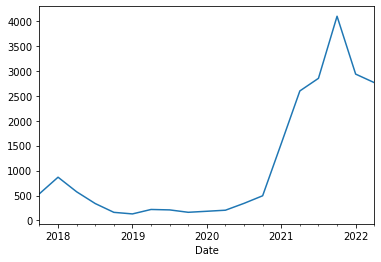

In [56]:
# Plot mean price of ETH at every quarter
eth_history_df.resample(rule='QS').mean()['Close'].plot()

In [57]:
def plot_resample_with_rule(rule):
  fig, axs = plt.subplots(1, 3, figsize=(20, 4))
  plt.tight_layout()
  fig.autofmt_xdate()

  # plt.title(f"Min Max and Mean for Rule: {rule}")
  axs[0].set_title(f"Min Close Price for Rule: {rule_desc[rule]}")
  axs[0].plot(eth_history_df.resample(rule=rule).min()['Close'])

  axs[1].set_title(f"Max Close Price for Rule: {rule_desc[rule]}")
  axs[1].plot(eth_history_df.resample(rule=rule).max()['Close'])

  axs[2].set_title(f"Avg Close Price for Rule: {rule_desc[rule]}")
  axs[2].plot(eth_history_df.resample(rule=rule).mean()['Close'])

  plt.show()

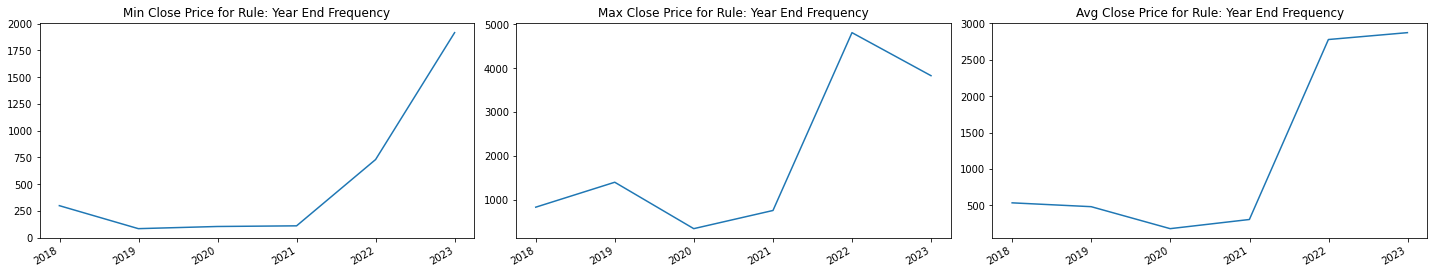

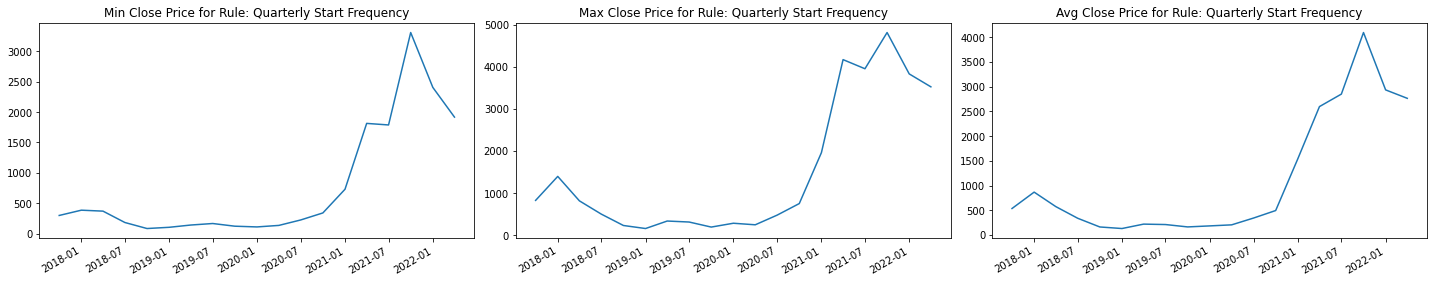

In [58]:
plot_resample_with_rule('A')
plot_resample_with_rule('QS')

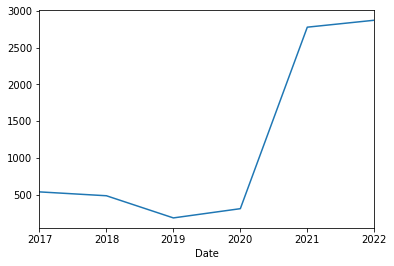

In [59]:
eth_history_df.resample(rule='A').mean()['Close'].plot()

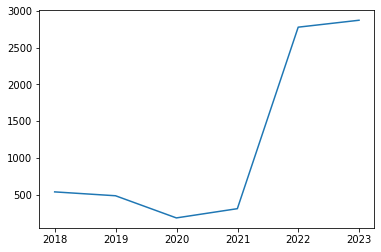

In [60]:
plt.plot(eth_history_df.resample(rule='A').mean()['Close'])

In [61]:
eth_history_df.resample(rule='A').mean()['Close']

Date
2017-12-31     536.148270
2018-12-31     483.507727
2019-12-31     181.770137
2020-12-31     307.542978
2021-12-31    2778.354149
2022-12-31    2872.725646
Freq: A-DEC, Name: Close, dtype: float64

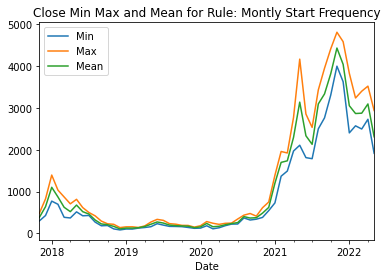

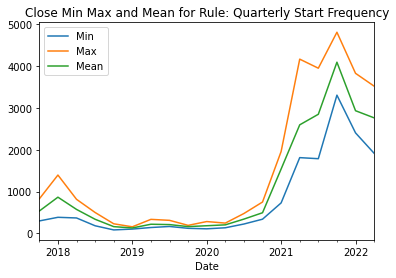

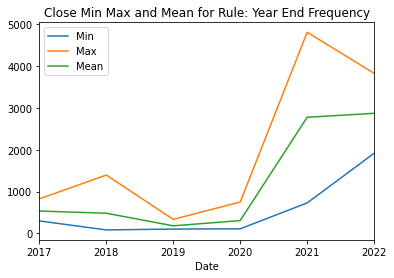

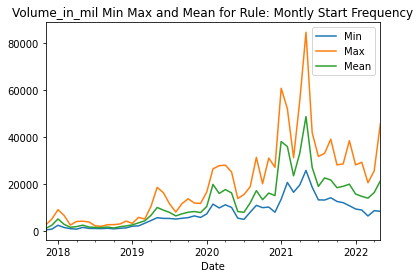

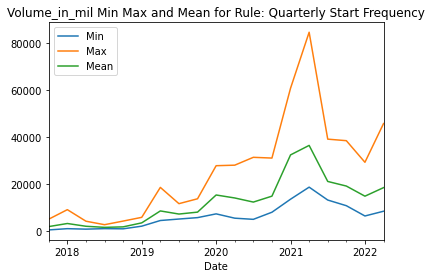

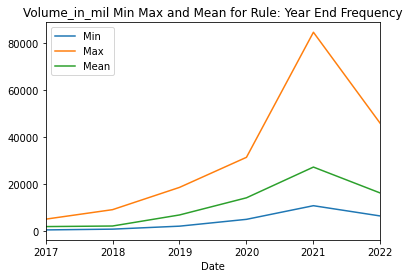

In [62]:
def plot_resample_with_rule_2(rule, column):
  eth_history_df.resample(rule=rule).min()[column].plot(legend=True, label="Min")
  eth_history_df.resample(rule=rule).max()[column].plot(legend=True, label="Max")
  eth_history_df.resample(rule=rule).mean()[column].plot(legend=True, label="Mean")
  plt.title(f"{column} Min Max and Mean for Rule: {rule_desc[rule]}")
  plt.show()

plot_resample_with_rule_2('MS', 'Close')
plot_resample_with_rule_2('QS', 'Close')
plot_resample_with_rule_2('A', 'Close')
plot_resample_with_rule_2('MS', 'Volume_in_mil')
plot_resample_with_rule_2('QS', 'Volume_in_mil')
plot_resample_with_rule_2('A', 'Volume_in_mil')

In [63]:
# eth_history_df.resample(rule="MS").min()['Close']

### Seasonality & Trend Check

In [64]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [65]:
eth_history_df_copy = eth_history_df.copy()
eth_history_df_copy.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   
2017-11-14  316.763000  340.177002  316.763000  337.631012  337.631012   

                Volume  Volume_in_mil  deltaClose  deltaPctClose  
Date                                                              
2017-11-10   885985984     885.985984  -21.631012      -0.067411  
2017-11-11   842300992     842.300992   15.428009       0.051555  
2017-11-12  1613479936    1613.479936   -6.773010      -0.021523  
2017-11-13  1041889984    1041.889984    8.808013       0.028606  
2017-11-14  1069680000    1069.680000   20.915009       0.066037

In [66]:
# eth_history_df_copy.set_index('Date', inplace=True)
# eth_history_df_copy.head()

In [67]:
eth_history_df_copy = eth_history_df_copy[['Close']]
eth_history_df_copy.head()

Close
Date                  
2017-11-10  299.252991
2017-11-11  314.681000
2017-11-12  307.907990
2017-11-13  316.716003
2017-11-14  337.631012

In [68]:
def checkSeasonality(df):
  result = seasonal_decompose(df, model="multiplicative")

  trend = result.trend
  seasonal = result.seasonal
  residual = result.resid

  result.plot()

  return trend, seasonal, residual

(                  Close
 Date                   
 2017-11-10          NaN
 2017-11-11          NaN
 2017-11-12          NaN
 2017-11-13   320.067143
 2017-11-14   324.801575
 ...                 ...
 2022-05-18  2018.524031
 2022-05-19  2000.191110
 2022-05-20          NaN
 2022-05-21          NaN
 2022-05-22          NaN
 
 [1655 rows x 1 columns],                Close
 Date                
 2017-11-10  0.996570
 2017-11-11  1.001954
 2017-11-12  1.002124
 2017-11-13  1.001597
 2017-11-14  1.001585
 ...              ...
 2022-05-18  1.001356
 2022-05-19  0.994813
 2022-05-20  0.996570
 2022-05-21  1.001954
 2022-05-22  1.002124
 
 [1655 rows x 1 columns],                Close
 Date                
 2017-11-10       NaN
 2017-11-11       NaN
 2017-11-12       NaN
 2017-11-13  0.987952
 2017-11-14  1.037854
 ...              ...
 2022-05-18  0.948248
 2022-05-19  1.014333
 2022-05-20       NaN
 2022-05-21       NaN
 2022-05-22       NaN
 
 [1655 rows x 1 columns])

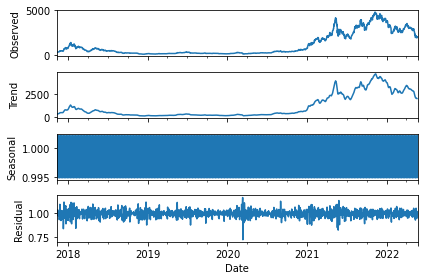

In [69]:
checkSeasonality(eth_history_df_copy)

### Plot Histogram

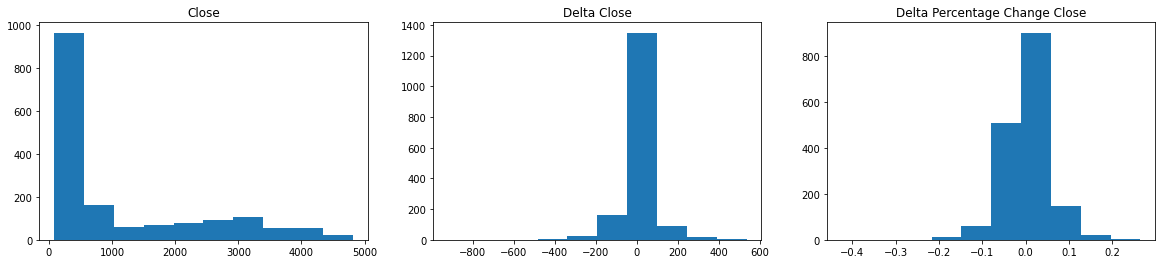

In [70]:
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

axs[0].set_title('Close')
axs[0].hist(eth_history_df['Close'])

axs[1].set_title('Delta Close')
axs[1].hist(eth_history_df['deltaClose'])

axs[2].set_title('Delta Percentage Change Close')
axs[2].hist(eth_history_df['deltaPctClose'])

plt.show()

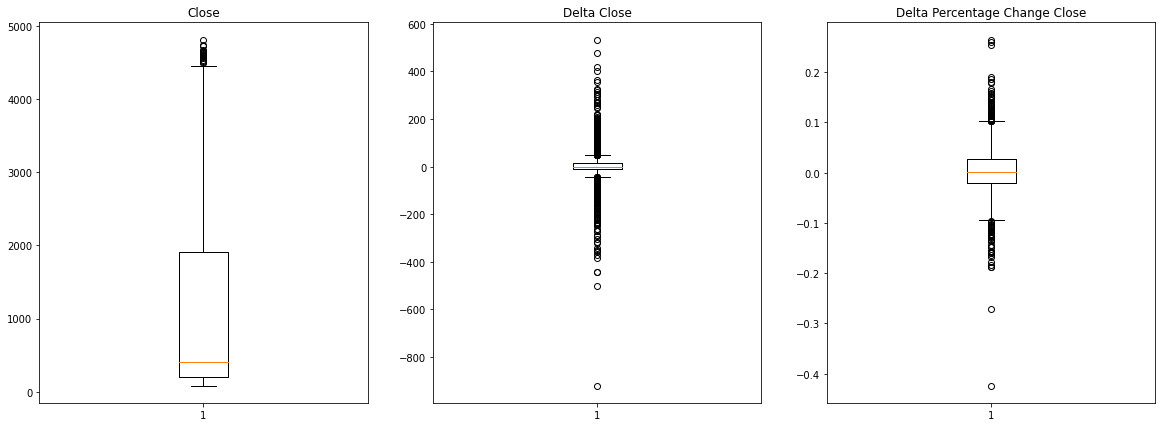

In [71]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

axs[0].set_title('Close')
axs[0].boxplot(eth_history_df['Close'])

axs[1].set_title('Delta Close')
axs[1].boxplot(eth_history_df['deltaClose'])

axs[2].set_title('Delta Percentage Change Close')
axs[2].boxplot(eth_history_df['deltaPctClose'])

plt.show()

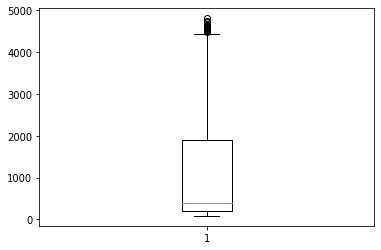

In [72]:
# eth_history_df['Close'].boxplot()
plt.boxplot(eth_history_df['Close'])
plt.show()

In [73]:
print("Close")
print(eth_history_df['Close'].describe())
print("")
print("DeltaClose")
print(eth_history_df['deltaClose'].describe())
print("")
print("DeltaPctClose")
print(eth_history_df['deltaPctClose'].describe())

Close
count    1655.000000
mean     1090.811581
std      1257.231479
min        84.308296
25%       199.030334
50%       403.997040
75%      1905.000427
max      4812.087402
Name: Close, dtype: float64

DeltaClose
count    1655.000000
mean        1.025071
std        80.388975
min      -919.390869
25%        -9.499260
50%         0.371323
75%        13.964226
max       534.011230
Name: deltaClose, dtype: float64

DeltaPctClose
count    1655.000000
mean        0.002436
std         0.051012
min        -0.423472
25%        -0.021530
50%         0.001544
75%         0.028021
max         0.264581
Name: deltaPctClose, dtype: float64


In [74]:
# eth_history_df.loc(2019)['Close']

print(eth_history_df['2019']['Close'].describe())

print(eth_history_df['2021']['Close'].describe())

count    365.000000
mean     181.770137
std       50.382666
min      104.535301
25%      142.398178
50%      173.889969
75%      210.522598
max      336.753174
Name: Close, dtype: float64
count     365.000000
mean     2778.354149
std      1023.543690
min       730.367554
25%      1895.552124
50%      2633.518311
75%      3638.122070
max      4812.087402
Name: Close, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  """


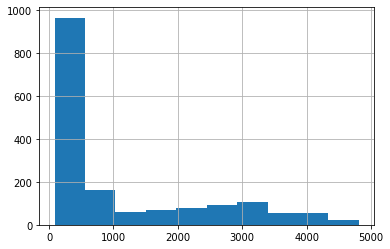

In [75]:
eth_history_df['Close'].hist()

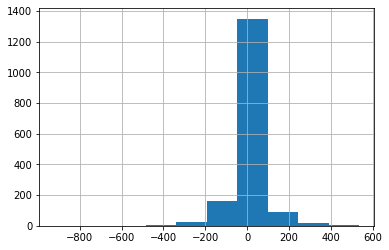

In [76]:
eth_history_df['deltaClose'].hist()

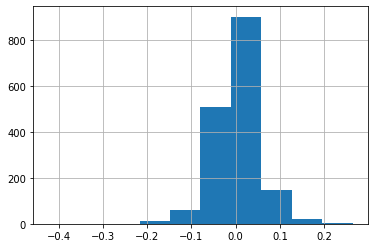

In [77]:
eth_history_df['deltaPctClose'].hist()

### Check Mean and Variance
We will check mean and variance after splitting the data in half

In [78]:
def checkMeanAndVariance(df, col_name):
  # X = series.values
  X = df[[col_name]].copy()
  split = int(len(X)/2)
  X1, X2 = X[0:split], X[split:]

  # mean1, mean2 = round(float(X1.mean()), 2), round(float(X2.mean()), 2)
  # var1, var2 = round(float(X1.var()), 2), round(float(X2.var()), 2)
  mean1, mean2 = float(X1.mean()), float(X2.mean())
  var1, var2 = float(X1.var()), float(X2.var())

  print(f"Analysis for {col_name}")
  print(f"mean1={float(mean1)}, mean2={float(mean2)}")
  print(f"variance1={float(var1)}, variance2={float(var2)}")

  # X1.hist()
  # X2.hist()
  # plt.show()

  fig, axs = plt.subplots(1, 2, figsize=(20, 4))

  # axs[0].set_title(col_name)
  axs[0].hist(X1[col_name])
  axs[1].hist(X2[col_name])

  plt.show()


Analysis for Close
mean1=336.99130479685624, mean2=1843.7214459396118
variance1=66678.96376660561, variance2=1958859.9142969397


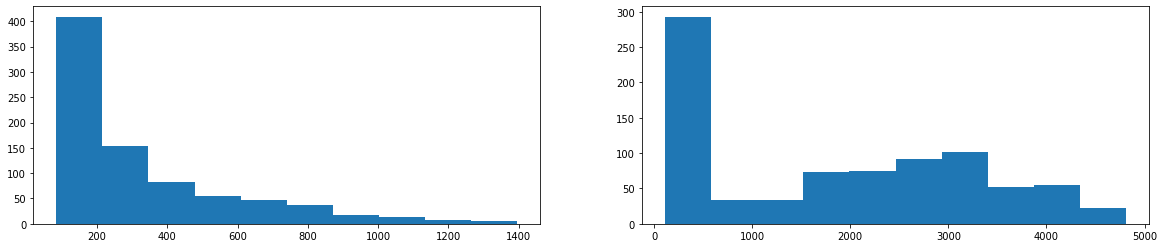

---
Analysis for deltaClose
mean1=-0.044336764207980967, mean2=2.0931870096618352
variance1=711.6047444288109, variance2=12211.744361361849


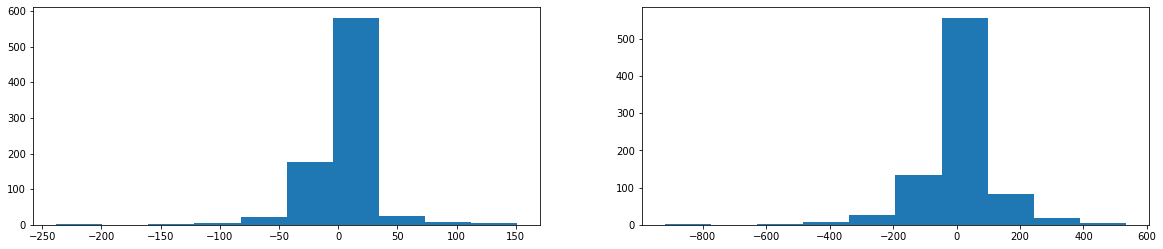

---
Analysis for deltaPctClose
mean1=0.0011225718930756613, mean2=0.003747398607861875
variance1=0.002536055377473825, variance2=0.002668042041104589


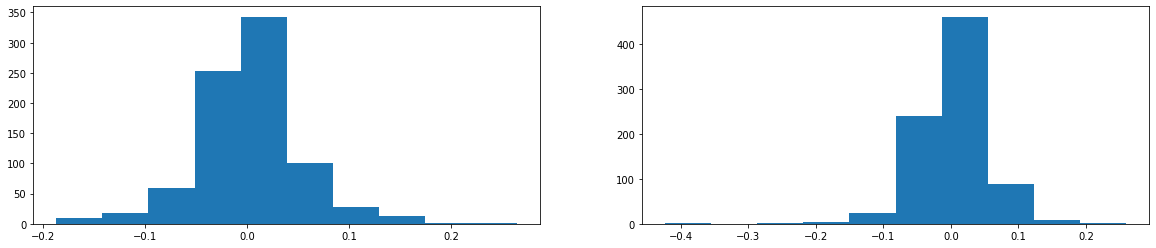

In [79]:
checkMeanAndVariance(eth_history_df, 'Close')
print('---')
checkMeanAndVariance(eth_history_df, 'deltaClose')
print('---')
checkMeanAndVariance(eth_history_df, 'deltaPctClose')

In [80]:
df_deltaPctClose.min(), df_deltaPctClose.max()

(-0.42347221483119923, 0.2645807082093463)

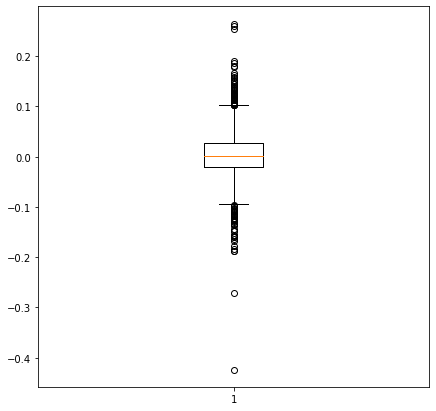

In [81]:
plt.figure(figsize =(7, 7))
plt.boxplot(df_deltaPctClose)
plt.show()

### Augmented Dickey-Fuller test
Read more : https://machinelearningmastery.com/time-series-data-stationary-python/

In [82]:
from statsmodels.tsa.stattools import adfuller

In [83]:
def checkAdfuller(df, col_name):
  s = df[col_name].values
  result = adfuller(s)
  adf_val, p_val = result[0], result[1]
  print(col_name)
  # print('ADF Statistic: %f' % result[0])
  # print('p-value: %f' % result[1])
  print('ADF Statistic: %f' % adf_val)
  print('p-value: %f' % p_val)
  print(f"{col_name} series is", "Stationary" if p_val < 0.05 else "NOT Stationary")

In [84]:
checkAdfuller(eth_history_df, 'Close')
print('---')
checkAdfuller(eth_history_df, 'deltaClose')
print('---')
checkAdfuller(eth_history_df, 'deltaPctClose')

Close
ADF Statistic: -1.115920
p-value: 0.708682
Close series is NOT Stationary
---
deltaClose
ADF Statistic: -10.255242
p-value: 0.000000
deltaClose series is Stationary
---
deltaPctClose
ADF Statistic: -14.812627
p-value: 0.000000
deltaPctClose series is Stationary


In [85]:
# create dataset 
# In this step we use a window length and format the train and test data so that they are in time series format.
# Ex, X = [1, 2, 3], y = [4]
# Ex, X = [2, 3, 4], y = [5]
# Ex, X = [4, 5, 6], y = [6]
# And so on....

def create_Xy_dataset(df, interval, print_samples = False):
  dataX, dataY = [], []

  # print(f"interval = {interval}")
  rangeSize = len(df) - interval

  for i in range(rangeSize):
    x = df[i:i+interval, 0]
    y = df[i+interval, 0]

    if (print_samples):
      # Print some samples
      if (i<5 or i>len(df) - interval - 1 - 5):
        print(f"x = {x}")
        print(f"y = {y}")
        print("")

    dataX.append(x)
    dataY.append(y)
  
  X = np.array(dataX)
  X = X.reshape(X.shape[0], X.shape[1], 1) # reshape for LSTM. Add 3rd dimension
  y = np.array(dataY)

  return X, y

In [86]:
# X, y = create_Xy_dataset(df_close, 3)
print(len(df_close))
# print(X)
# print(y)

1655


## Create Models

In [87]:
# Create LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D

In [88]:
def getNextNPredictions(interval, X_train, model, num_next_n_predictions):
  # Initialize Prediction Set
  predictions = []
  predictions_flat = []


  # last_batch_start_idx = interval * -1
  # last_train_batch = X_train[last_batch_start_idx:]
  # last_train_batch = last_train_batch.reshape((1, interval, 1))
  # eval_batch = last_train_batch

  eval_batch = X_train[-1:]

  for i in range(num_next_n_predictions):
    # Predict the evaluation batch
    pred = model.predict(eval_batch)[0]

    # Add prediction to predictions array
    predictions.append(pred)
    predictions_flat.append(pred[0])

    # shift eval batch by one by removing the 1st element and adding pred as last element 
    eval_batch = np.append(eval_batch[:, 1:, :], [[pred]], axis=1)
  
  return predictions, predictions_flat


In [89]:
# split into train and test data. By default use 70% data for training and rest for testing.
def df_train_test_split(df, train_size_pct = 0.70):
  training_size = int(len(df) * train_size_pct) # use 70% data to train
  test_size = len(df) - training_size # use the remaining 30% for test

  # print("-------------------------------")
  # print(f"Total Size = {len(df)}")
  # print(f"Train Size = {training_size}")
  # print(f"Test Size = {test_size}")

  train_data = df[0:training_size,:]
  test_data = df[training_size:len(df), :1]

  # print(f"Train data Size = {len(train_data)}")
  # print(f"Test data Size = {len(test_data)}")

  return train_data, test_data

def getScaledDf(df, scaler):
  print('Plot Before Scaling')
  print(plt.plot(df))
  plt.show()
  scaled_df = scaler.fit_transform(np.array(df).reshape(-1, 1))
  print('Plot After Scaling')
  print(plt.plot(scaled_df))
  plt.show()
  return scaled_df

def getTrainTestPrediction(model, scaler, X_train, y_train, X_test, y_test):
  train_predict = model.predict(X_train)
  test_predict = model.predict(X_test)

  # Inverse scale
  if (scaler):
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

  return train_predict, test_predict

def getPredSeries(df, interval, train_predict, test_predict):
  print(f"train_predict length = {len(train_predict)} ")
  print(f"test_predict length = {len(test_predict)} ")

  # shift train predictions for plotting
  trainPredictPlot = np.empty_like(df)
  trainPredictPlot[:, :] = np.nan
  trainPredictPlot[interval:len(train_predict)+interval, :] = train_predict

  print(f"test_predict range start = {len(train_predict)+(interval*2)+1}")
  print(f"test_predict range end = {len(df)-1}")
  # shift test predictions for plotting
  testPredictPlot = np.empty_like(df)
  testPredictPlot[:, :] = np.nan
  # testPredictPlot[len(train_predict)+(interval*2)+1:len(df)-1, :] = test_predict
  testPredictPlot[len(train_predict)+(interval*2):, :] = test_predict

  return trainPredictPlot, testPredictPlot

def plotSequence(df, interval, scaler, train_predict, test_predict):
  # get train and test predictions for plotting
  # shift train predictions for plotting
  trainPredictPlot, testPredictPlot = getPredSeries(df, interval, train_predict, test_predict)

  # plot baseline and predictions
  if (scaler):
    plt.plot(scaler.inverse_transform(df))
  else:
    plt.plot(df)

  plt.plot(trainPredictPlot)
  plt.plot(testPredictPlot)
  plt.show()

def plotResiduals(pred_train_df, pred_test_df):
  fig, axs = plt.subplots(1, 2, figsize=(16, 4))
  train_residual_df = pred_train_df.copy()
  train_residual_df['residual'] = train_residual_df['y_train_actual'] - train_residual_df['train_predict']
  test_residual_df = pred_test_df.copy()
  test_residual_df['residual'] = test_residual_df['y_test_actual'] - test_residual_df['test_predict']

  sns.residplot(x="y_train_actual", y="residual", data=train_residual_df, ax=axs[0])
  axs[0].set(xlabel="Train Actual", ylabel="Residual")
  axs[0].set_title("Train Residuals")

  sns.residplot(x="y_test_actual", y="residual", data=test_residual_df, ax=axs[1])
  axs[1].set(xlabel="Test Actual", ylabel="Residual")
  axs[1].set_title("Test Residuals")

  plt.suptitle("Residual Plot")
  plt.show()

def evaluateIntervalPerformance(model, df, interval, scaler, X_train, y_train, X_test, y_test):
  train_predict, test_predict = getTrainTestPrediction(model, scaler, X_train, y_train, X_test, y_test)

  if (scaler):
    # print("Test Actual After inverse transform")
    y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
  else:
    y_train_actual = y_train.reshape(-1, 1)
    y_test_actual = y_test.reshape(-1, 1)

  ## TODO - REMOVE
  # print("Test Actual")
  # print(y_test[0:5])
  # if (scaler):
  #   print("Test Actual After inverse transform")
  #   y_test_actual_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))
  #   print(y_test_actual_unscaled[0:5])
  # print("Test Predict")
  # print(test_predict[0:5])
  # print("================")
  pred_train_df = pd.DataFrame({
      "y_train": y_train,
      "y_train_actual": y_train_actual[:, 0],
      "train_predict": train_predict[:, 0]
  })
  pred_test_df = pd.DataFrame({
      "y_test": y_test,
      "y_test_actual": y_test_actual[:, 0],
      "test_predict": test_predict[:, 0],
  })
  print("Train")
  display(pred_train_df.head(10))
  print("Test")
  display(pred_test_df.head(10))

  # Calculate RMSE
  rmse_train = math.sqrt(mean_squared_error(y_train_actual, train_predict))
  rmse_test = math.sqrt(mean_squared_error(y_test_actual, test_predict))

  mape_train = mean_absolute_percentage_error(y_train_actual, train_predict)
  mape_test = mean_absolute_percentage_error(y_test_actual, test_predict)

  print(f"RMSE Train = {rmse_train}")
  print(f"RMSE Test = {rmse_test}")
  print(f"MAPE Train = {mape_train}")
  print(f"MAPE Test = {mape_test}")

  plotSequence(df, interval, scaler, train_predict, test_predict)
  plotResiduals(pred_train_df, pred_test_df)

  return pred_train_df, pred_test_df, rmse_train, rmse_test, mape_train, mape_test

def fit_model_on_interval(interval, X_train, y_train, epochs=50, batch_size=32, loss="mean_squared_error", verbose=0):
  model=Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(interval, 1)))
  model.add(LSTM(50, return_sequences=True))
  model.add(LSTM(50))
  model.add(Dense(1))
  # model.add(Dense(1, activation="relu"))
  # model.compile(loss="mean_squared_error", optimizer="adam")
  # model.compile(loss="mean_absolute_percentage_error", optimizer="adam")
  model.compile(loss=loss, optimizer="adam")

  history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    verbose=verbose,
    validation_split=0.33
  )

  # plot train and validation loss
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model train vs validation loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')
  plt.show()

  return model


In [90]:
class IntervalBasedModel:
  def __init__(self, df_close, df_deltaClose, df_deltaPctClose):
    self.df_close = df_close
    self.df_deltaClose = df_deltaClose
    self.df_deltaPctClose = df_deltaPctClose
    self.df_metrics = pd.DataFrame({
        "model": [],
        "interval": [],
        "target": [],
        "rmse_train": [],
        "rmse_test": [],
        "mape_train": [],
        "mape_test": [],
    })

    ##################
    # Scale
    ##################
    self.scale()
  
  def scale(self):
    # Initialize Scaler 
    print("Initialize Scaler ")
    self.scalerClose = MinMaxScaler(feature_range=(0,1))
    # scalerDeltaClose = MinMaxScaler(feature_range=(-1,1))
    self.scalerDeltaClose = MinMaxScaler(feature_range=(-0.5,0.5))

    # Scale 
    print("Scaling Close")
    self.close_scaled = getScaledDf(self.df_close, self.scalerClose)
    print("Scaling Delta Close")
    self.deltaClose_scaled = getScaledDf(self.df_deltaClose, self.scalerDeltaClose)
    print("Scaling Delta Pct Close")
    self.deltaPctClose_scaled = np.array(self.df_deltaPctClose).reshape(-1, 1)

  def train_test_split(self):
    # 1. Split data
    # Close
    print("Split Train and Test Data")
    close_train_data, close_test_data = df_train_test_split(self.close_scaled)
    print(f"Close Total data Size = {len(self.close_scaled)}")
    print(f"Close Train data Size = {len(close_train_data)}")
    print(f"Close Test data Size = {len(close_test_data)}")
    print("---------------------")

    # Delta Close
    deltaClose_train_data, deltaClose_test_data = df_train_test_split(self.deltaClose_scaled)
    print(f"Delta Close Total data Size = {len(self.deltaClose_scaled)}")
    print(f"Delta Close Train data Size = {len(deltaClose_train_data)}")
    print(f"Delta Close Test data Size = {len(deltaClose_test_data)}")
    print("---------------------")

    # Delta Pct Close
    deltaPctClose_train_data, deltaPctClose_test_data = df_train_test_split(self.deltaPctClose_scaled)
    print(f"Delta Close Total data Size = {len(self.deltaPctClose_scaled)}")
    print(f"Delta Close Train data Size = {len(deltaPctClose_train_data)}")
    print(f"Delta Close Test data Size = {len(deltaPctClose_test_data)}")
    print("---------------------")
    print("")

    # 2. Format data for time series modeling
    print("Create (X, y) from Train and Test Data")
    # Close
    self.close_X_train, self.close_y_train = create_Xy_dataset(close_train_data, self.interval)
    self.close_X_test, self.close_y_test = create_Xy_dataset(close_test_data, self.interval)
    print("Close train, test length ", len(self.close_X_train), len(self.close_X_test))
    print("Close train shape, test shape ", self.close_X_train.shape, self.close_y_train.shape)
    print("Close test shape, test shape ", self.close_X_test.shape, self.close_y_test.shape)
    print("")

    # Delta Close
    self.deltaClose_X_train, self.deltaClose_y_train = create_Xy_dataset(deltaClose_train_data, self.interval)
    self.deltaClose_X_test, self.deltaClose_y_test = create_Xy_dataset(deltaClose_test_data, self.interval)
    print("Delta Close train, test length ", len(self.deltaClose_X_train), len(self.deltaClose_X_test))
    print("Close train shape, test shape ", self.deltaClose_X_train.shape, self.deltaClose_y_train.shape)
    print("Close test shape, test shape ", self.deltaClose_X_test.shape, self.deltaClose_y_test.shape)
    print("")

    # Delta Percentage Close
    self.deltaPctClose_X_train, self.deltaPctClose_y_train = create_Xy_dataset(deltaPctClose_train_data, self.interval)
    self.deltaPctClose_X_test, self.deltaPctClose_y_test = create_Xy_dataset(deltaPctClose_test_data, self.interval)
    print("Delta Percentage Close train, test length ", len(self.deltaPctClose_X_train), len(self.deltaPctClose_X_test))
    print("Close train shape, test shape ", self.deltaPctClose_X_train.shape, self.deltaPctClose_y_train.shape)
    print("Close test shape, test shape ", self.deltaPctClose_X_test.shape, self.deltaPctClose_y_test.shape)
    print("")
  
  def fit_lstm(self, interval, X_train, y_train, epochs=20, batch_size=16, loss="mean_squared_error", verbose=0):
    model=Sequential()
    model.add(LSTM(100, activation="relu", input_shape=(interval, 1)))
    model.add(Dense(1))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model

  def fit_stacked_lstm(self, interval, X_train, y_train, epochs=20, batch_size=16, loss="mean_squared_error", verbose=0):
    model=Sequential()
    model.add(LSTM(100, activation="relu", return_sequences=True, input_shape=(interval, 1)))
    # model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(100, activation="relu"))
    model.add(Dense(1))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model


  def fit_cnn_lstm(self, interval, X_train, y_train, epochs=50, batch_size=16, loss="mean_squared_error", verbose=0):
    model = Sequential()
    model.add(Conv1D(filters=8, kernel_size=3, activation='relu', input_shape=(interval, 1)))
    model.add(LSTM(100, activation="relu", input_shape=(interval, 1)))
    model.add(Dense(1))
    # model.add(Dense(1, activation="relu"))
    model.compile(loss=loss, optimizer="adam")

    print("Model Summary")
    print(model.summary())

    history = model.fit(
      X_train,
      y_train,
      # validation_data=(X_test, y_test),
      epochs=epochs,
      batch_size=batch_size,
      verbose=verbose,
      validation_split=0.33
    )

    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.show()

    return model

  def get_lstm_models(self):
    ##### LSTM MODELS #####
    epochs = 20

    # Fit LSTM model on close 
    print("(LSTM) Fit Model for Close")
    lstm_close_model = self.fit_lstm(self.interval, self.close_X_train, self.close_y_train, epochs)
    
    # Fit LSTM model on delta close 
    print("(LSTM) Fit Model for Delta Close")
    lstm_deltaClose_model = self.fit_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs)
    
    # Fit LSTM model on delta pct close 
    print("(LSTM) Fit Model for Delta Pct Change Close")
    lstm_deltaPctClose_model = self.fit_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs)

    return lstm_close_model, lstm_deltaClose_model, lstm_deltaPctClose_model

  def get_stacked_lstm_models(self):
    ##### LSTM MODELS #####
    epochs = 20

    # Fit LSTM model on close 
    print("(Stacked LSTM) Fit Model for Close")
    lstm_close_model = self.fit_stacked_lstm(self.interval, self.close_X_train, self.close_y_train, epochs)
    
    # Fit LSTM model on delta close 
    print("(Stacked LSTM) Fit Model for Delta Close")
    lstm_deltaClose_model = self.fit_stacked_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs)
    
    # Fit LSTM model on delta pct close 
    print("(Stacked LSTM) Fit Model for Delta Pct Change Close")
    lstm_deltaPctClose_model = self.fit_stacked_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs)

    return lstm_close_model, lstm_deltaClose_model, lstm_deltaPctClose_model

  def get_cnn_lstm_models(self):
    ##### LSTM MODELS #####
    epochs = 20

    ##### CNN-LSTM MODELS #####
    # Fit CNN-LSTM model on close 
    print("(CNN-LSTM) Fit Model for Close")
    cnn_lstm_close_model = self.fit_cnn_lstm(self.interval, self.close_X_train, self.close_y_train, epochs)
    
    # Fit model on delta close 
    print("(CNN-LSTM) Fit Model for Delta Close")
    cnn_lstm_deltaClose_model = self.fit_cnn_lstm(self.interval, self.deltaClose_X_train, self.deltaClose_y_train, epochs)
    
    # Fit model on delta pct close 
    print("(CNN-LSTM) Fit Model for Delta Pct Change Close")
    cnn_lstm_deltaPctClose_model = self.fit_cnn_lstm(self.interval, self.deltaPctClose_X_train, self.deltaPctClose_y_train, epochs)
    
    return cnn_lstm_close_model, cnn_lstm_deltaClose_model, cnn_lstm_deltaPctClose_model

  def execute(self, interval):
    print("################################################################")
    print("################## Executing for interval ", interval, " ##################")
    print("################################################################")

    ##################
    # 1. Set Interval
    ##################
    self.interval = interval

    ##################
    # 2. Split data into train and test
    ##################
    self.train_test_split()

    ##################
    # 3. Fit Model
    ##################
    lstm_close_model, lstm_deltaClose_model, lstm_deltaPctClose_model = self.get_lstm_models()
    stacked_lstm_close_model, stacked_lstm_deltaClose_model, stacked_lstm_deltaPctClose_model = self.get_stacked_lstm_models()
    cnn_lstm_close_model, cnn_lstm_deltaClose_model, cnn_lstm_deltaPctClose_model = self.get_cnn_lstm_models()

    ##################
    # 4. Evaluate Performance
    ##################
    
    ##### Evaluate LSTM Model Performance #####
    # Close
    print("(LSTM) Evaluate Close")
    lstm_close_train_predict, lstm_close_test_predict, lstm_close_rmse_train, lstm_close_rmse_test, lstm_close_mape_train, lstm_close_mape_test = evaluateIntervalPerformance(
      lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(LSTM) Evaluate Delta Close")
    lstm_deltaClose_train_predict, lstm_deltaClose_test_predict, lstm_deltaClose_rmse_train, lstm_deltaClose_rmse_test, lstm_deltaClose_mape_train, lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(LSTM) Evaluate Percentage Change Close")
    lstm_deltaPctClose_train_predict, lstm_deltaPctClose_test_predict, lstm_deltaPctClose_rmse_train, lstm_deltaPctClose_rmse_test, lstm_deltaPctClose_mape_train, lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##### Evaluate Stacked LSTM Model Performance #####
    # Close
    print("(Stacked LSTM) Evaluate Close")
    stacked_lstm_close_train_predict, stacked_lstm_close_test_predict, stacked_lstm_close_rmse_train, stacked_lstm_close_rmse_test, stacked_lstm_close_mape_train, stacked_lstm_close_mape_test = evaluateIntervalPerformance(
      stacked_lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(Stacked LSTM) Evaluate Delta Close")
    stacked_lstm_deltaClose_train_predict, stacked_lstm_deltaClose_test_predict, stacked_lstm_deltaClose_rmse_train, stacked_lstm_deltaClose_rmse_test, stacked_lstm_deltaClose_mape_train, stacked_lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      stacked_lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(Stacked LSTM) Evaluate Percentage Change Close")
    stacked_lstm_deltaPctClose_train_predict, stacked_lstm_deltaPctClose_test_predict, stacked_lstm_deltaPctClose_rmse_train, stacked_lstm_deltaPctClose_rmse_test, stacked_lstm_deltaPctClose_mape_train, stacked_lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      stacked_lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##### Evaluate CNN-LSTM Model Performance #####
    # Close
    print("(CNN-LSTM) Evaluate Close")
    cnn_lstm_close_train_predict, cnn_lstm_close_test_predict, cnn_lstm_close_rmse_train, cnn_lstm_close_rmse_test, cnn_lstm_close_mape_train, cnn_lstm_close_mape_test = evaluateIntervalPerformance(
      cnn_lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")

    # Delta Close
    print("(CNN-LSTM) Evaluate Delta Close")
    cnn_lstm_deltaClose_train_predict, cnn_lstm_deltaClose_test_predict, cnn_lstm_deltaClose_rmse_train, cnn_lstm_deltaClose_rmse_test, cnn_lstm_deltaClose_mape_train, cnn_lstm_deltaClose_mape_test = evaluateIntervalPerformance(
      cnn_lstm_deltaClose_model,
      self.deltaClose_scaled,
      self.interval,
      self.scalerDeltaClose,
      self.deltaClose_X_train,
      self.deltaClose_y_train,
      self.deltaClose_X_test,
      self.deltaClose_y_test
    )
    print("----------------------------")

    # Delta Pct Change
    print("(CNN-LSTM) Evaluate Percentage Change Close")
    cnn_lstm_deltaPctClose_train_predict, cnn_lstm_deltaPctClose_test_predict, cnn_lstm_deltaPctClose_rmse_train, cnn_lstm_deltaPctClose_rmse_test, cnn_lstm_deltaPctClose_mape_train, cnn_lstm_deltaPctClose_mape_test = evaluateIntervalPerformance(
      cnn_lstm_deltaPctClose_model,
      self.deltaPctClose_scaled,
      self.interval,
      "",
      self.deltaPctClose_X_train,
      self.deltaPctClose_y_train,
      self.deltaPctClose_X_test,
      self.deltaPctClose_y_test
    )
    print("----------------------------")

    ##################
    # 5. Save RMSE and MAPE for this Interval in metrics df
    ##################

    ## LSTM
    lstm_close_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": lstm_close_rmse_train,
        "rmse_test": lstm_close_rmse_test,
        "mape_train": lstm_close_mape_train,
        "mape_test": lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_close_metrics_data, ignore_index=True)

    lstm_deltaClose_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": lstm_deltaClose_rmse_train,
        "rmse_test": lstm_deltaClose_rmse_test,
        "mape_train": lstm_deltaClose_mape_train,
        "mape_test": lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_deltaClose_metrics_data, ignore_index=True)

    lstm_deltaPctClose_metrics_data = {
        "model": "LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": lstm_deltaPctClose_rmse_train,
        "rmse_test": lstm_deltaPctClose_rmse_test,
        "mape_train": lstm_deltaPctClose_mape_train,
        "mape_test": lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(lstm_deltaPctClose_metrics_data, ignore_index=True)

    ## Stacked LSTM
    stacked_lstm_close_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": stacked_lstm_close_rmse_train,
        "rmse_test": stacked_lstm_close_rmse_test,
        "mape_train": stacked_lstm_close_mape_train,
        "mape_test": stacked_lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_close_metrics_data, ignore_index=True)

    stacked_lstm_deltaClose_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": stacked_lstm_deltaClose_rmse_train,
        "rmse_test": stacked_lstm_deltaClose_rmse_test,
        "mape_train": stacked_lstm_deltaClose_mape_train,
        "mape_test": stacked_lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_deltaClose_metrics_data, ignore_index=True)

    stacked_lstm_deltaPctClose_metrics_data = {
        "model": "Stacked LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": stacked_lstm_deltaPctClose_rmse_train,
        "rmse_test": stacked_lstm_deltaPctClose_rmse_test,
        "mape_train": stacked_lstm_deltaPctClose_mape_train,
        "mape_test": stacked_lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(stacked_lstm_deltaPctClose_metrics_data, ignore_index=True)

    ## CNN-LSTM
    cnn_lstm_close_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Close",
        "rmse_train": cnn_lstm_close_rmse_train,
        "rmse_test": cnn_lstm_close_rmse_test,
        "mape_train": cnn_lstm_close_mape_train,
        "mape_test": cnn_lstm_close_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_close_metrics_data, ignore_index=True)

    cnn_lstm_deltaClose_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Change in Close Price",
        "rmse_train": cnn_lstm_deltaClose_rmse_train,
        "rmse_test": cnn_lstm_deltaClose_rmse_test,
        "mape_train": cnn_lstm_deltaClose_mape_train,
        "mape_test": cnn_lstm_deltaClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_deltaClose_metrics_data, ignore_index=True)

    cnn_lstm_deltaPctClose_metrics_data = {
        "model": "CNN-LSTM",
        "interval": self.interval,
        "target": "Percentage Change in Close Price",
        "rmse_train": cnn_lstm_deltaPctClose_rmse_train,
        "rmse_test": cnn_lstm_deltaPctClose_rmse_test,
        "mape_train": cnn_lstm_deltaPctClose_mape_train,
        "mape_test": cnn_lstm_deltaPctClose_mape_test,
    }
    self.df_metrics = self.df_metrics.append(cnn_lstm_deltaPctClose_metrics_data, ignore_index=True)

  def execute_all_intervals(self):
    ##################
    # Test for following intervals
    ##################
    self.execute(3)
    display(self.df_metrics)

    self.execute(5)
    display(self.df_metrics)

    self.execute(10)
    display(self.df_metrics)

    self.execute(20)
    display(self.df_metrics)

  def get_metrics_df(self):
    return self.df_metrics
  
  def play(self):
    self.interval = 3
    self.train_test_split()

    # print("self.close_y_test ", self.close_y_test)

    # cnn_lstm_close_model = fit_cnn_lstm(self.interval, self.close_X_train, self.close_y_train, epochs=20)
    cnn_lstm_close_model = fit_cnn_lstm_2(self.interval, self.close_X_train, self.close_y_train, epochs=20)

    # Close
    print("(CNN-LSTM) Evaluate Close")
    cnn_lstm_close_train_predict, cnn_lstm_close_test_predict, cnn_lstm_close_rmse_train, cnn_lstm_close_rmse_test, cnn_lstm_close_mape_train, cnn_lstm_close_mape_test = evaluateIntervalPerformance(
      cnn_lstm_close_model,
      self.close_scaled,
      self.interval,
      self.scalerClose,
      self.close_X_train,
      self.close_y_train,
      self.close_X_test,
      self.close_y_test
    )
    print("----------------------------")


Initialize Scaler 
Scaling Close
Plot Before Scaling


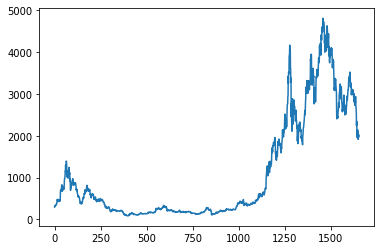

Plot After Scaling


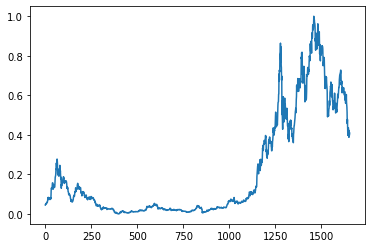

Scaling Delta Close
Plot Before Scaling


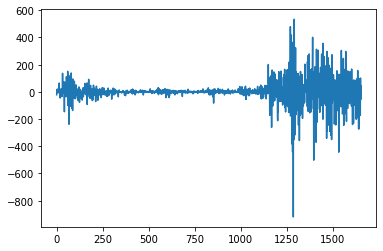

Plot After Scaling


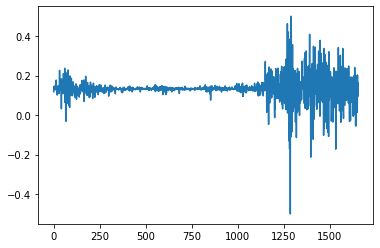

Scaling Delta Pct Close
################################################################
################## Executing for interval  3  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1155 494
Close train shape, test shape  (1155, 3, 1) (1155,)
Close test shape, test shape  (494, 3, 1) (494,)

Delta Close train, test length  1155 494
Close train shape, test shape  (1155, 3, 1) (1155,)
Close test shape, test shape  (494, 3, 1) (494,)

Delta Percentage Close train, test length  1155 494
Close train shape, test sh

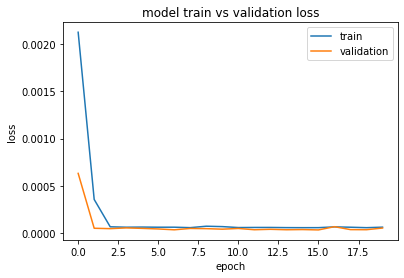

(LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 100)               40800     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


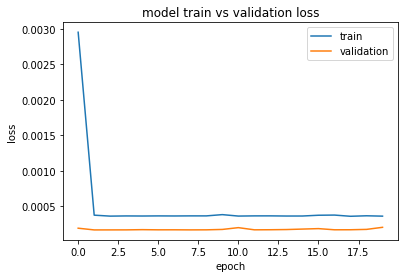

(LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               40800     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


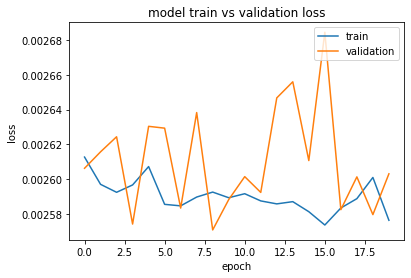

(Stacked LSTM) Fit Model for Close
Model Summary
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 3, 100)            40800     
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


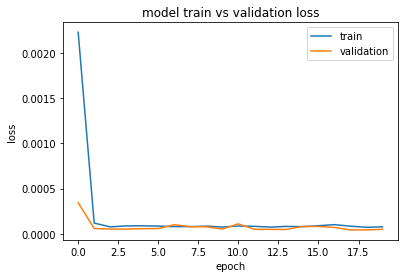

(Stacked LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 3, 100)            40800     
                                                                 
 lstm_6 (LSTM)               (None, 100)               80400     
                                                                 
 dense_4 (Dense)             (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


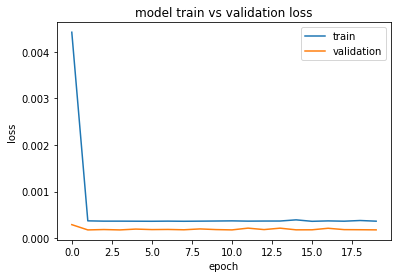

(Stacked LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 3, 100)            40800     
                                                                 
 lstm_8 (LSTM)               (None, 100)               80400     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


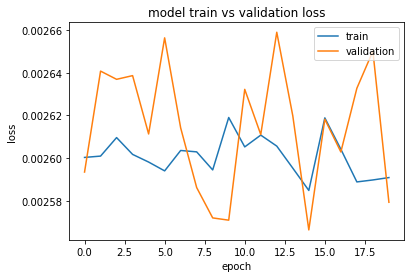

(CNN-LSTM) Fit Model for Close
Model Summary
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 1, 8)              32        
                                                                 
 lstm_9 (LSTM)               (None, 100)               43600     
                                                                 
 dense_6 (Dense)             (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


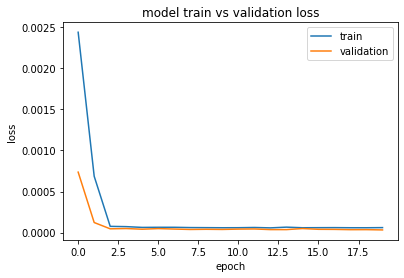

(CNN-LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 1, 8)              32        
                                                                 
 lstm_10 (LSTM)              (None, 100)               43600     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


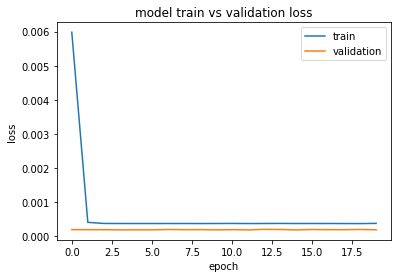

(CNN-LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 1, 8)              32        
                                                                 
 lstm_11 (LSTM)              (None, 100)               43600     
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


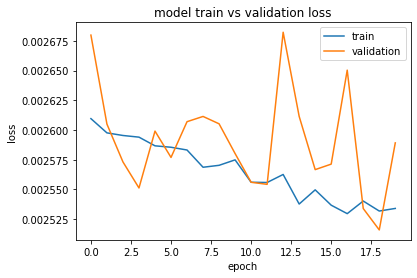

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     295.181458
1  0.053582      337.631012     301.052551
2  0.052678      333.356995     307.473511
3  0.052163      330.924011     316.279785
4  0.052474      332.394012     321.738953
5  0.055693      347.612000     319.818817
6  0.057126      354.385986     323.777863
7  0.059737      366.730011     331.234375
8  0.058398      360.401001     342.491791
9  0.062681      380.652008     347.174438

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1049.193359
1  0.230029    1171.834595   1094.801025
2  0.243080    1233.537598   1118.706177
3  0.242368    1230.172241   1143.855713
4  0.248102    1257.279541   1146.338623
5  0.273487    1377.295898   1165.415283
6  0.274540    1382.274048   1202.749023
7  0.219397    1121.570923   1232.568115
8  0.243709    1236.512207   1182.250977
9  0.242541    1230.990601   1158.580688

RMSE Train = 36.85187386424516
RMSE Test = 734.6488828097774
MAPE Train = 0.06092508895983828
MAPE Test = 0.21824164913997615
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


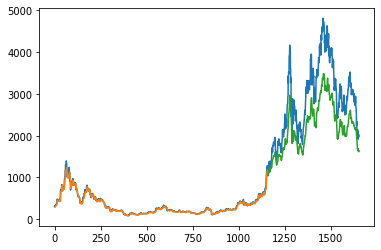

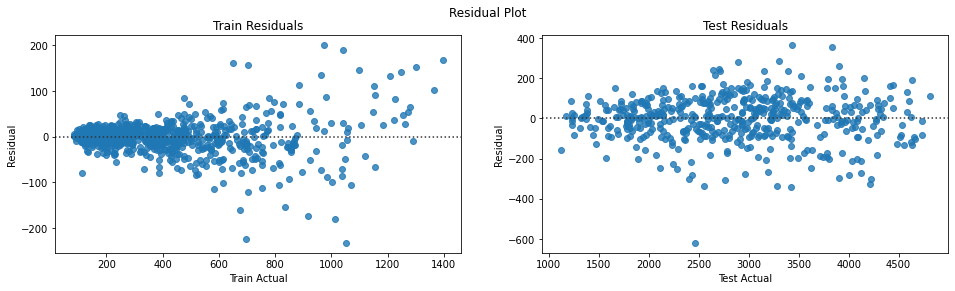

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013      -6.883650
1  0.146969       20.915009      -5.019816
2  0.129638       -4.274017      -4.592603
3  0.130904       -2.432984      -4.479638
4  0.133590        1.470001      -5.249103
5  0.143049       15.217988      -6.434541
6  0.137239        6.773986      -5.172068
7  0.141072       12.344025      -4.585456
8  0.128224       -6.329010      -3.921289
9  0.146512       20.251007      -5.296793

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623    -12.688174
1  0.100503     -46.618408      2.387505
2  0.175033      61.703003      1.961223
3  0.130263      -3.365357      0.300904
4  0.151229      27.107300     -5.200201
5  0.215155     120.016357     -0.743805
6  0.136004       4.978150      3.259042
7 -0.046796    -260.703125      3.697755
8  0.211663     114.941284    -11.286541
9  0.128779      -5.521606    -10.751139

RMSE Train = 26.001181569221643
RMSE Test = 143.03109710070026
MAPE Train = 8.719886207991097
MAPE Test = 1.136916471471124
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


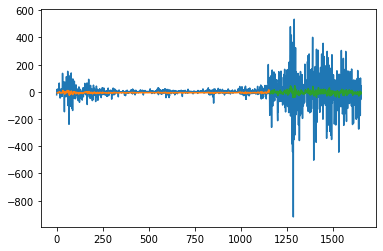

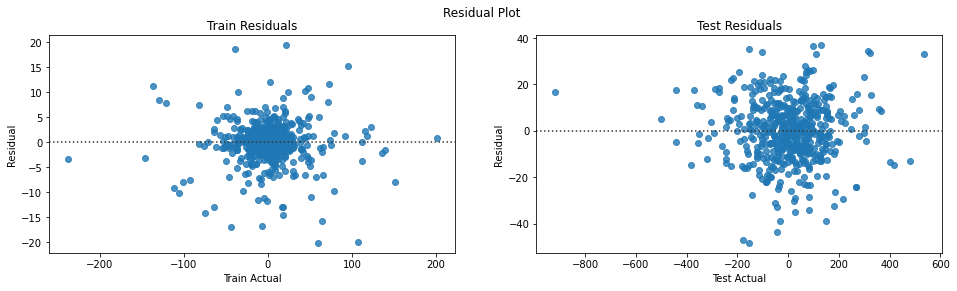

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606       0.000637
1  0.066037        0.066037       0.002349
2 -0.012659       -0.012659       0.004847
3 -0.007298       -0.007298       0.003303
4  0.004442        0.004442       0.000751
5  0.045783        0.045783      -0.001181
6  0.019487        0.019487       0.002658
7  0.034832        0.034832       0.002581
8 -0.017258       -0.017258       0.003583
9  0.056190        0.056190       0.001106

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572      0.003315
1 -0.038260      -0.038260      0.007537
2  0.052655       0.052655      0.006377
3 -0.002728      -0.002728      0.004978
4  0.022035       0.022035      0.000779
5  0.095457       0.095457      0.002024
6  0.003614       0.003614      0.007314
7 -0.188605      -0.188605      0.004662
8  0.102482       0.102482      0.006248
9 -0.004465      -0.004465      0.005588

RMSE Train = 0.05078054176122387
RMSE Test = 0.050884615568561366
MAPE Train = 1.292276361926298
MAPE Test = 1.0804681728413252
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


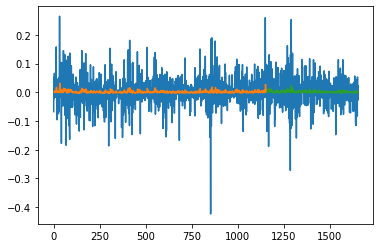

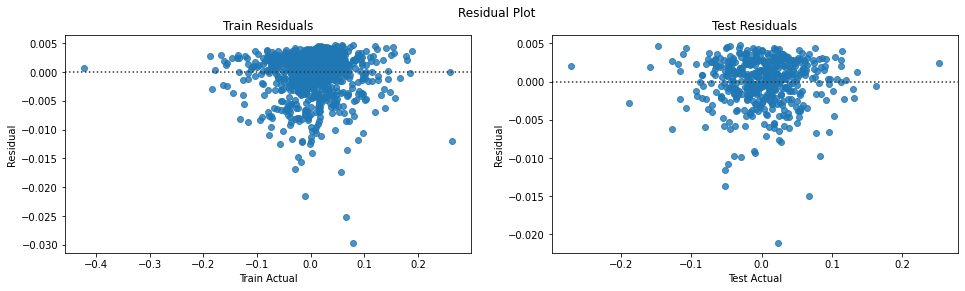

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     311.434174
1  0.053582      337.631012     317.790588
2  0.052678      333.356995     322.096527
3  0.052163      330.924011     332.474121
4  0.052474      332.394012     339.874695
5  0.055693      347.612000     337.406860
6  0.057126      354.385986     339.940582
7  0.059737      366.730011     347.296265
8  0.058398      360.401001     358.966766
9  0.062681      380.652008     365.002533

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1051.489014
1  0.230029    1171.834595   1080.115967
2  0.243080    1233.537598   1124.614502
3  0.242368    1230.172241   1155.657104
4  0.248102    1257.279541   1154.760986
5  0.273487    1377.295898   1180.911865
6  0.274540    1382.274048   1210.333252
7  0.219397    1121.570923   1252.433594
8  0.243709    1236.512207   1244.089844
9  0.242541    1230.990601   1197.467773

RMSE Train = 36.790658521882754
RMSE Test = 376.80423033454383
MAPE Train = 0.06512199347667884
MAPE Test = 0.1119797092484836
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


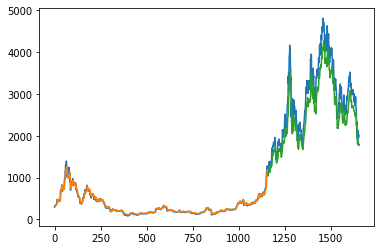

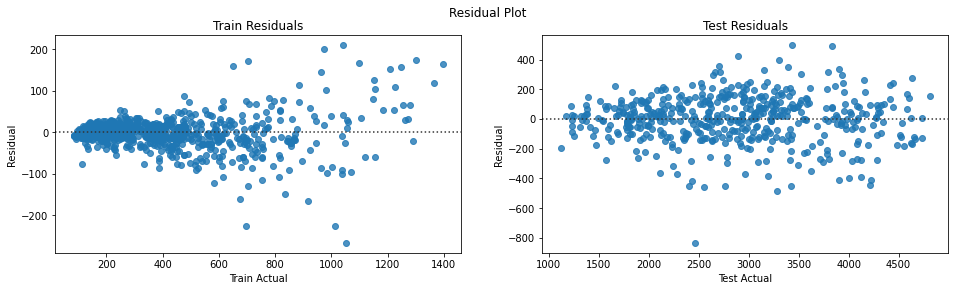

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013       2.145008
1  0.146969       20.915009       3.329991
2  0.129638       -4.274017       3.119416
3  0.130904       -2.432984       3.718785
4  0.133590        1.470001       3.434705
5  0.143049       15.217988       2.465299
6  0.137239        6.773986       2.949341
7  0.141072       12.344025       3.420389
8  0.128224       -6.329010       3.849292
9  0.146512       20.251007       3.298372

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623     -4.518686
1  0.100503     -46.618408      5.342979
2  0.175033      61.703003      8.609671
3  0.130263      -3.365357      6.211202
4  0.151229      27.107300      2.682306
5  0.215155     120.016357      5.845712
6  0.136004       4.978150      5.845279
7 -0.046796    -260.703125      8.067088
8  0.211663     114.941284      3.334214
9  0.128779      -5.521606     -3.057290

RMSE Train = 25.208932799909807
RMSE Test = 141.96771141551196
MAPE Train = 3.8420254348449046
MAPE Test = 1.085025995321864
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


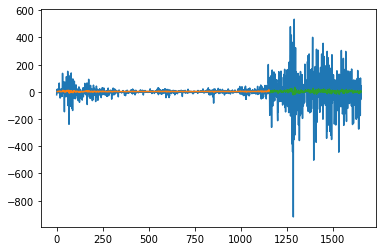

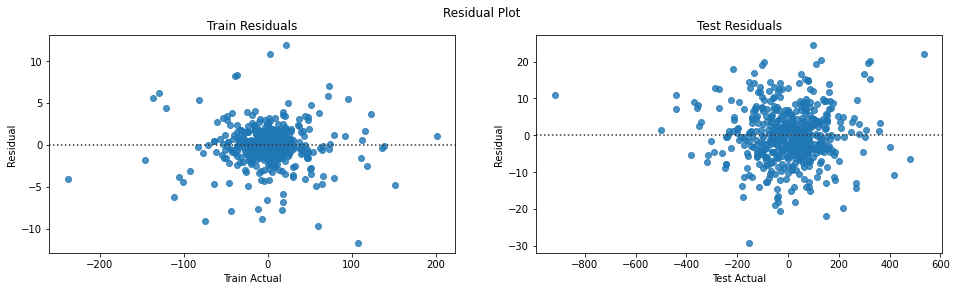

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606       0.003131
1  0.066037        0.066037       0.005240
2 -0.012659       -0.012659       0.005381
3 -0.007298       -0.007298       0.006758
4  0.004442        0.004442       0.004818
5  0.045783        0.045783       0.001728
6  0.019487        0.019487       0.004049
7  0.034832        0.034832       0.005583
8 -0.017258       -0.017258       0.006812
9  0.056190        0.056190       0.004589

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572      0.003096
1 -0.038260      -0.038260      0.008175
2  0.052655       0.052655      0.009865
3 -0.002728      -0.002728      0.007389
4  0.022035       0.022035      0.003725
5  0.095457       0.095457      0.005614
6  0.003614       0.003614      0.006959
7 -0.188605      -0.188605      0.008260
8  0.102482       0.102482      0.006401
9 -0.004465      -0.004465      0.005035

RMSE Train = 0.05085385251459376
RMSE Test = 0.05091982942873225
MAPE Train = 1.6001948583667776
MAPE Test = 1.167843274776647
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


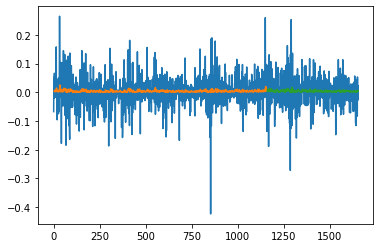

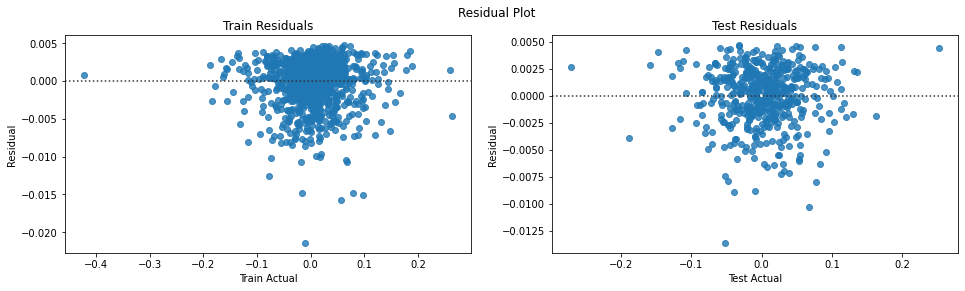

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.049158      316.716003     318.342133
1  0.053582      337.631012     324.073395
2  0.052678      333.356995     332.965271
3  0.052163      330.924011     341.060516
4  0.052474      332.394012     345.020813
5  0.055693      347.612000     343.465790
6  0.057126      354.385986     349.033508
7  0.059737      366.730011     357.210602
8  0.058398      360.401001     368.837891
9  0.062681      380.652008     372.653320

Test


y_test  y_test_actual  test_predict
0  0.239890    1218.453003   1102.993164
1  0.230029    1171.834595   1148.581665
2  0.243080    1233.537598   1186.513550
3  0.242368    1230.172241   1219.670898
4  0.248102    1257.279541   1224.665161
5  0.273487    1377.295898   1251.865112
6  0.274540    1382.274048   1302.516724
7  0.219397    1121.570923   1352.007202
8  0.243709    1236.512207   1296.245239
9  0.242541    1230.990601   1253.508545

RMSE Train = 33.696395028622675
RMSE Test = 275.4685610468979
MAPE Train = 0.061354730693631856
MAPE Test = 0.06719911237833903
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


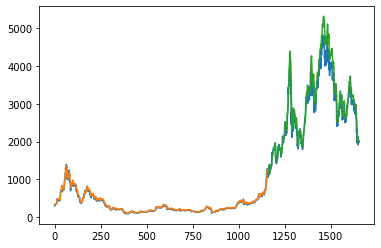

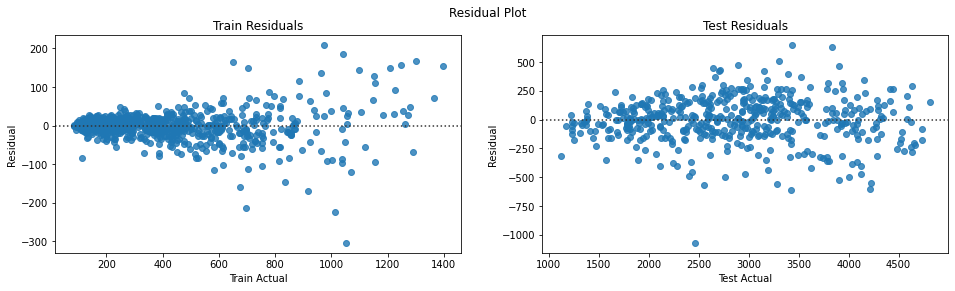

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.138639        8.808013       3.501886
1  0.146969       20.915009       6.711055
2  0.129638       -4.274017       6.321114
3  0.130904       -2.432984       6.344395
4  0.133590        1.470001       6.492055
5  0.143049       15.217988       4.784501
6  0.137239        6.773986       6.009420
7  0.141072       12.344025       6.278622
8  0.128224       -6.329010       7.447968
9  0.146512       20.251007       5.715096

Test


y_test  y_test_actual  test_predict
0  0.192929      87.713623     -3.618562
1  0.100503     -46.618408     11.002226
2  0.175033      61.703003     12.530262
3  0.130263      -3.365357     14.520250
4  0.151229      27.107300      3.512823
5  0.215155     120.016357     11.832267
6  0.136004       4.978150     14.010869
7 -0.046796    -260.703125     12.228055
8  0.211663     114.941284     11.722269
9  0.128779      -5.521606      5.365200

RMSE Train = 25.47314668207109
RMSE Test = 142.62215166163503
MAPE Train = 6.954954661515608
MAPE Test = 1.2064435539092337
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


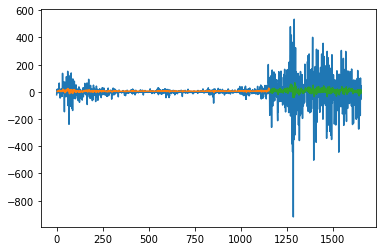

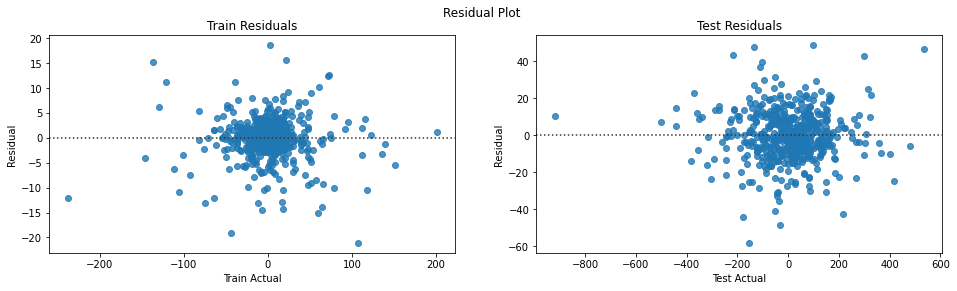

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.028606        0.028606      -0.000824
1  0.066037        0.066037      -0.001888
2 -0.012659       -0.012659       0.002004
3 -0.007298       -0.007298      -0.001636
4  0.004442        0.004442      -0.002521
5  0.045783        0.045783      -0.004022
6  0.019487        0.019487      -0.001168
7  0.034832        0.034832      -0.000566
8 -0.017258       -0.017258      -0.001769
9  0.056190        0.056190      -0.003081

Test


y_test  y_test_actual  test_predict
0  0.077572       0.077572     -0.030323
1 -0.038260      -0.038260      0.007575
2  0.052655       0.052655     -0.000298
3 -0.002728      -0.002728      0.001206
4  0.022035       0.022035     -0.000345
5  0.095457       0.095457     -0.002063
6  0.003614       0.003614      0.003448
7 -0.188605      -0.188605      0.000347
8  0.102482       0.102482      0.018226
9 -0.004465      -0.004465     -0.025679

RMSE Train = 0.05033748218759084
RMSE Test = 0.05078068266850484
MAPE Train = 2.521640818343764
MAPE Test = 1.1385570203683124
train_predict length = 1155 
test_predict length = 494 
test_predict range start = 1162
test_predict range end = 1654


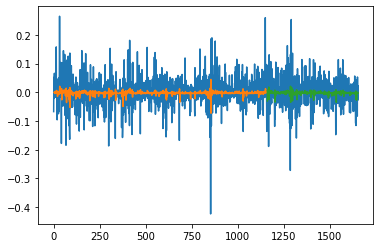

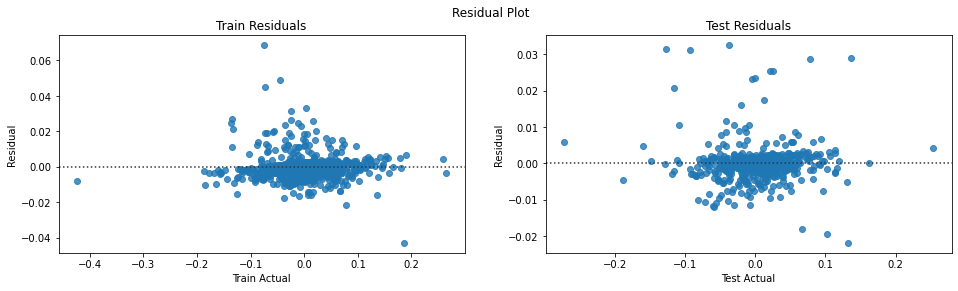

----------------------------


model  interval                            target  rmse_train  \
0          LSTM       3.0                             Close   36.851874   
1          LSTM       3.0             Change in Close Price   26.001182   
2          LSTM       3.0  Percentage Change in Close Price    0.050781   
3  Stacked LSTM       3.0                             Close   36.790659   
4  Stacked LSTM       3.0             Change in Close Price   25.208933   
5  Stacked LSTM       3.0  Percentage Change in Close Price    0.050854   
6      CNN-LSTM       3.0                             Close   33.696395   
7      CNN-LSTM       3.0             Change in Close Price   25.473147   
8      CNN-LSTM       3.0  Percentage Change in Close Price    0.050337   

    rmse_test  mape_train  mape_test  
0  734.648883    0.060925   0.218242  
1  143.031097    8.719886   1.136916  
2    0.050885    1.292276   1.080468  
3  376.804230    0.065122   0.111980  
4  141.967711    3.842025   1.085026  
5    0.050920    1.600195   1.167843  
6  275.468561    0.061355   0.067199  
7  142.622152    6.954955   1.206444  
8    0.050781    2.521641   1.138557

################################################################
################## Executing for interval  5  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,)
Close test shape, test shape  (492, 5, 1) (492,)

Delta Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,)
Close test shape, test shape  (492, 5, 1) (492,)

Delta Percentage Close train, test length  1153 492
Close train shape, test shape  (1153, 5, 1) (1153,

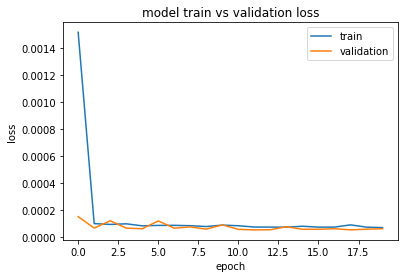

(LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 100)               40800     
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


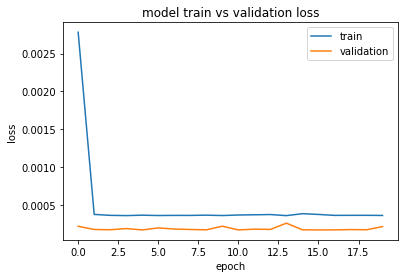

(LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 100)               40800     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


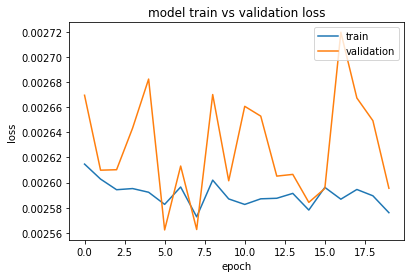

(Stacked LSTM) Fit Model for Close
Model Summary
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_15 (LSTM)              (None, 5, 100)            40800     
                                                                 
 lstm_16 (LSTM)              (None, 100)               80400     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


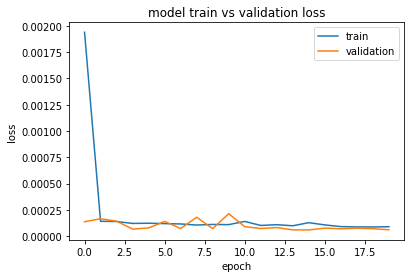

(Stacked LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_17 (LSTM)              (None, 5, 100)            40800     
                                                                 
 lstm_18 (LSTM)              (None, 100)               80400     
                                                                 
 dense_13 (Dense)            (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


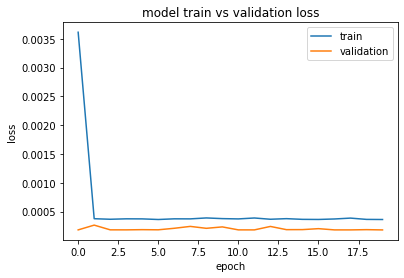

(Stacked LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_19 (LSTM)              (None, 5, 100)            40800     
                                                                 
 lstm_20 (LSTM)              (None, 100)               80400     
                                                                 
 dense_14 (Dense)            (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


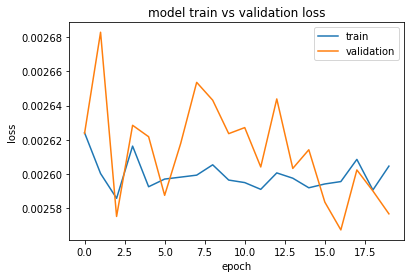

(CNN-LSTM) Fit Model for Close
Model Summary
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 3, 8)              32        
                                                                 
 lstm_21 (LSTM)              (None, 100)               43600     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


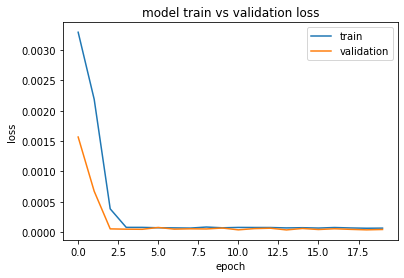

(CNN-LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 3, 8)              32        
                                                                 
 lstm_22 (LSTM)              (None, 100)               43600     
                                                                 
 dense_16 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


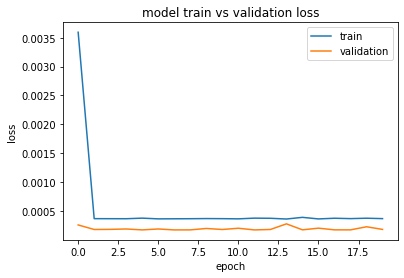

(CNN-LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 3, 8)              32        
                                                                 
 lstm_23 (LSTM)              (None, 100)               43600     
                                                                 
 dense_17 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


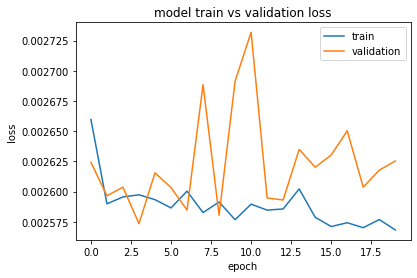

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     305.040253
1  0.052163      330.924011     311.677094
2  0.052474      332.394012     314.944183
3  0.055693      347.612000     318.874939
4  0.057126      354.385986     324.922913
5  0.059737      366.730011     329.420441
6  0.058398      360.401001     337.199310
7  0.062681      380.652008     342.766235
8  0.068924      410.165985     352.443359
9  0.082619      474.911011     366.597504

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1120.329956
1  0.242368    1230.172241   1141.735107
2  0.248102    1257.279541   1167.516235
3  0.273487    1377.295898   1184.923096
4  0.274540    1382.274048   1225.941406
5  0.219397    1121.570923   1260.302979
6  0.243709    1236.512207   1209.792603
7  0.242541    1230.990601   1197.424438
8  0.276515    1391.609375   1199.223755
9  0.262302    1324.414795   1231.642578

RMSE Train = 38.751325071602956
RMSE Test = 392.839031475697
MAPE Train = 0.07428823790547777
MAPE Test = 0.11492820541184326
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


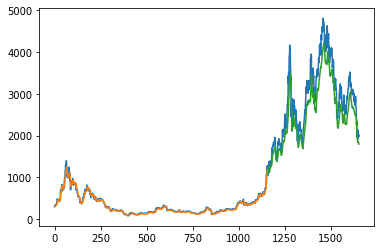

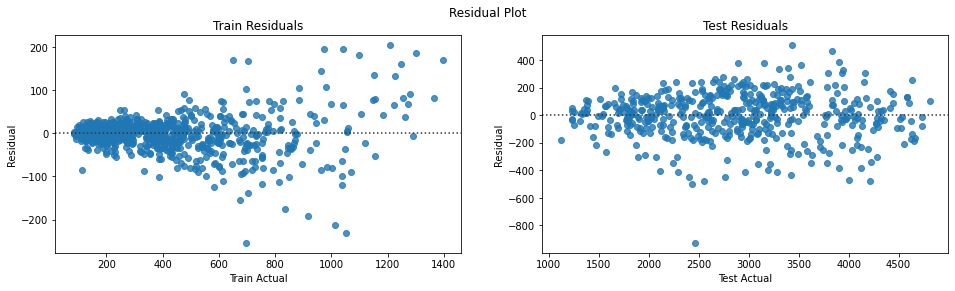

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017      -5.664492
1  0.130904       -2.432984      -5.855271
2  0.133590        1.470001      -6.607497
3  0.143049       15.217988      -6.497542
4  0.137239        6.773986      -5.807300
5  0.141072       12.344025      -6.075852
6  0.128224       -6.329010      -5.389269
7  0.146512       20.251007      -6.159471
8  0.152885       29.513977      -5.036687
9  0.177126       64.745026      -3.818027

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003     -8.067746
1  0.130263      -3.365357     -0.166982
2  0.151229      27.107300     -1.014457
3  0.215155     120.016357     -2.265517
4  0.136004       4.978150      3.079285
5 -0.046796    -260.703125      2.074340
6  0.211663     114.941284    -17.392698
7  0.128779      -5.521606     -7.164937
8  0.243091     160.618774     -8.208649
9  0.086346     -67.194580      0.626154

RMSE Train = 26.34621846255169
RMSE Test = 143.3976853171175
MAPE Train = 10.011182713867685
MAPE Test = 1.1313708439485013
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


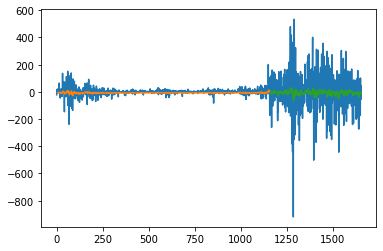

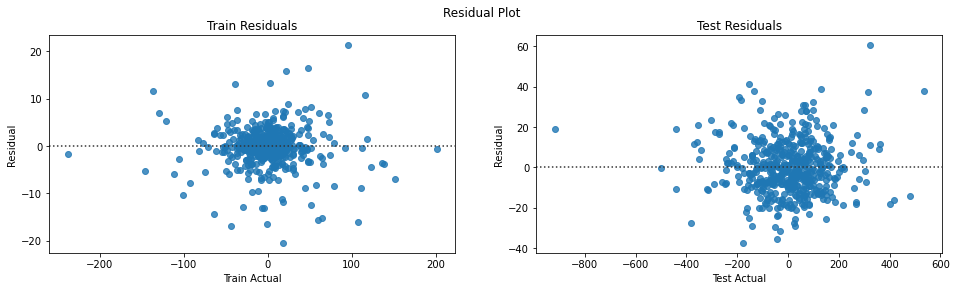

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659       0.004159
1 -0.007298       -0.007298       0.003271
2  0.004442        0.004442       0.001426
3  0.045783        0.045783       0.000884
4  0.019487        0.019487       0.002594
5  0.034832        0.034832       0.001165
6 -0.017258       -0.017258       0.002334
7  0.056190        0.056190       0.001335
8  0.077535        0.077535       0.003979
9  0.157851        0.157851       0.006778

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655      0.003940
1 -0.002728      -0.002728      0.005826
2  0.022035       0.022035      0.004299
3  0.095457       0.095457      0.002397
4  0.003614       0.003614      0.006577
5 -0.188605      -0.188605      0.004945
6  0.102482       0.102482      0.008195
7 -0.004465      -0.004465      0.008607
8  0.130479       0.130479      0.005536
9 -0.048286      -0.048286      0.009119

RMSE Train = 0.05075402533937572
RMSE Test = 0.050774927602940126
MAPE Train = 1.2522583422203635
MAPE Test = 1.065988082037778
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


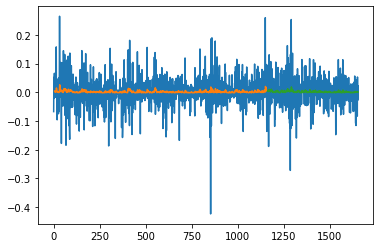

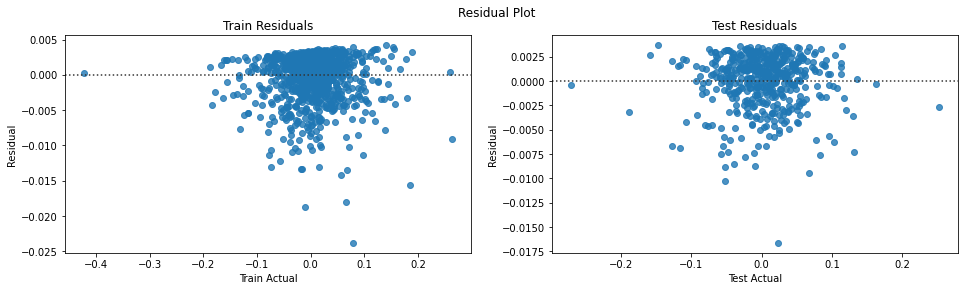

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     319.177155
1  0.052163      330.924011     326.793274
2  0.052474      332.394012     331.124969
3  0.055693      347.612000     336.595978
4  0.057126      354.385986     341.938721
5  0.059737      366.730011     344.932343
6  0.058398      360.401001     351.457886
7  0.062681      380.652008     358.613953
8  0.068924      410.165985     367.842773
9  0.082619      474.911011     379.023010

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1113.967896
1  0.242368    1230.172241   1130.765869
2  0.248102    1257.279541   1162.489136
3  0.273487    1377.295898   1180.490601
4  0.274540    1382.274048   1206.466797
5  0.219397    1121.570923   1241.454712
6  0.243709    1236.512207   1222.706909
7  0.242541    1230.990601   1207.834106
8  0.276515    1391.609375   1207.433350
9  0.262302    1324.414795   1218.173218

RMSE Train = 41.0997246166261
RMSE Test = 458.23078774596604
MAPE Train = 0.06878351604198944
MAPE Test = 0.13386398768687452
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


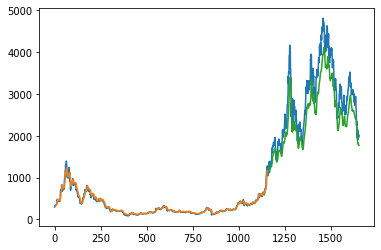

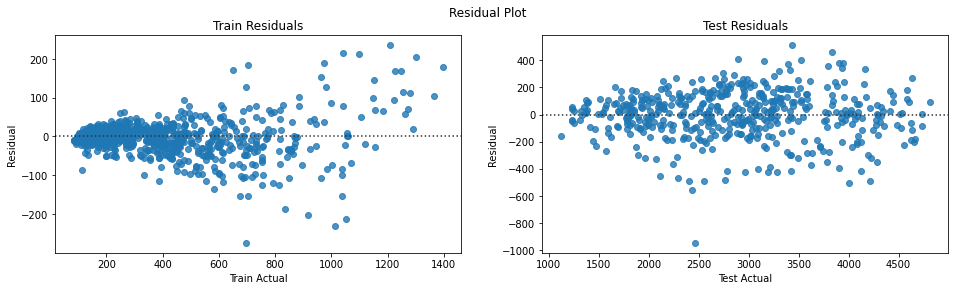

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017       2.557278
1  0.130904       -2.432984       3.206393
2  0.133590        1.470001       2.860676
3  0.143049       15.217988       3.049442
4  0.137239        6.773986       3.009982
5  0.141072       12.344025       2.685771
6  0.128224       -6.329010       3.045370
7  0.146512       20.251007       3.168730
8  0.152885       29.513977       3.389159
9  0.177126       64.745026       3.511047

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003      0.285310
1  0.130263      -3.365357      5.295312
2  0.151229      27.107300      6.827788
3  0.215155     120.016357      5.142454
4  0.136004       4.978150      4.688255
5 -0.046796    -260.703125      6.839136
6  0.211663     114.941284      3.527875
7  0.128779      -5.521606      3.711074
8  0.243091     160.618774      2.921186
9  0.086346     -67.194580      1.656396

RMSE Train = 25.24384929199764
RMSE Test = 142.21800127195414
MAPE Train = 3.6817909646317704
MAPE Test = 1.0577263589603279
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


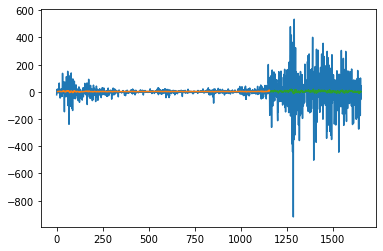

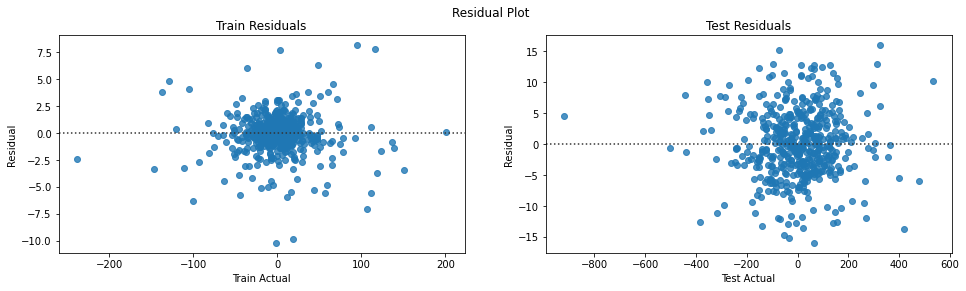

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659       0.004477
1 -0.007298       -0.007298       0.004847
2  0.004442        0.004442       0.004257
3  0.045783        0.045783       0.004372
4  0.019487        0.019487       0.004359
5  0.034832        0.034832       0.003926
6 -0.017258       -0.017258       0.004445
7  0.056190        0.056190       0.004533
8  0.077535        0.077535       0.004879
9  0.157851        0.157851       0.005161

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655      0.004782
1 -0.002728      -0.002728      0.005487
2  0.022035       0.022035      0.005713
3  0.095457       0.095457      0.004886
4  0.003614       0.003614      0.004877
5 -0.188605      -0.188605      0.005430
6  0.102482       0.102482      0.004727
7 -0.004465      -0.004465      0.005452
8  0.130479       0.130479      0.005422
9 -0.048286      -0.048286      0.005506

RMSE Train = 0.050894342577032486
RMSE Test = 0.05077597805670848
MAPE Train = 1.7627384618385933
MAPE Test = 1.1404425413386097
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


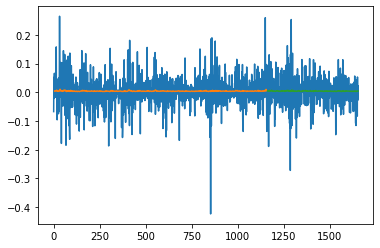

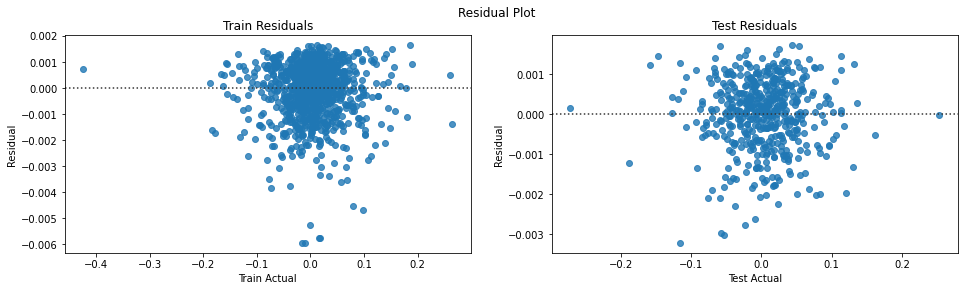

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.052678      333.356995     317.158600
1  0.052163      330.924011     325.411011
2  0.052474      332.394012     332.224365
3  0.055693      347.612000     331.509979
4  0.057126      354.385986     332.059753
5  0.059737      366.730011     340.410614
6  0.058398      360.401001     351.737823
7  0.062681      380.652008     359.254486
8  0.068924      410.165985     364.858002
9  0.082619      474.911011     378.189972

Test


y_test  y_test_actual  test_predict
0  0.243080    1233.537598   1135.502441
1  0.242368    1230.172241   1166.972168
2  0.248102    1257.279541   1175.078247
3  0.273487    1377.295898   1186.768555
4  0.274540    1382.274048   1232.119385
5  0.219397    1121.570923   1282.301514
6  0.243709    1236.512207   1261.868408
7  0.242541    1230.990601   1193.775757
8  0.276515    1391.609375   1151.195190
9  0.262302    1324.414795   1200.397827

RMSE Train = 35.39680123754432
RMSE Test = 235.75410550960143
MAPE Train = 0.04919655810830894
MAPE Test = 0.06925259436746184
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


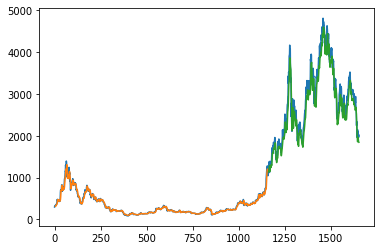

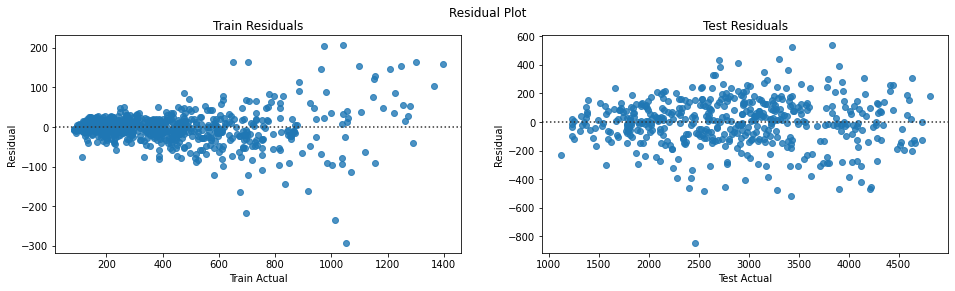

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.129638       -4.274017      -0.617023
1  0.130904       -2.432984      -0.075870
2  0.133590        1.470001      -0.536219
3  0.143049       15.217988      -1.228779
4  0.137239        6.773986      -1.201707
5  0.141072       12.344025      -0.565153
6  0.128224       -6.329010       0.004847
7  0.146512       20.251007      -0.189636
8  0.152885       29.513977      -0.393800
9  0.177126       64.745026       0.469571

Test


y_test  y_test_actual  test_predict
0  0.175033      61.703003      4.619970
1  0.130263      -3.365357      4.914077
2  0.151229      27.107300      2.996836
3  0.215155     120.016357      1.934541
4  0.136004       4.978150      4.389687
5 -0.046796    -260.703125      7.298706
6  0.211663     114.941284     -0.572625
7  0.128779      -5.521606     -6.585168
8  0.243091     160.618774     -6.645116
9  0.086346     -67.194580      2.590760

RMSE Train = 25.293831208610705
RMSE Test = 142.44141576034394
MAPE Train = 3.1643797019072797
MAPE Test = 1.113049368561925
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


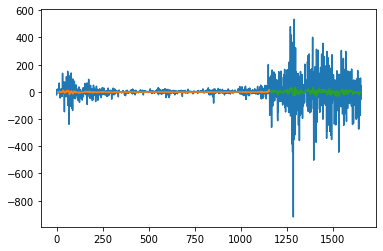

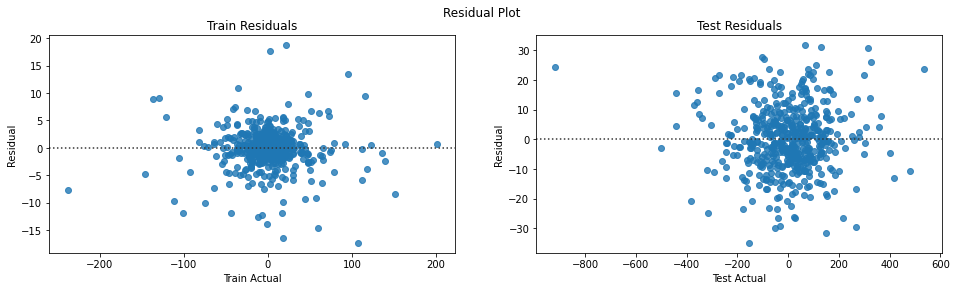

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0 -0.012659       -0.012659       0.004253
1 -0.007298       -0.007298       0.004246
2  0.004442        0.004442       0.003016
3  0.045783        0.045783       0.000446
4  0.019487        0.019487       0.001477
5  0.034832        0.034832       0.001386
6 -0.017258       -0.017258       0.004163
7  0.056190        0.056190       0.003014
8  0.077535        0.077535       0.005951
9  0.157851        0.157851       0.005398

Test


y_test  y_test_actual  test_predict
0  0.052655       0.052655      0.002423
1 -0.002728      -0.002728      0.007901
2  0.022035       0.022035      0.006653
3  0.095457       0.095457      0.006317
4  0.003614       0.003614      0.006642
5 -0.188605      -0.188605      0.006140
6  0.102482       0.102482      0.007586
7 -0.004465      -0.004465      0.005986
8  0.130479       0.130479      0.009036
9 -0.048286      -0.048286      0.015812

RMSE Train = 0.050733867783485605
RMSE Test = 0.05095013140659115
MAPE Train = 1.5062893193086064
MAPE Test = 1.1276708870841503
train_predict length = 1153 
test_predict length = 492 
test_predict range start = 1164
test_predict range end = 1654


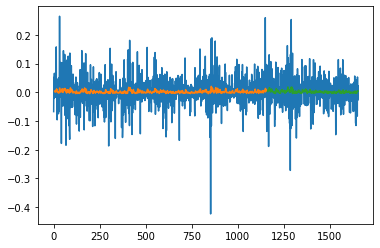

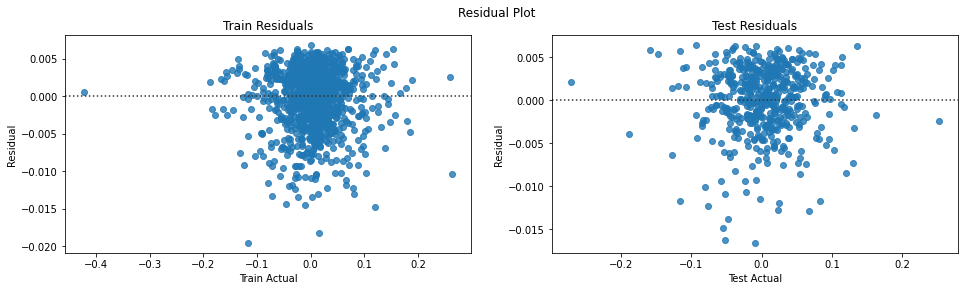

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   36.851874   
1           LSTM       3.0             Change in Close Price   26.001182   
2           LSTM       3.0  Percentage Change in Close Price    0.050781   
3   Stacked LSTM       3.0                             Close   36.790659   
4   Stacked LSTM       3.0             Change in Close Price   25.208933   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050854   
6       CNN-LSTM       3.0                             Close   33.696395   
7       CNN-LSTM       3.0             Change in Close Price   25.473147   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050337   
9           LSTM       5.0                             Close   38.751325   
10          LSTM       5.0             Change in Close Price   26.346218   
11          LSTM       5.0  Percentage Change in Close Price    0.050754   
12  Stacked LSTM       5.0                             Close   41.099725   
13  Stacked LSTM       5.0             Change in Close Price   25.243849   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050894   
15      CNN-LSTM       5.0                             Close   35.396801   
16      CNN-LSTM       5.0             Change in Close Price   25.293831   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050734   

     rmse_test  mape_train  mape_test  
0   734.648883    0.060925   0.218242  
1   143.031097    8.719886   1.136916  
2     0.050885    1.292276   1.080468  
3   376.804230    0.065122   0.111980  
4   141.967711    3.842025   1.085026  
5     0.050920    1.600195   1.167843  
6   275.468561    0.061355   0.067199  
7   142.622152    6.954955   1.206444  
8     0.050781    2.521641   1.138557  
9   392.839031    0.074288   0.114928  
10  143.397685   10.011183   1.131371  
11    0.050775    1.252258   1.065988  
12  458.230788    0.068784   0.133864  
13  142.218001    3.681791   1.057726  
14    0.050776    1.762738   1.140443  
15  235.754106    0.049197   0.069253  
16  142.441416    3.164380   1.113049  
17    0.050950    1.506289   1.127671

################################################################
################## Executing for interval  10  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) (1148,)
Close test shape, test shape  (487, 10, 1) (487,)

Delta Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) (1148,)
Close test shape, test shape  (487, 10, 1) (487,)

Delta Percentage Close train, test length  1148 487
Close train shape, test shape  (1148, 10, 1) 

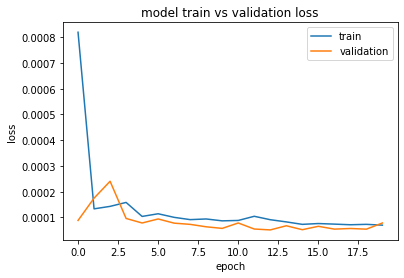

(LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_25 (LSTM)              (None, 100)               40800     
                                                                 
 dense_19 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


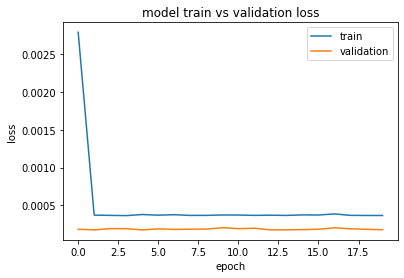

(LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_26 (LSTM)              (None, 100)               40800     
                                                                 
 dense_20 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


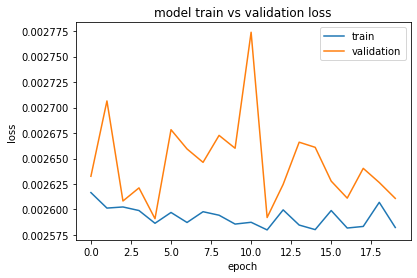

(Stacked LSTM) Fit Model for Close
Model Summary
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 10, 100)           40800     
                                                                 
 lstm_28 (LSTM)              (None, 100)               80400     
                                                                 
 dense_21 (Dense)            (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


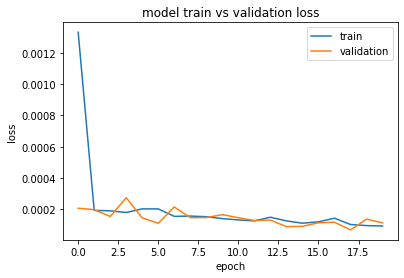

(Stacked LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_29 (LSTM)              (None, 10, 100)           40800     
                                                                 
 lstm_30 (LSTM)              (None, 100)               80400     
                                                                 
 dense_22 (Dense)            (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


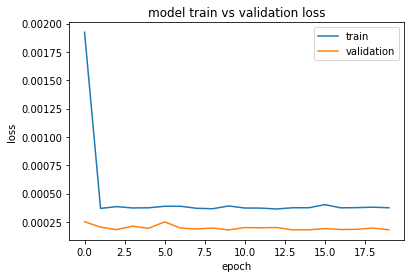

(Stacked LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_31 (LSTM)              (None, 10, 100)           40800     
                                                                 
 lstm_32 (LSTM)              (None, 100)               80400     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


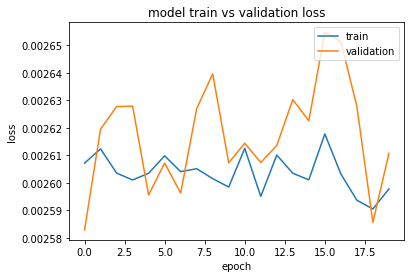

(CNN-LSTM) Fit Model for Close
Model Summary
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 8, 8)              32        
                                                                 
 lstm_33 (LSTM)              (None, 100)               43600     
                                                                 
 dense_24 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


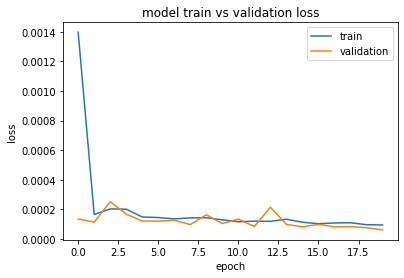

(CNN-LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 8, 8)              32        
                                                                 
 lstm_34 (LSTM)              (None, 100)               43600     
                                                                 
 dense_25 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


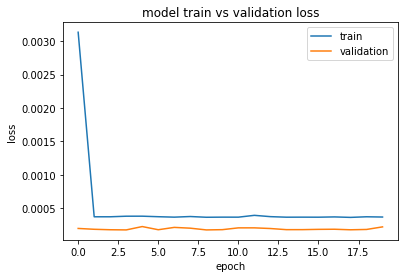

(CNN-LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 8, 8)              32        
                                                                 
 lstm_35 (LSTM)              (None, 100)               43600     
                                                                 
 dense_26 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


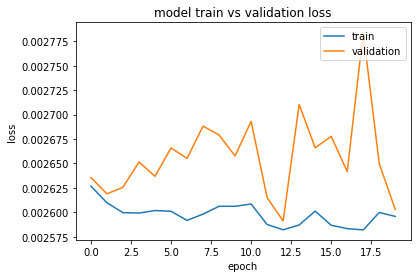

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011     324.538208
1  0.058398      360.401001     332.804382
2  0.062681      380.652008     337.474640
3  0.068924      410.165985     346.281311
4  0.082619      474.911011     361.590118
5  0.080792      466.276001     393.091309
6  0.081861      471.329987     415.438965
7  0.083770      480.355011     433.392120
8  0.082194      472.902008     448.387360
9  0.072595      427.523010     456.173065

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923   1266.875244
1  0.243709    1236.512207   1205.992920
2  0.242541    1230.990601   1188.467773
3  0.276515    1391.609375   1174.104980
4  0.262302    1324.414795   1221.224121
5  0.269207    1357.058105   1243.757446
6  0.247236    1253.187134   1268.128052
7  0.264011    1332.492188   1247.078491
8  0.274593    1382.522827   1251.952759
9  0.273238    1376.115479   1273.008423

RMSE Train = 41.87738414108316
RMSE Test = 309.5308069285451
MAPE Train = 0.10075803896722071
MAPE Test = 0.08890906128673821
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


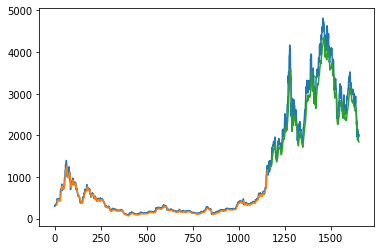

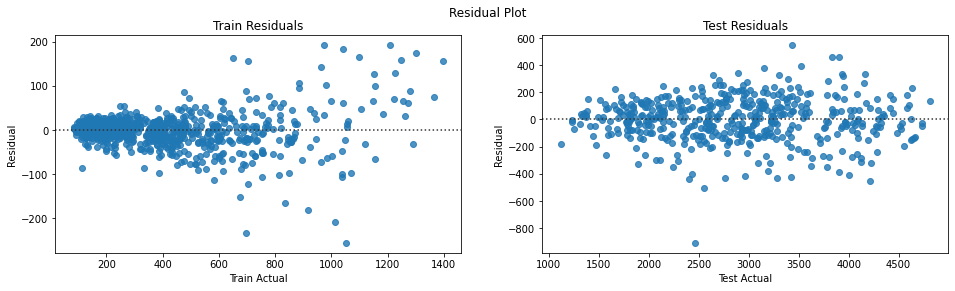

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025       5.413215
1  0.128224       -6.329010       5.912937
2  0.146512       20.251007       5.074970
3  0.152885       29.513977       5.988673
4  0.177126       64.745026       7.325214
5  0.126637       -8.635010      10.525634
6  0.136056        5.053986       8.835167
7  0.138788        9.025024       8.095135
8  0.127450       -7.453003       7.770534
9  0.101356      -45.378998       6.486533

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125     13.495229
1  0.211663     114.941284     -2.994916
2  0.128779      -5.521606      4.744608
3  0.243091     160.618774      4.095753
4  0.086346     -67.194580     13.305553
5  0.155038      32.643310      7.850666
6  0.061111    -103.870971      8.832005
7  0.187144      79.305054      2.014089
8  0.167002      50.030639      6.921456
9  0.128170      -6.407348      9.426717

RMSE Train = 25.39265871509591
RMSE Test = 143.43862270883216
MAPE Train = 5.431628169954517
MAPE Test = 1.191852451446778
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


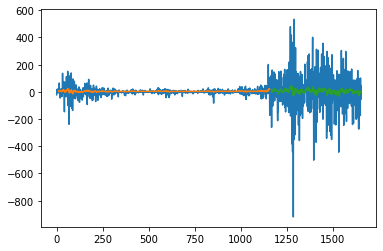

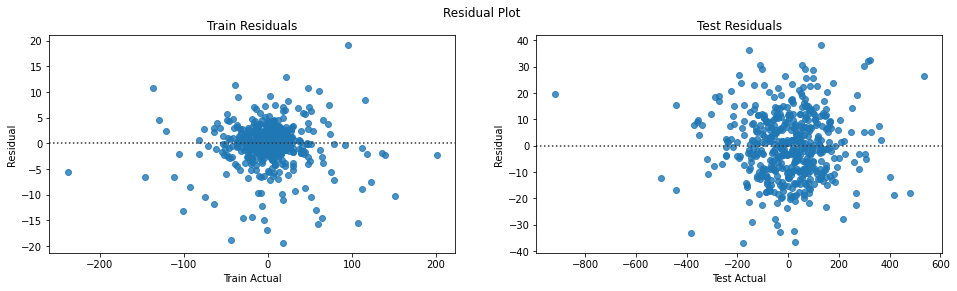

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832       0.003069
1 -0.017258       -0.017258       0.004046
2  0.056190        0.056190       0.002279
3  0.077535        0.077535       0.005584
4  0.157851        0.157851       0.009909
5 -0.018182       -0.018182       0.021678
6  0.010839        0.010839       0.015859
7  0.019148        0.019148       0.011294
8 -0.015516       -0.015516       0.008108
9 -0.095959       -0.095959       0.005357

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605      0.007186
1  0.102482       0.102482      0.009795
2 -0.004465      -0.004465      0.012680
3  0.130479       0.130479      0.008618
4 -0.048286      -0.048286      0.016249
5  0.024647       0.024647      0.012136
6 -0.076541      -0.076541      0.008489
7  0.063283       0.063283      0.006874
8  0.037547       0.037547      0.007620
9 -0.004635      -0.004635      0.005957

RMSE Train = 0.05085706561664097
RMSE Test = 0.050859417804712426
MAPE Train = 1.5286303312280214
MAPE Test = 1.117871824358872
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


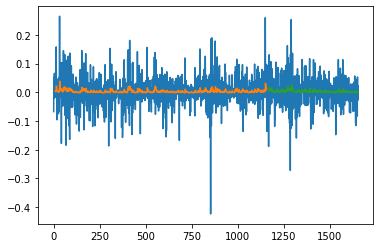

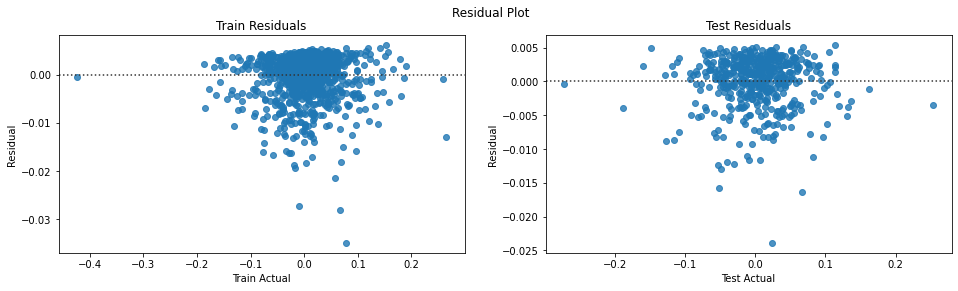

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011     328.903076
1  0.058398      360.401001     335.669373
2  0.062681      380.652008     341.390747
3  0.068924      410.165985     348.023468
4  0.082619      474.911011     359.313599
5  0.080792      466.276001     381.899750
6  0.081861      471.329987     405.096039
7  0.083770      480.355011     425.379517
8  0.082194      472.902008     441.958160
9  0.072595      427.523010     452.529572

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923   1162.930542
1  0.243709    1236.512207   1147.260620
2  0.242541    1230.990601   1124.351318
3  0.276515    1391.609375   1100.340942
4  0.262302    1324.414795   1106.910034
5  0.269207    1357.058105   1114.977173
6  0.247236    1253.187134   1137.281372
7  0.264011    1332.492188   1147.300049
8  0.274593    1382.522827   1157.053223
9  0.273238    1376.115479   1168.221558

RMSE Train = 52.526147412170566
RMSE Test = 680.7304064794121
MAPE Train = 0.07734957677419335
MAPE Test = 0.20265847022260902
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


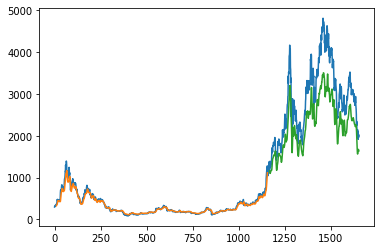

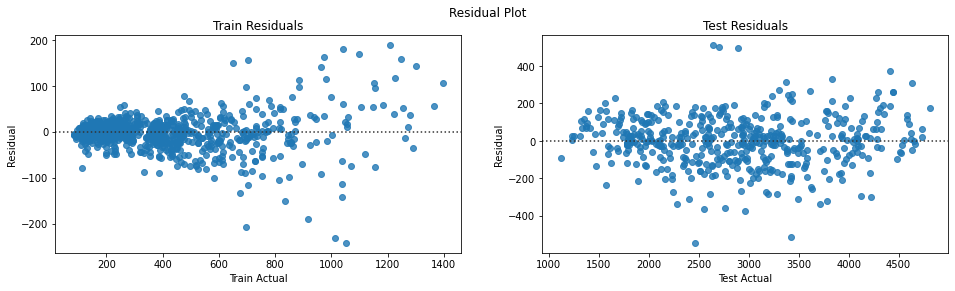

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025       3.962950
1  0.128224       -6.329010       4.252162
2  0.146512       20.251007       4.106278
3  0.152885       29.513977       4.300155
4  0.177126       64.745026       4.627441
5  0.126637       -8.635010       5.451591
6  0.136056        5.053986       5.736169
7  0.138788        9.025024       5.768309
8  0.127450       -7.453003       5.691772
9  0.101356      -45.378998       5.323813

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125      7.237459
1  0.211663     114.941284      5.436345
2  0.128779      -5.521606      5.363446
3  0.243091     160.618774      4.468541
4  0.086346     -67.194580      5.725297
5  0.155038      32.643310      6.066466
6  0.061111    -103.870971      5.949365
7  0.187144      79.305054      4.756498
8  0.167002      50.030639      4.829765
9  0.128170      -6.407348      4.836305

RMSE Train = 25.360225317707535
RMSE Test = 142.63925215040018
MAPE Train = 4.812479193999237
MAPE Test = 1.083450598094358
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


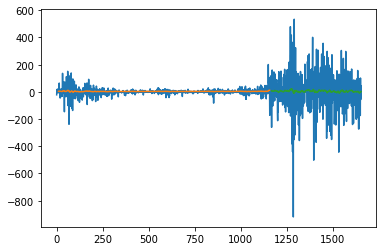

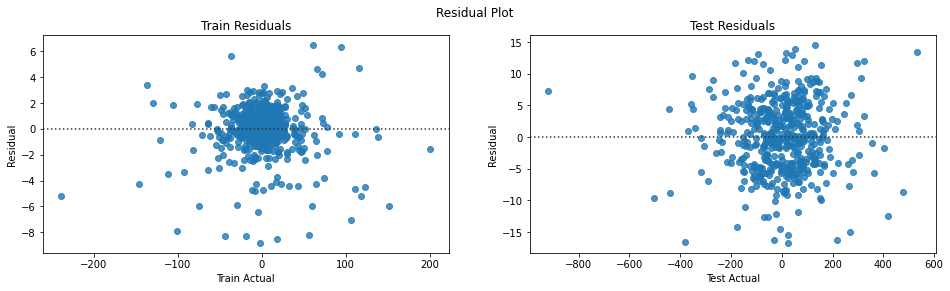

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832       0.002006
1 -0.017258       -0.017258       0.002208
2  0.056190        0.056190       0.001889
3  0.077535        0.077535       0.002297
4  0.157851        0.157851       0.003051
5 -0.018182       -0.018182       0.004868
6  0.010839        0.010839       0.005641
7  0.019148        0.019148       0.005693
8 -0.015516       -0.015516       0.005396
9 -0.095959       -0.095959       0.004634

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605      0.004085
1  0.102482       0.102482      0.003947
2 -0.004465      -0.004465      0.004802
3  0.130479       0.130479      0.004502
4 -0.048286      -0.048286      0.005417
5  0.024647       0.024647      0.005722
6 -0.076541      -0.076541      0.005401
7  0.063283       0.063283      0.004966
8  0.037547       0.037547      0.004916
9 -0.004635      -0.004635      0.004427

RMSE Train = 0.05093462716108268
RMSE Test = 0.05073480945886162
MAPE Train = 1.333161284312222
MAPE Test = 1.040894061626573
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


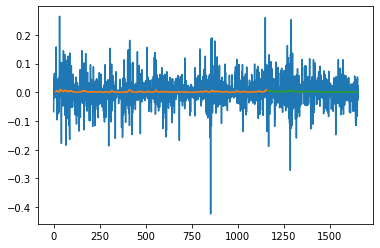

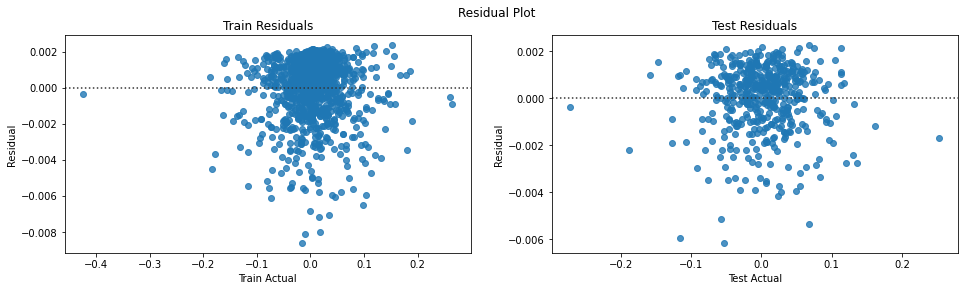

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.059737      366.730011     351.747681
1  0.058398      360.401001     359.478210
2  0.062681      380.652008     366.348572
3  0.068924      410.165985     374.644287
4  0.082619      474.911011     385.198242
5  0.080792      466.276001     406.589722
6  0.081861      471.329987     431.742798
7  0.083770      480.355011     458.440338
8  0.082194      472.902008     476.514069
9  0.072595      427.523010     488.838257

Test


y_test  y_test_actual  test_predict
0  0.219397    1121.570923   1297.867065
1  0.243709    1236.512207   1305.236328
2  0.242541    1230.990601   1293.543213
3  0.276515    1391.609375   1252.371216
4  0.262302    1324.414795   1259.946655
5  0.269207    1357.058105   1277.097412
6  0.247236    1253.187134   1315.204346
7  0.264011    1332.492188   1322.626465
8  0.274593    1382.522827   1326.407593
9  0.273238    1376.115479   1326.688599

RMSE Train = 42.87421426860955
RMSE Test = 275.50491331694514
MAPE Train = 0.06760204768391284
MAPE Test = 0.07261993031973672
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


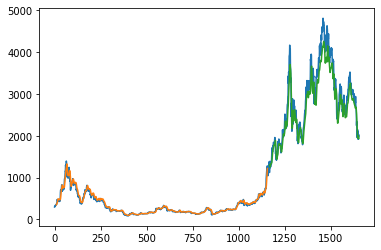

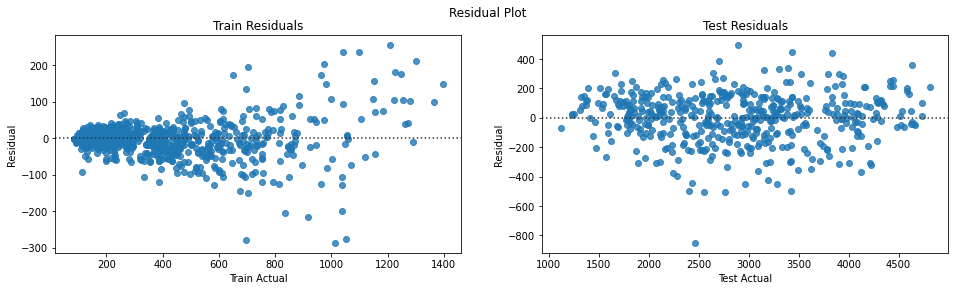

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.141072       12.344025      -6.301002
1  0.128224       -6.329010      -5.876366
2  0.146512       20.251007      -5.840284
3  0.152885       29.513977      -5.839613
4  0.177126       64.745026      -5.618794
5  0.126637       -8.635010      -4.334858
6  0.136056        5.053986      -2.937091
7  0.138788        9.025024      -2.551395
8  0.127450       -7.453003      -3.429060
9  0.101356      -45.378998      -4.027735

Test


y_test  y_test_actual  test_predict
0 -0.046796    -260.703125     -0.060623
1  0.211663     114.941284     -1.127596
2  0.128779      -5.521606     -5.806759
3  0.243091     160.618774     -9.441408
4  0.086346     -67.194580     -5.774208
5  0.155038      32.643310     -3.637599
6  0.061111    -103.870971     -2.661566
7  0.187144      79.305054     -5.446618
8  0.167002      50.030639     -6.844386
9  0.128170      -6.407348     -6.654255

RMSE Train = 26.443656865196843
RMSE Test = 142.85003278463574
MAPE Train = 10.03711780050234
MAPE Test = 1.1103613056060402
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


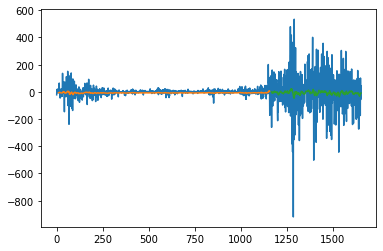

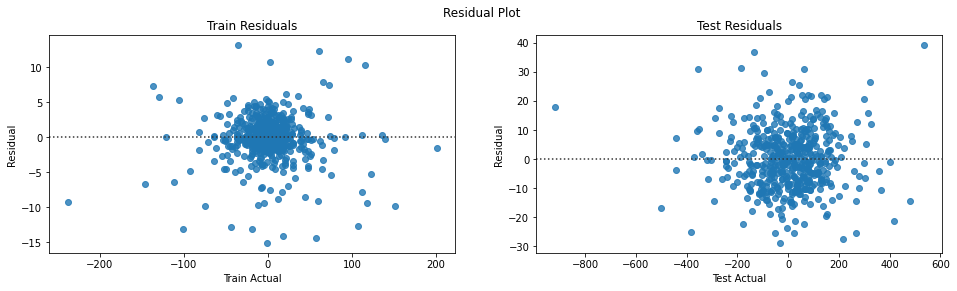

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.034832        0.034832       0.002465
1 -0.017258       -0.017258       0.002026
2  0.056190        0.056190       0.002273
3  0.077535        0.077535       0.001897
4  0.157851        0.157851       0.002045
5 -0.018182       -0.018182       0.001922
6  0.010839        0.010839       0.011165
7  0.019148        0.019148       0.009129
8 -0.015516       -0.015516       0.006980
9 -0.095959       -0.095959       0.005558

Test


y_test  y_test_actual  test_predict
0 -0.188605      -0.188605      0.006229
1  0.102482       0.102482      0.008014
2 -0.004465      -0.004465      0.003712
3  0.130479       0.130479      0.014012
4 -0.048286      -0.048286      0.010772
5  0.024647       0.024647      0.015503
6 -0.076541      -0.076541      0.011854
7  0.063283       0.063283      0.009623
8  0.037547       0.037547      0.007009
9 -0.004635      -0.004635      0.007236

RMSE Train = 0.05083553837792409
RMSE Test = 0.05074479502933341
MAPE Train = 1.5010529061651778
MAPE Test = 1.0691487586577757
train_predict length = 1148 
test_predict length = 487 
test_predict range start = 1169
test_predict range end = 1654


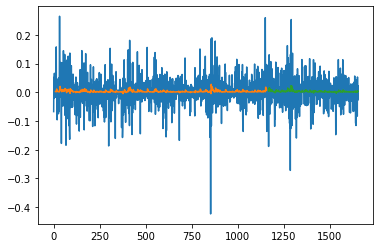

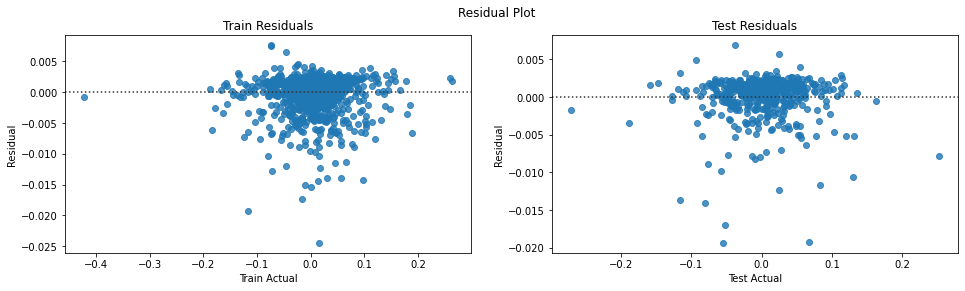

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   36.851874   
1           LSTM       3.0             Change in Close Price   26.001182   
2           LSTM       3.0  Percentage Change in Close Price    0.050781   
3   Stacked LSTM       3.0                             Close   36.790659   
4   Stacked LSTM       3.0             Change in Close Price   25.208933   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050854   
6       CNN-LSTM       3.0                             Close   33.696395   
7       CNN-LSTM       3.0             Change in Close Price   25.473147   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050337   
9           LSTM       5.0                             Close   38.751325   
10          LSTM       5.0             Change in Close Price   26.346218   
11          LSTM       5.0  Percentage Change in Close Price    0.050754   
12  Stacked LSTM       5.0                             Close   41.099725   
13  Stacked LSTM       5.0             Change in Close Price   25.243849   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050894   
15      CNN-LSTM       5.0                             Close   35.396801   
16      CNN-LSTM       5.0             Change in Close Price   25.293831   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050734   
18          LSTM      10.0                             Close   41.877384   
19          LSTM      10.0             Change in Close Price   25.392659   
20          LSTM      10.0  Percentage Change in Close Price    0.050857   
21  Stacked LSTM      10.0                             Close   52.526147   
22  Stacked LSTM      10.0             Change in Close Price   25.360225   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.050935   
24      CNN-LSTM      10.0                             Close   42.874214   
25      CNN-LSTM      10.0             Change in Close Price   26.443657   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.050836   

     rmse_test  mape_train  mape_test  
0   734.648883    0.060925   0.218242  
1   143.031097    8.719886   1.136916  
2     0.050885    1.292276   1.080468  
3   376.804230    0.065122   0.111980  
4   141.967711    3.842025   1.085026  
5     0.050920    1.600195   1.167843  
6   275.468561    0.061355   0.067199  
7   142.622152    6.954955   1.206444  
8     0.050781    2.521641   1.138557  
9   392.839031    0.074288   0.114928  
10  143.397685   10.011183   1.131371  
11    0.050775    1.252258   1.065988  
12  458.230788    0.068784   0.133864  
13  142.218001    3.681791   1.057726  
14    0.050776    1.762738   1.140443  
15  235.754106    0.049197   0.069253  
16  142.441416    3.164380   1.113049  
17    0.050950    1.506289   1.127671  
18  309.530807    0.100758   0.088909  
19  143.438623    5.431628   1.191852  
20    0.050859    1.528630   1.117872  
21  680.730406    0.077350   0.202658  
22  142.639252    4.812479   1.083451  
23    0.050735    1.333161   1.040894  
24  275.504913    0.067602   0.072620  
25  142.850033   10.037118   1.110361  
26    0.050745    1.501053   1.069149

################################################################
################## Executing for interval  20  ##################
################################################################
Split Train and Test Data
Close Total data Size = 1655
Close Train data Size = 1158
Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------
Delta Close Total data Size = 1655
Delta Close Train data Size = 1158
Delta Close Test data Size = 497
---------------------

Create (X, y) from Train and Test Data
Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) (1138,)
Close test shape, test shape  (477, 20, 1) (477,)

Delta Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) (1138,)
Close test shape, test shape  (477, 20, 1) (477,)

Delta Percentage Close train, test length  1138 477
Close train shape, test shape  (1138, 20, 1) 

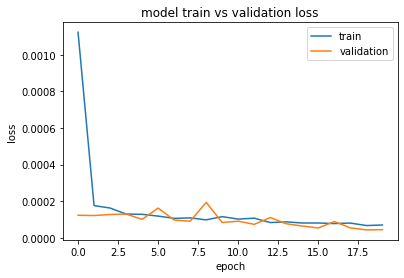

(LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_37 (LSTM)              (None, 100)               40800     
                                                                 
 dense_28 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


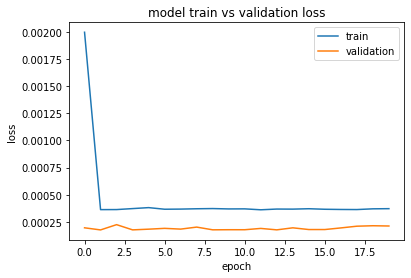

(LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 100)               40800     
                                                                 
 dense_29 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None


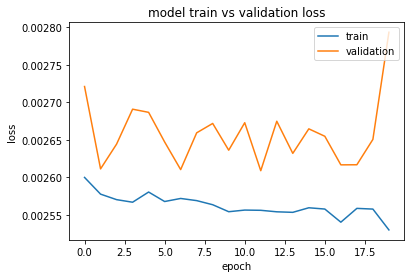

(Stacked LSTM) Fit Model for Close
Model Summary
Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_39 (LSTM)              (None, 20, 100)           40800     
                                                                 
 lstm_40 (LSTM)              (None, 100)               80400     
                                                                 
 dense_30 (Dense)            (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


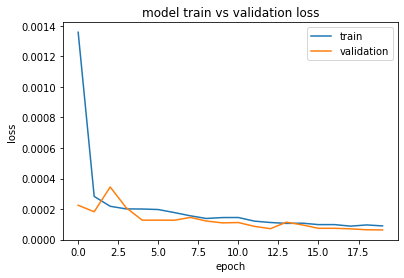

(Stacked LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_41 (LSTM)              (None, 20, 100)           40800     
                                                                 
 lstm_42 (LSTM)              (None, 100)               80400     
                                                                 
 dense_31 (Dense)            (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


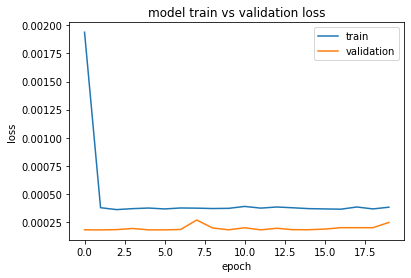

(Stacked LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_43 (LSTM)              (None, 20, 100)           40800     
                                                                 
 lstm_44 (LSTM)              (None, 100)               80400     
                                                                 
 dense_32 (Dense)            (None, 1)                 101       
                                                                 
Total params: 121,301
Trainable params: 121,301
Non-trainable params: 0
_________________________________________________________________
None


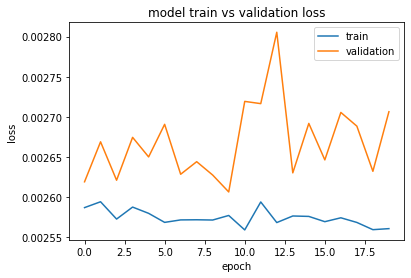

(CNN-LSTM) Fit Model for Close
Model Summary
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 18, 8)             32        
                                                                 
 lstm_45 (LSTM)              (None, 100)               43600     
                                                                 
 dense_33 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


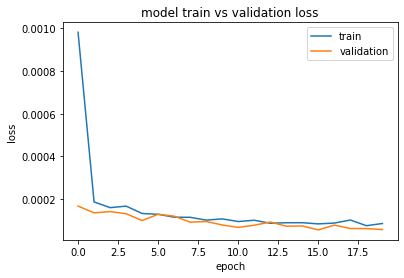

(CNN-LSTM) Fit Model for Delta Close
Model Summary
Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 18, 8)             32        
                                                                 
 lstm_46 (LSTM)              (None, 100)               43600     
                                                                 
 dense_34 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


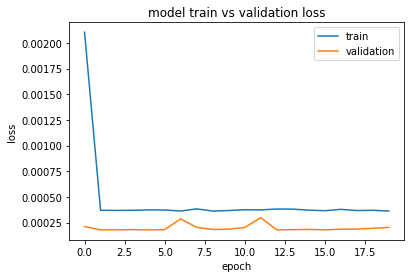

(CNN-LSTM) Fit Model for Delta Pct Change Close
Model Summary
Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 18, 8)             32        
                                                                 
 lstm_47 (LSTM)              (None, 100)               43600     
                                                                 
 dense_35 (Dense)            (None, 1)                 101       
                                                                 
Total params: 43,733
Trainable params: 43,733
Non-trainable params: 0
_________________________________________________________________
None


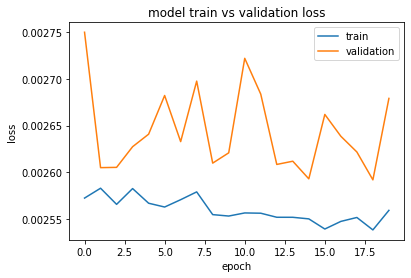

(LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     470.799377
1  0.080848      466.540009     465.739807
2  0.080194      463.449005     466.536987
3  0.080703      465.852997     466.089661
4  0.081623      470.204010     466.399567
5  0.080159      463.281006     468.008240
6  0.072821      428.588013     467.261444
7  0.074052      434.407990     455.845428
8  0.078625      456.031006     448.023224
9  0.082321      473.502014     448.684174

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1325.047974
1  0.271741    1369.040527   1316.975952
2  0.302655    1515.193726   1326.083862
3  0.333476    1660.909546   1376.608765
4  0.319485    1594.762695   1456.976318
5  0.345689    1718.650879   1500.588623
6  0.337059    1677.846802   1568.031250
7  0.323602    1614.227783   1604.341797
8  0.351605    1746.616821   1606.067871
9  0.356135    1768.035034   1641.288330

RMSE Train = 34.69311179380292
RMSE Test = 285.88160765084535
MAPE Train = 0.04940671750893482
MAPE Test = 0.07815709199824704
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


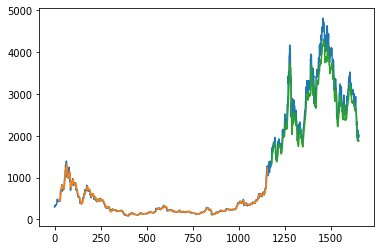

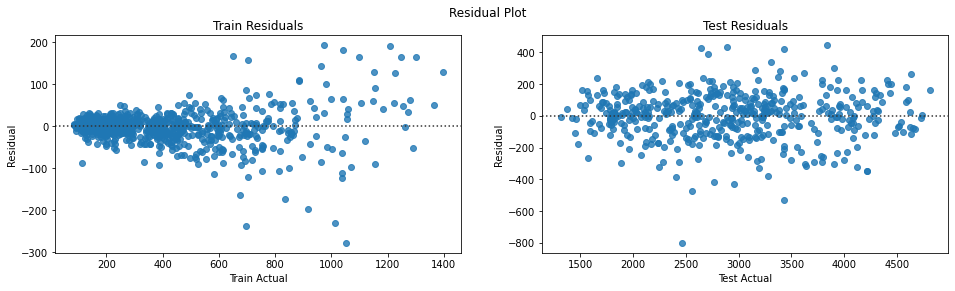

----------------------------
(LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004      -7.203357
1  0.145944       19.425995      -5.844031
2  0.130452       -3.091004      -4.794190
3  0.134233        2.403992      -5.303745
4  0.135572        4.351013      -5.381278
5  0.127815       -6.923004      -5.336902
6  0.108708      -34.692993      -5.963298
7  0.136583        5.819977      -8.115046
8  0.147456       21.623016      -7.382311
9  0.144599       17.471008      -5.877275

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273     -2.892607
1  0.169770      54.054321     -7.131129
2  0.233138     146.153199     -3.838406
3  0.232837     145.715820      3.678285
4  0.087067     -66.146851      9.695506
5  0.217819     123.888184      2.539064
6  0.104504     -40.804077      7.608298
7  0.088806     -63.619019      2.361603
8  0.223668     132.389038     -3.191241
9  0.147315      21.418213      3.411856

RMSE Train = 26.076243321876188
RMSE Test = 144.05254331071973
MAPE Train = 8.944603445326347
MAPE Test = 1.1400612540534338
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


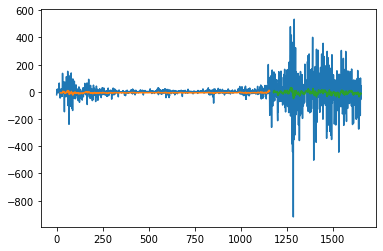

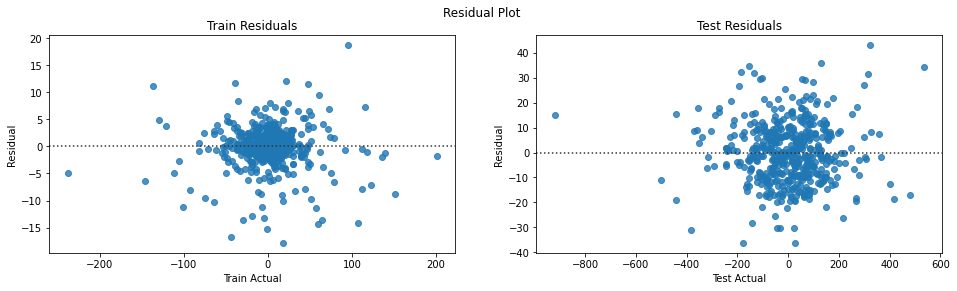

----------------------------
(LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824      -0.004476
1  0.043448        0.043448      -0.005514
2 -0.006625       -0.006625      -0.006278
3  0.005187        0.005187      -0.006840
4  0.009340        0.009340      -0.007255
5 -0.014723       -0.014723      -0.007562
6 -0.074885       -0.074885      -0.007787
7  0.013579        0.013579      -0.007663
8  0.049776        0.049776      -0.007865
9  0.038311        0.038311      -0.007936

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422     -0.006515
1  0.041106       0.041106     -0.006909
2  0.106756       0.106756     -0.007308
3  0.096170       0.096170     -0.002917
4 -0.039826      -0.039826     -0.001535
5  0.077684       0.077684     -0.003017
6 -0.023742      -0.023742     -0.003381
7 -0.037917      -0.037917     -0.004601
8  0.082014       0.082014     -0.005460
9  0.012263       0.012263     -0.004689

RMSE Train = 0.05148447874585638
RMSE Test = 0.05048562128051462
MAPE Train = 2.547091496316775
MAPE Test = 1.3443001982285694
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


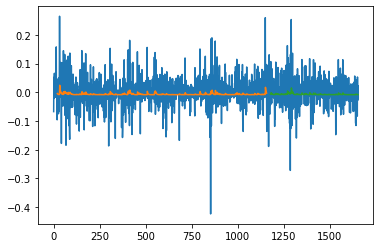

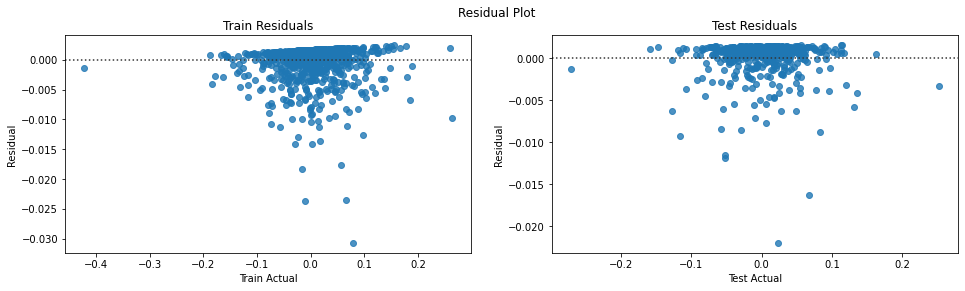

----------------------------
(Stacked LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     474.827759
1  0.080848      466.540009     470.609711
2  0.080194      463.449005     468.858459
3  0.080703      465.852997     467.954163
4  0.081623      470.204010     468.002411
5  0.080159      463.281006     469.247589
6  0.072821      428.588013     469.615936
7  0.074052      434.407990     463.219147
8  0.078625      456.031006     455.718079
9  0.082321      473.502014     452.756866

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1280.935669
1  0.271741    1369.040527   1281.787598
2  0.302655    1515.193726   1286.541748
3  0.333476    1660.909546   1319.955811
4  0.319485    1594.762695   1386.585083
5  0.345689    1718.650879   1443.851440
6  0.337059    1677.846802   1508.841064
7  0.323602    1614.227783   1556.540771
8  0.351605    1746.616821   1572.227539
9  0.356135    1768.035034   1595.011719

RMSE Train = 39.77914787759279
RMSE Test = 386.7068201738398
MAPE Train = 0.06281998415751192
MAPE Test = 0.10873958548944503
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


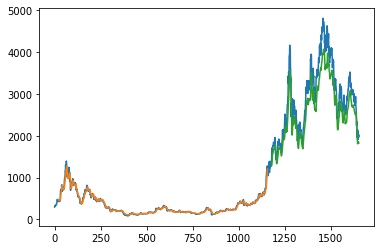

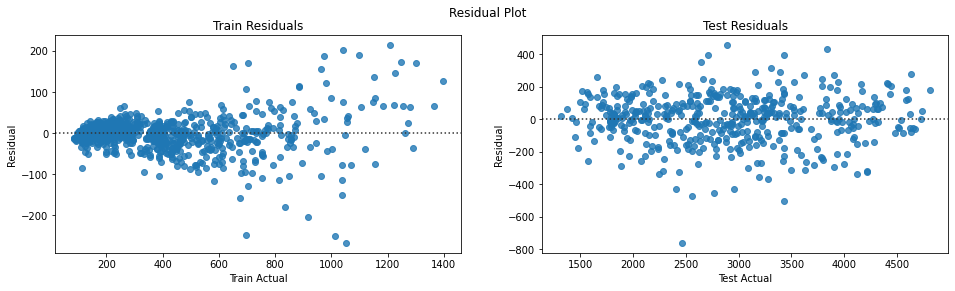

----------------------------
(Stacked LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004      -7.959026
1  0.145944       19.425995      -8.180992
2  0.130452       -3.091004      -8.223029
3  0.134233        2.403992      -8.296015
4  0.135572        4.351013      -8.366509
5  0.127815       -6.923004      -8.435488
6  0.108708      -34.692993      -8.553564
7  0.136583        5.819977      -8.962846
8  0.147456       21.623016      -9.142623
9  0.144599       17.471008      -9.058506

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273     -7.446288
1  0.169770      54.054321     -7.838373
2  0.233138     146.153199     -7.716290
3  0.232837     145.715820     -6.536916
4  0.087067     -66.146851     -4.801878
5  0.217819     123.888184     -4.531529
6  0.104504     -40.804077     -3.688884
7  0.088806     -63.619019     -3.848997
8  0.223668     132.389038     -4.887122
9  0.147315      21.418213     -4.679557

RMSE Train = 26.989171314974744
RMSE Test = 143.46678617246633
MAPE Train = 12.416352137666578
MAPE Test = 1.1113779240607358
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


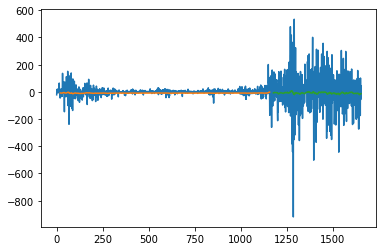

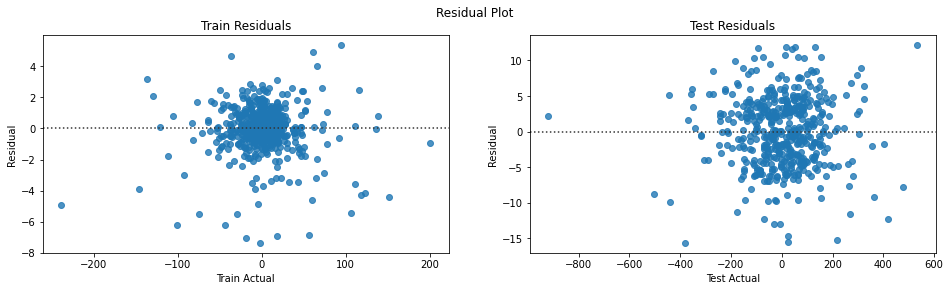

----------------------------
(Stacked LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824      -0.000617
1  0.043448        0.043448      -0.001250
2 -0.006625       -0.006625      -0.001726
3  0.005187        0.005187      -0.002240
4  0.009340        0.009340      -0.002731
5 -0.014723       -0.014723      -0.003175
6 -0.074885       -0.074885      -0.003547
7  0.013579        0.013579      -0.003858
8  0.049776        0.049776      -0.004099
9  0.038311        0.038311      -0.003990

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422     -0.000754
1  0.041106       0.041106     -0.001516
2  0.106756       0.106756     -0.002055
3  0.096170       0.096170     -0.000733
4 -0.039826      -0.039826      0.000769
5  0.077684       0.077684      0.001064
6 -0.023742      -0.023742      0.001540
7 -0.037917      -0.037917      0.001167
8  0.082014       0.082014      0.000404
9  0.012263       0.012263      0.000615

RMSE Train = 0.05104204106268354
RMSE Test = 0.04993527921602628
MAPE Train = 1.62429369951563
MAPE Test = 1.13079367024128
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


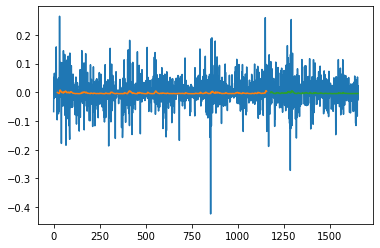

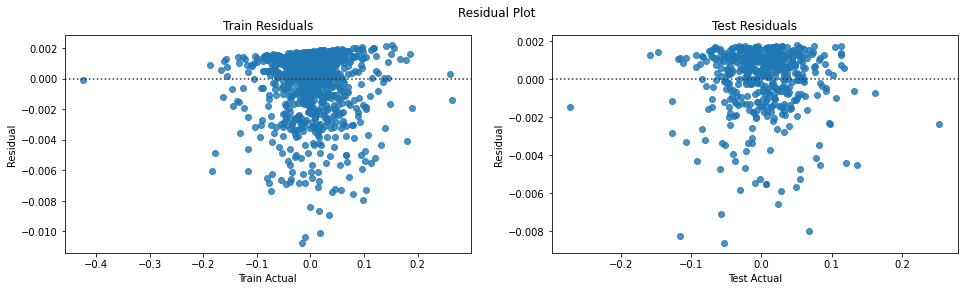

----------------------------
(CNN-LSTM) Evaluate Close
Train


y_train  y_train_actual  train_predict
0  0.076739      447.114014     497.242126
1  0.080848      466.540009     491.089325
2  0.080194      463.449005     490.190796
3  0.080703      465.852997     490.456360
4  0.081623      470.204010     491.386993
5  0.080159      463.281006     493.049896
6  0.072821      428.588013     492.844513
7  0.074052      434.407990     483.476349
8  0.078625      456.031006     474.793610
9  0.082321      473.502014     473.146759

Test


y_test  y_test_actual  test_predict
0  0.260308    1314.986206   1339.998901
1  0.271741    1369.040527   1335.336060
2  0.302655    1515.193726   1339.922241
3  0.333476    1660.909546   1384.252319
4  0.319485    1594.762695   1465.849121
5  0.345689    1718.650879   1522.148193
6  0.337059    1677.846802   1590.812500
7  0.323602    1614.227783   1632.096436
8  0.351605    1746.616821   1638.157471
9  0.356135    1768.035034   1665.809937

RMSE Train = 40.68415610147531
RMSE Test = 264.66510633558323
MAPE Train = 0.10306611667466506
MAPE Test = 0.07061745182171336
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


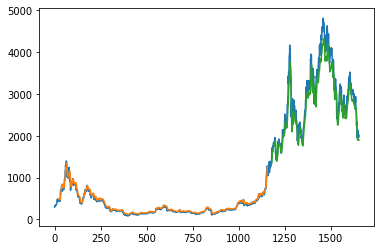

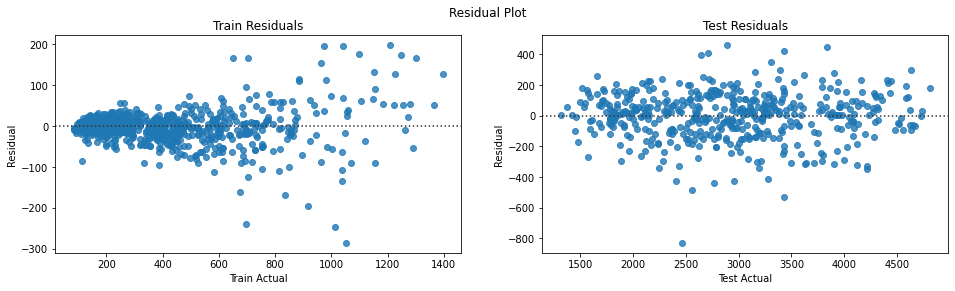

----------------------------
(CNN-LSTM) Evaluate Delta Close
Train


y_train  y_train_actual  train_predict
0  0.146058       19.591004      -2.481441
1  0.145944       19.425995      -3.515473
2  0.130452       -3.091004      -4.981353
3  0.134233        2.403992      -4.059485
4  0.135572        4.351013      -3.507113
5  0.127815       -6.923004      -3.811096
6  0.108708      -34.692993      -3.981562
7  0.136583        5.819977      -4.562802
8  0.147456       21.623016      -5.160611
9  0.144599       17.471008      -5.960418

Test


y_test  y_test_actual  test_predict
0  0.090519     -61.129273     -1.218362
1  0.169770      54.054321     -1.073755
2  0.233138     146.153199     -2.394271
3  0.232837     145.715820     -3.053413
4  0.087067     -66.146851      2.220679
5  0.217819     123.888184      7.166553
6  0.104504     -40.804077     10.590195
7  0.088806     -63.619019      5.676027
8  0.223668     132.389038      6.335797
9  0.147315      21.418213      2.237290

RMSE Train = 25.688028543900508
RMSE Test = 143.76140644634745
MAPE Train = 6.691006529593687
MAPE Test = 1.08522260874726
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


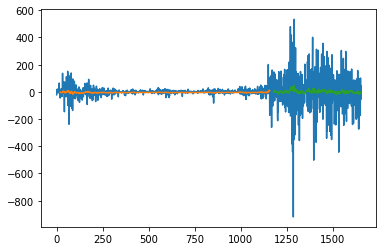

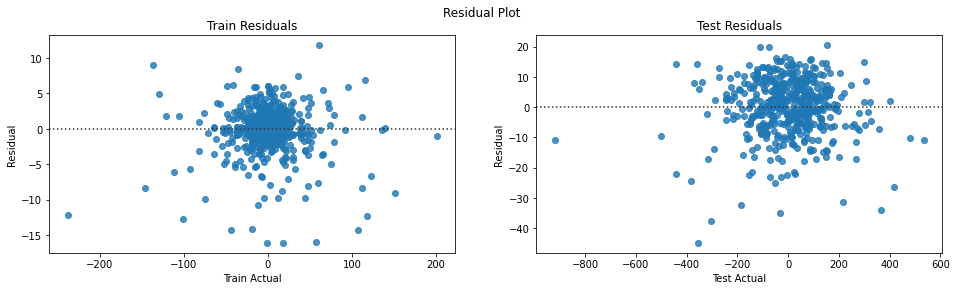

----------------------------
(CNN-LSTM) Evaluate Percentage Change Close
Train


y_train  y_train_actual  train_predict
0  0.045824        0.045824      -0.000323
1  0.043448        0.043448      -0.007745
2 -0.006625       -0.006625      -0.005850
3  0.005187        0.005187      -0.004570
4  0.009340        0.009340      -0.004232
5 -0.014723       -0.014723      -0.004199
6 -0.074885       -0.074885      -0.004269
7  0.013579        0.013579      -0.003861
8  0.049776        0.049776      -0.008080
9  0.038311        0.038311      -0.007805

Test


y_test  y_test_actual  test_predict
0 -0.044422      -0.044422     -0.001160
1  0.041106       0.041106     -0.001740
2  0.106756       0.106756     -0.003675
3  0.096170       0.096170     -0.003072
4 -0.039826      -0.039826     -0.001242
5  0.077684       0.077684      0.001653
6 -0.023742      -0.023742      0.000213
7 -0.037917      -0.037917      0.000900
8  0.082014       0.082014      0.000046
9  0.012263       0.012263     -0.003512

RMSE Train = 0.050821021431972695
RMSE Test = 0.0499532329242306
MAPE Train = 2.218185998757336
MAPE Test = 1.189063933133532
train_predict length = 1138 
test_predict length = 477 
test_predict range start = 1179
test_predict range end = 1654


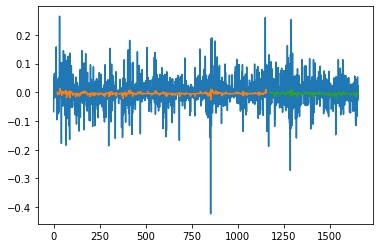

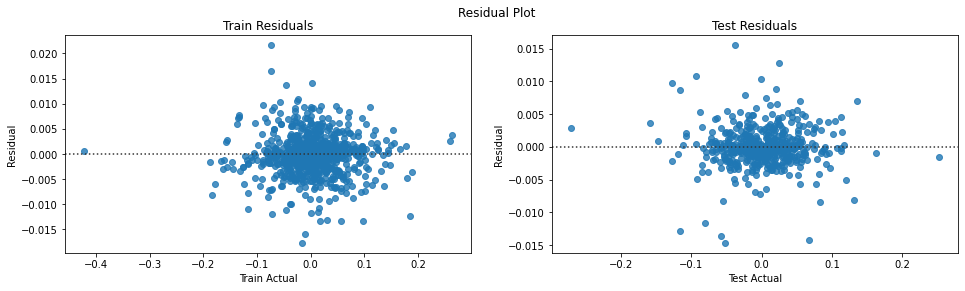

----------------------------


model  interval                            target  rmse_train  \
0           LSTM       3.0                             Close   36.851874   
1           LSTM       3.0             Change in Close Price   26.001182   
2           LSTM       3.0  Percentage Change in Close Price    0.050781   
3   Stacked LSTM       3.0                             Close   36.790659   
4   Stacked LSTM       3.0             Change in Close Price   25.208933   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050854   
6       CNN-LSTM       3.0                             Close   33.696395   
7       CNN-LSTM       3.0             Change in Close Price   25.473147   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050337   
9           LSTM       5.0                             Close   38.751325   
10          LSTM       5.0             Change in Close Price   26.346218   
11          LSTM       5.0  Percentage Change in Close Price    0.050754   
12  Stacked LSTM       5.0                             Close   41.099725   
13  Stacked LSTM       5.0             Change in Close Price   25.243849   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050894   
15      CNN-LSTM       5.0                             Close   35.396801   
16      CNN-LSTM       5.0             Change in Close Price   25.293831   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050734   
18          LSTM      10.0                             Close   41.877384   
19          LSTM      10.0             Change in Close Price   25.392659   
20          LSTM      10.0  Percentage Change in Close Price    0.050857   
21  Stacked LSTM      10.0                             Close   52.526147   
22  Stacked LSTM      10.0             Change in Close Price   25.360225   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.050935   
24      CNN-LSTM      10.0                             Close   42.874214   
25      CNN-LSTM      10.0             Change in Close Price   26.443657   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.050836   
27          LSTM      20.0                             Close   34.693112   
28          LSTM      20.0             Change in Close Price   26.076243   
29          LSTM      20.0  Percentage Change in Close Price    0.051484   
30  Stacked LSTM      20.0                             Close   39.779148   
31  Stacked LSTM      20.0             Change in Close Price   26.989171   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.051042   
33      CNN-LSTM      20.0                             Close   40.684156   
34      CNN-LSTM      20.0             Change in Close Price   25.688029   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050821   

     rmse_test  mape_train  mape_test  
0   734.648883    0.060925   0.218242  
1   143.031097    8.719886   1.136916  
2     0.050885    1.292276   1.080468  
3   376.804230    0.065122   0.111980  
4   141.967711    3.842025   1.085026  
5     0.050920    1.600195   1.167843  
6   275.468561    0.061355   0.067199  
7   142.622152    6.954955   1.206444  
8     0.050781    2.521641   1.138557  
9   392.839031    0.074288   0.114928  
10  143.397685   10.011183   1.131371  
11    0.050775    1.252258   1.065988  
12  458.230788    0.068784   0.133864  
13  142.218001    3.681791   1.057726  
14    0.050776    1.762738   1.140443  
15  235.754106    0.049197   0.069253  
16  142.441416    3.164380   1.113049  
17    0.050950    1.506289   1.127671  
18  309.530807    0.100758   0.088909  
19  143.438623    5.431628   1.191852  
20    0.050859    1.528630   1.117872  
21  680.730406    0.077350   0.202658  
22  142.639252    4.812479   1.083451  
23    0.050735    1.333161   1.040894  
24  275.504913    0.067602   0.072620  
25  142.850033   10.037118   1.110361  
26    0.050745    1.501053   1.069149  
27  285.881608    0.049407   0.078157  
28  144.052543    8.944603   1.140061 

Total execution time (mins) =  9.026207009951273


model  interval                            target  rmse_train  \
6       CNN-LSTM       3.0                             Close   33.696395   
15      CNN-LSTM       5.0                             Close   35.396801   
33      CNN-LSTM      20.0                             Close   40.684156   
24      CNN-LSTM      10.0                             Close   42.874214   
27          LSTM      20.0                             Close   34.693112   
18          LSTM      10.0                             Close   41.877384   
30  Stacked LSTM      20.0                             Close   39.779148   
3   Stacked LSTM       3.0                             Close   36.790659   
9           LSTM       5.0                             Close   38.751325   
12  Stacked LSTM       5.0                             Close   41.099725   
21  Stacked LSTM      10.0                             Close   52.526147   
0           LSTM       3.0                             Close   36.851874   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.050935   
13  Stacked LSTM       5.0             Change in Close Price   25.243849   
11          LSTM       5.0  Percentage Change in Close Price    0.050754   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.050836   
2           LSTM       3.0  Percentage Change in Close Price    0.050781   
22  Stacked LSTM      10.0             Change in Close Price   25.360225   
4   Stacked LSTM       3.0             Change in Close Price   25.208933   
34      CNN-LSTM      20.0             Change in Close Price   25.688029   
25      CNN-LSTM      10.0             Change in Close Price   26.443657   
31  Stacked LSTM      20.0             Change in Close Price   26.989171   
16      CNN-LSTM       5.0             Change in Close Price   25.293831   
20          LSTM      10.0  Percentage Change in Close Price    0.050857   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050734   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.051042   
10          LSTM       5.0             Change in Close Price   26.346218   
1           LSTM       3.0             Change in Close Price   26.001182   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050337   
28          LSTM      20.0             Change in Close Price   26.076243   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050894   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050854   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050821   
19          LSTM      10.0             Change in Close Price   25.392659   
7       CNN-LSTM       3.0             Change in Close Price   25.473147   
29          LSTM      20.0  Percentage Change in Close Price    0.051484   

     rmse_test  mape_train  mape_test  
6   275.468561    0.061355   0.067199  
15  235.754106    0.049197   0.069253  
33  264.665106    0.103066   0.070617  
24  275.504913    0.067602   0.072620  
27  285.881608    0.049407   0.078157  
18  309.530807    0.100758   0.088909  
30  386.706820    0.062820   0.108740  
3   376.804230    0.065122   0.111980  
9   392.839031    0.074288   0.114928  
12  458.230788    0.068784   0.133864  
21  680.730406    0.077350   0.202658  
0   734.648883    0.060925   0.218242  
23    0.050735    1.333161   1.040894  
13  142.218001    3.681791   1.057726  
11    0.050775    1.252258   1.065988  
26    0.050745    1.501053   1.069149  
2     0.050885    1.292276   1.080468  
22  142.639252    4.812479   1.083451  
4   141.967711    3.842025   1.085026  
34  143.761406    6.691007   1.085223  
25  142.850033   10.037118   1.110361  
31  143.466786   12.416352   1.111378  
16  142.441416    3.164380   1.113049  
20    0.050859    1.528630   1.117872  
17    0.050950    1.506289   1.127671  
32    0.049935    1.624294   1.130794  
10  143.397685   10.011183   1.131371  
1   143.031097    8.719886   1.136916  
8     0.050781    2.521641   1.138557 

In [91]:
import time

start=time.time()

ibm = IntervalBasedModel(df_close, df_deltaClose, df_deltaPctClose)
ibm.execute_all_intervals()

end=time.time()
total_execution_time = end-start
print("Total execution time (mins) = ", total_execution_time/60)

metrics_df = ibm.get_metrics_df()

metrics_df.sort_values(by=['mape_test'], ascending=True)

## Evaluate Models

In [92]:
metrics_df.sort_values(by=['mape_test'], ascending=True)

model  interval                            target  rmse_train  \
6       CNN-LSTM       3.0                             Close   33.696395   
15      CNN-LSTM       5.0                             Close   35.396801   
33      CNN-LSTM      20.0                             Close   40.684156   
24      CNN-LSTM      10.0                             Close   42.874214   
27          LSTM      20.0                             Close   34.693112   
18          LSTM      10.0                             Close   41.877384   
30  Stacked LSTM      20.0                             Close   39.779148   
3   Stacked LSTM       3.0                             Close   36.790659   
9           LSTM       5.0                             Close   38.751325   
12  Stacked LSTM       5.0                             Close   41.099725   
21  Stacked LSTM      10.0                             Close   52.526147   
0           LSTM       3.0                             Close   36.851874   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.050935   
13  Stacked LSTM       5.0             Change in Close Price   25.243849   
11          LSTM       5.0  Percentage Change in Close Price    0.050754   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.050836   
2           LSTM       3.0  Percentage Change in Close Price    0.050781   
22  Stacked LSTM      10.0             Change in Close Price   25.360225   
4   Stacked LSTM       3.0             Change in Close Price   25.208933   
34      CNN-LSTM      20.0             Change in Close Price   25.688029   
25      CNN-LSTM      10.0             Change in Close Price   26.443657   
31  Stacked LSTM      20.0             Change in Close Price   26.989171   
16      CNN-LSTM       5.0             Change in Close Price   25.293831   
20          LSTM      10.0  Percentage Change in Close Price    0.050857   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050734   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.051042   
10          LSTM       5.0             Change in Close Price   26.346218   
1           LSTM       3.0             Change in Close Price   26.001182   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050337   
28          LSTM      20.0             Change in Close Price   26.076243   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050894   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050854   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050821   
19          LSTM      10.0             Change in Close Price   25.392659   
7       CNN-LSTM       3.0             Change in Close Price   25.473147   
29          LSTM      20.0  Percentage Change in Close Price    0.051484   

     rmse_test  mape_train  mape_test  
6   275.468561    0.061355   0.067199  
15  235.754106    0.049197   0.069253  
33  264.665106    0.103066   0.070617  
24  275.504913    0.067602   0.072620  
27  285.881608    0.049407   0.078157  
18  309.530807    0.100758   0.088909  
30  386.706820    0.062820   0.108740  
3   376.804230    0.065122   0.111980  
9   392.839031    0.074288   0.114928  
12  458.230788    0.068784   0.133864  
21  680.730406    0.077350   0.202658  
0   734.648883    0.060925   0.218242  
23    0.050735    1.333161   1.040894  
13  142.218001    3.681791   1.057726  
11    0.050775    1.252258   1.065988  
26    0.050745    1.501053   1.069149  
2     0.050885    1.292276   1.080468  
22  142.639252    4.812479   1.083451  
4   141.967711    3.842025   1.085026  
34  143.761406    6.691007   1.085223  
25  142.850033   10.037118   1.110361  
31  143.466786   12.416352   1.111378  
16  142.441416    3.164380   1.113049  
20    0.050859    1.528630   1.117872  
17    0.050950    1.506289   1.127671  
32    0.049935    1.624294   1.130794  
10  143.397685   10.011183   1.131371  
1   143.031097    8.719886   1.136916  
8     0.050781    2.521641   1.138557 

### Evaluate By MAPE and RMSE

In [94]:
metrics_df.sort_values(by=['mape_test'], ascending=True)

model  interval                            target  rmse_train  \
6       CNN-LSTM       3.0                             Close   33.696395   
15      CNN-LSTM       5.0                             Close   35.396801   
33      CNN-LSTM      20.0                             Close   40.684156   
24      CNN-LSTM      10.0                             Close   42.874214   
27          LSTM      20.0                             Close   34.693112   
18          LSTM      10.0                             Close   41.877384   
30  Stacked LSTM      20.0                             Close   39.779148   
3   Stacked LSTM       3.0                             Close   36.790659   
9           LSTM       5.0                             Close   38.751325   
12  Stacked LSTM       5.0                             Close   41.099725   
21  Stacked LSTM      10.0                             Close   52.526147   
0           LSTM       3.0                             Close   36.851874   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.050935   
13  Stacked LSTM       5.0             Change in Close Price   25.243849   
11          LSTM       5.0  Percentage Change in Close Price    0.050754   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.050836   
2           LSTM       3.0  Percentage Change in Close Price    0.050781   
22  Stacked LSTM      10.0             Change in Close Price   25.360225   
4   Stacked LSTM       3.0             Change in Close Price   25.208933   
34      CNN-LSTM      20.0             Change in Close Price   25.688029   
25      CNN-LSTM      10.0             Change in Close Price   26.443657   
31  Stacked LSTM      20.0             Change in Close Price   26.989171   
16      CNN-LSTM       5.0             Change in Close Price   25.293831   
20          LSTM      10.0  Percentage Change in Close Price    0.050857   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050734   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.051042   
10          LSTM       5.0             Change in Close Price   26.346218   
1           LSTM       3.0             Change in Close Price   26.001182   
8       CNN-LSTM       3.0  Percentage Change in Close Price    0.050337   
28          LSTM      20.0             Change in Close Price   26.076243   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050894   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050854   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050821   
19          LSTM      10.0             Change in Close Price   25.392659   
7       CNN-LSTM       3.0             Change in Close Price   25.473147   
29          LSTM      20.0  Percentage Change in Close Price    0.051484   

     rmse_test  mape_train  mape_test  
6   275.468561    0.061355   0.067199  
15  235.754106    0.049197   0.069253  
33  264.665106    0.103066   0.070617  
24  275.504913    0.067602   0.072620  
27  285.881608    0.049407   0.078157  
18  309.530807    0.100758   0.088909  
30  386.706820    0.062820   0.108740  
3   376.804230    0.065122   0.111980  
9   392.839031    0.074288   0.114928  
12  458.230788    0.068784   0.133864  
21  680.730406    0.077350   0.202658  
0   734.648883    0.060925   0.218242  
23    0.050735    1.333161   1.040894  
13  142.218001    3.681791   1.057726  
11    0.050775    1.252258   1.065988  
26    0.050745    1.501053   1.069149  
2     0.050885    1.292276   1.080468  
22  142.639252    4.812479   1.083451  
4   141.967711    3.842025   1.085026  
34  143.761406    6.691007   1.085223  
25  142.850033   10.037118   1.110361  
31  143.466786   12.416352   1.111378  
16  142.441416    3.164380   1.113049  
20    0.050859    1.528630   1.117872  
17    0.050950    1.506289   1.127671  
32    0.049935    1.624294   1.130794  
10  143.397685   10.011183   1.131371  
1   143.031097    8.719886   1.136916  
8     0.050781    2.521641   1.138557 

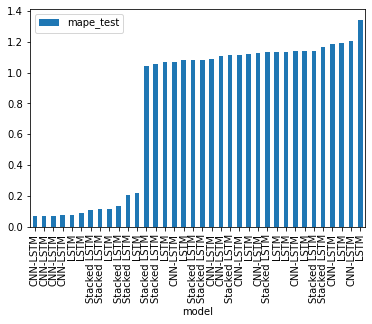

In [125]:
metrics_df.sort_values(by=['mape_test'], ascending=True).plot.bar(x='model', y='mape_test')
plt.show()

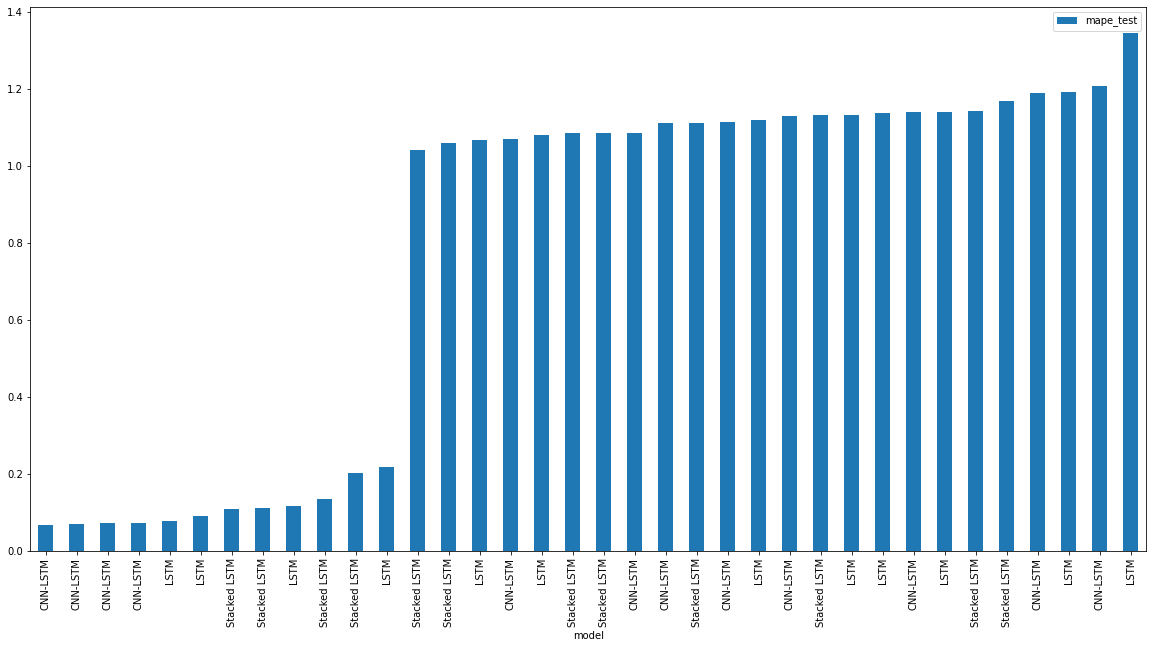

In [131]:
metrics_df.sort_values(by=['mape_test'], ascending=True).plot.bar(x='model', y='mape_test', figsize=(20,10))
plt.show()

[]

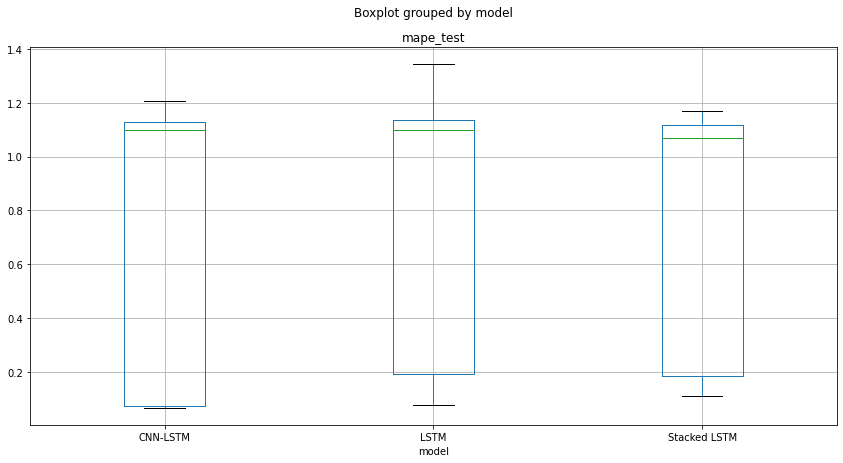

In [137]:
metrics_df.boxplot(column=['mape_test'], by='model', figsize=(14, 7))
plt.plot()

In [138]:
for model in ['LSTM', 'Stacked LSTM', 'CNN-LSTM']:
  print(f"Best Performing {model} model")
  df = metrics_df[metrics_df.model == model].sort_values(by=['mape_test'], ascending=True)
  display(df)

Best Performing LSTM model


model  interval                            target  rmse_train   rmse_test  \
27  LSTM      20.0                             Close   34.693112  285.881608   
18  LSTM      10.0                             Close   41.877384  309.530807   
9   LSTM       5.0                             Close   38.751325  392.839031   
0   LSTM       3.0                             Close   36.851874  734.648883   
11  LSTM       5.0  Percentage Change in Close Price    0.050754    0.050775   
2   LSTM       3.0  Percentage Change in Close Price    0.050781    0.050885   
20  LSTM      10.0  Percentage Change in Close Price    0.050857    0.050859   
10  LSTM       5.0             Change in Close Price   26.346218  143.397685   
1   LSTM       3.0             Change in Close Price   26.001182  143.031097   
28  LSTM      20.0             Change in Close Price   26.076243  144.052543   
19  LSTM      10.0             Change in Close Price   25.392659  143.438623   
29  LSTM      20.0  Percentage Change in Close Price    0.051484    0.050486   

    mape_train  mape_test  
27    0.049407   0.078157  
18    0.100758   0.088909  
9     0.074288   0.114928  
0     0.060925   0.218242  
11    1.252258   1.065988  
2     1.292276   1.080468  
20    1.528630   1.117872  
10   10.011183   1.131371  
1     8.719886   1.136916  
28    8.944603   1.140061  
19    5.431628   1.191852  
29    2.547091   1.344300

Best Performing Stacked LSTM model


model  interval                            target  rmse_train  \
30  Stacked LSTM      20.0                             Close   39.779148   
3   Stacked LSTM       3.0                             Close   36.790659   
12  Stacked LSTM       5.0                             Close   41.099725   
21  Stacked LSTM      10.0                             Close   52.526147   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.050935   
13  Stacked LSTM       5.0             Change in Close Price   25.243849   
22  Stacked LSTM      10.0             Change in Close Price   25.360225   
4   Stacked LSTM       3.0             Change in Close Price   25.208933   
31  Stacked LSTM      20.0             Change in Close Price   26.989171   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.051042   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050894   
5   Stacked LSTM       3.0  Percentage Change in Close Price    0.050854   

     rmse_test  mape_train  mape_test  
30  386.706820    0.062820   0.108740  
3   376.804230    0.065122   0.111980  
12  458.230788    0.068784   0.133864  
21  680.730406    0.077350   0.202658  
23    0.050735    1.333161   1.040894  
13  142.218001    3.681791   1.057726  
22  142.639252    4.812479   1.083451  
4   141.967711    3.842025   1.085026  
31  143.466786   12.416352   1.111378  
32    0.049935    1.624294   1.130794  
14    0.050776    1.762738   1.140443  
5     0.050920    1.600195   1.167843

Best Performing CNN-LSTM model


model  interval                            target  rmse_train  \
6   CNN-LSTM       3.0                             Close   33.696395   
15  CNN-LSTM       5.0                             Close   35.396801   
33  CNN-LSTM      20.0                             Close   40.684156   
24  CNN-LSTM      10.0                             Close   42.874214   
26  CNN-LSTM      10.0  Percentage Change in Close Price    0.050836   
34  CNN-LSTM      20.0             Change in Close Price   25.688029   
25  CNN-LSTM      10.0             Change in Close Price   26.443657   
16  CNN-LSTM       5.0             Change in Close Price   25.293831   
17  CNN-LSTM       5.0  Percentage Change in Close Price    0.050734   
8   CNN-LSTM       3.0  Percentage Change in Close Price    0.050337   
35  CNN-LSTM      20.0  Percentage Change in Close Price    0.050821   
7   CNN-LSTM       3.0             Change in Close Price   25.473147   

     rmse_test  mape_train  mape_test  
6   275.468561    0.061355   0.067199  
15  235.754106    0.049197   0.069253  
33  264.665106    0.103066   0.070617  
24  275.504913    0.067602   0.072620  
26    0.050745    1.501053   1.069149  
34  143.761406    6.691007   1.085223  
25  142.850033   10.037118   1.110361  
16  142.441416    3.164380   1.113049  
17    0.050950    1.506289   1.127671  
8     0.050781    2.521641   1.138557  
35    0.049953    2.218186   1.189064  
7   142.622152    6.954955   1.206444

[]

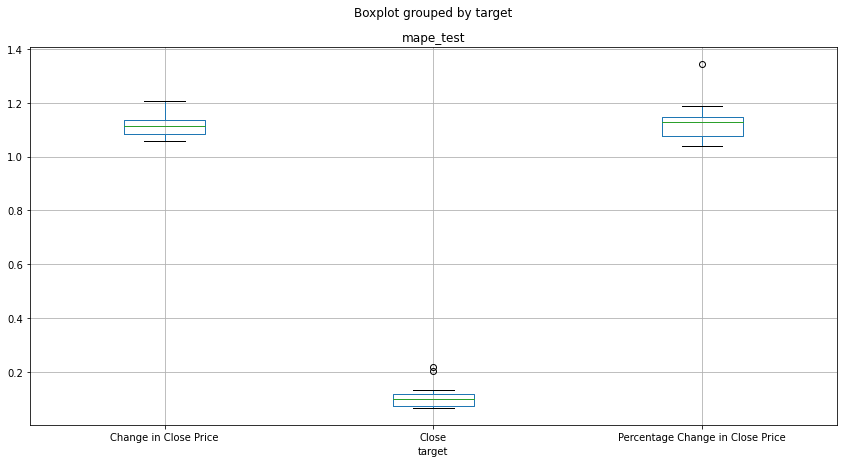

In [140]:
metrics_df.boxplot(column=['mape_test'], by='target', figsize=(14, 7))
plt.plot()

[]

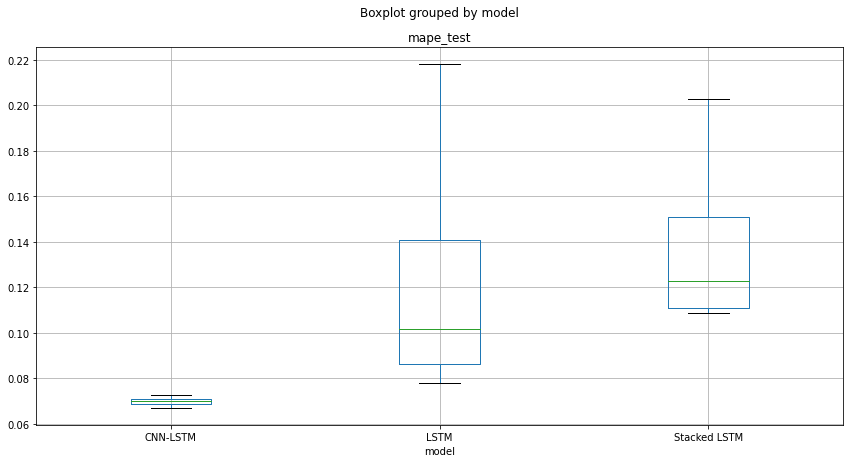

In [139]:
metrics_df[metrics_df.target == 'Close'].boxplot(column=['mape_test'], by='model', figsize=(14, 7))
plt.plot()

In [99]:
# Display best performing model on Close price
metrics_df[metrics_df.target == 'Close'].sort_values(by=['mape_test'], ascending=True)

model  interval target  rmse_train   rmse_test  mape_train  \
6       CNN-LSTM       3.0  Close   33.696395  275.468561    0.061355   
15      CNN-LSTM       5.0  Close   35.396801  235.754106    0.049197   
33      CNN-LSTM      20.0  Close   40.684156  264.665106    0.103066   
24      CNN-LSTM      10.0  Close   42.874214  275.504913    0.067602   
27          LSTM      20.0  Close   34.693112  285.881608    0.049407   
18          LSTM      10.0  Close   41.877384  309.530807    0.100758   
30  Stacked LSTM      20.0  Close   39.779148  386.706820    0.062820   
3   Stacked LSTM       3.0  Close   36.790659  376.804230    0.065122   
9           LSTM       5.0  Close   38.751325  392.839031    0.074288   
12  Stacked LSTM       5.0  Close   41.099725  458.230788    0.068784   
21  Stacked LSTM      10.0  Close   52.526147  680.730406    0.077350   
0           LSTM       3.0  Close   36.851874  734.648883    0.060925   

    mape_test  
6    0.067199  
15   0.069253  
33   0.070617  
24   0.072620  
27   0.078157  
18   0.088909  
30   0.108740  
3    0.111980  
9    0.114928  
12   0.133864  
21   0.202658  
0    0.218242

### Evaluate By Window Size

[]

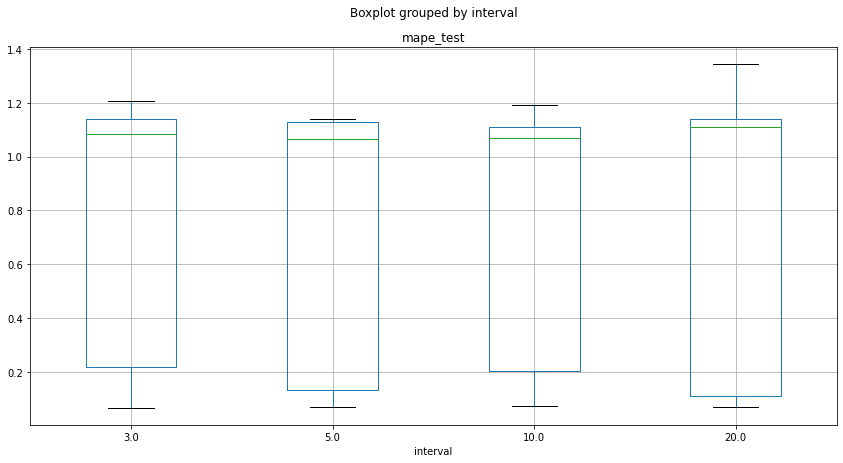

In [142]:
metrics_df.boxplot(column=['mape_test'], by='interval', figsize=(14, 7))
plt.plot()

In [103]:
# Display best performing model on Close price
for i in [3,5,10,20]:
  display(metrics_df[metrics_df.interval==i].sort_values(by=['mape_test'], ascending=True))

model  interval                            target  rmse_train  \
6      CNN-LSTM       3.0                             Close   33.696395   
3  Stacked LSTM       3.0                             Close   36.790659   
0          LSTM       3.0                             Close   36.851874   
2          LSTM       3.0  Percentage Change in Close Price    0.050781   
4  Stacked LSTM       3.0             Change in Close Price   25.208933   
1          LSTM       3.0             Change in Close Price   26.001182   
8      CNN-LSTM       3.0  Percentage Change in Close Price    0.050337   
5  Stacked LSTM       3.0  Percentage Change in Close Price    0.050854   
7      CNN-LSTM       3.0             Change in Close Price   25.473147   

    rmse_test  mape_train  mape_test  
6  275.468561    0.061355   0.067199  
3  376.804230    0.065122   0.111980  
0  734.648883    0.060925   0.218242  
2    0.050885    1.292276   1.080468  
4  141.967711    3.842025   1.085026  
1  143.031097    8.719886   1.136916  
8    0.050781    2.521641   1.138557  
5    0.050920    1.600195   1.167843  
7  142.622152    6.954955   1.206444

model  interval                            target  rmse_train  \
15      CNN-LSTM       5.0                             Close   35.396801   
9           LSTM       5.0                             Close   38.751325   
12  Stacked LSTM       5.0                             Close   41.099725   
13  Stacked LSTM       5.0             Change in Close Price   25.243849   
11          LSTM       5.0  Percentage Change in Close Price    0.050754   
16      CNN-LSTM       5.0             Change in Close Price   25.293831   
17      CNN-LSTM       5.0  Percentage Change in Close Price    0.050734   
10          LSTM       5.0             Change in Close Price   26.346218   
14  Stacked LSTM       5.0  Percentage Change in Close Price    0.050894   

     rmse_test  mape_train  mape_test  
15  235.754106    0.049197   0.069253  
9   392.839031    0.074288   0.114928  
12  458.230788    0.068784   0.133864  
13  142.218001    3.681791   1.057726  
11    0.050775    1.252258   1.065988  
16  142.441416    3.164380   1.113049  
17    0.050950    1.506289   1.127671  
10  143.397685   10.011183   1.131371  
14    0.050776    1.762738   1.140443

model  interval                            target  rmse_train  \
24      CNN-LSTM      10.0                             Close   42.874214   
18          LSTM      10.0                             Close   41.877384   
21  Stacked LSTM      10.0                             Close   52.526147   
23  Stacked LSTM      10.0  Percentage Change in Close Price    0.050935   
26      CNN-LSTM      10.0  Percentage Change in Close Price    0.050836   
22  Stacked LSTM      10.0             Change in Close Price   25.360225   
25      CNN-LSTM      10.0             Change in Close Price   26.443657   
20          LSTM      10.0  Percentage Change in Close Price    0.050857   
19          LSTM      10.0             Change in Close Price   25.392659   

     rmse_test  mape_train  mape_test  
24  275.504913    0.067602   0.072620  
18  309.530807    0.100758   0.088909  
21  680.730406    0.077350   0.202658  
23    0.050735    1.333161   1.040894  
26    0.050745    1.501053   1.069149  
22  142.639252    4.812479   1.083451  
25  142.850033   10.037118   1.110361  
20    0.050859    1.528630   1.117872  
19  143.438623    5.431628   1.191852

model  interval                            target  rmse_train  \
33      CNN-LSTM      20.0                             Close   40.684156   
27          LSTM      20.0                             Close   34.693112   
30  Stacked LSTM      20.0                             Close   39.779148   
34      CNN-LSTM      20.0             Change in Close Price   25.688029   
31  Stacked LSTM      20.0             Change in Close Price   26.989171   
32  Stacked LSTM      20.0  Percentage Change in Close Price    0.051042   
28          LSTM      20.0             Change in Close Price   26.076243   
35      CNN-LSTM      20.0  Percentage Change in Close Price    0.050821   
29          LSTM      20.0  Percentage Change in Close Price    0.051484   

     rmse_test  mape_train  mape_test  
33  264.665106    0.103066   0.070617  
27  285.881608    0.049407   0.078157  
30  386.706820    0.062820   0.108740  
34  143.761406    6.691007   1.085223  
31  143.466786   12.416352   1.111378  
32    0.049935    1.624294   1.130794  
28  144.052543    8.944603   1.140061  
35    0.049953    2.218186   1.189064  
29    0.050486    2.547091   1.344300

In [107]:
metrics_df['mape_test'].mean()

0.7889741113401798

In [143]:
# metrics_df[metrics_df.interval==i].sort_values(by=['mape_test'], ascending=True)
print("Interval mean MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].mean())
print("Interval min MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].min())
print("Interval max MAPE")
print(metrics_df.groupby(by='interval')['mape_test'].max())

Interval mean MAPE
interval
3.0     0.801408
5.0     0.772699
10.0    0.775307
20.0    0.806482
Name: mape_test, dtype: float64
Interval min MAPE
interval
3.0     0.067199
5.0     0.069253
10.0    0.072620
20.0    0.070617
Name: mape_test, dtype: float64
Interval max MAPE
interval
3.0     1.206444
5.0     1.140443
10.0    1.191852
20.0    1.344300
Name: mape_test, dtype: float64


In [144]:
interval_group_df = metrics_df.groupby(by='interval')['mape_test'].agg(['mean', 'min', 'max'])

In [145]:
display(interval_group_df.sort_values(by='mean', ascending=True))
display(interval_group_df.sort_values(by='min', ascending=True))
display(interval_group_df.sort_values(by='max', ascending=False))

mean       min       max
interval                              
5.0       0.772699  0.069253  1.140443
10.0      0.775307  0.072620  1.191852
3.0       0.801408  0.067199  1.206444
20.0      0.806482  0.070617  1.344300

mean       min       max
interval                              
3.0       0.801408  0.067199  1.206444
5.0       0.772699  0.069253  1.140443
20.0      0.806482  0.070617  1.344300
10.0      0.775307  0.072620  1.191852

mean       min       max
interval                              
20.0      0.806482  0.070617  1.344300
3.0       0.801408  0.067199  1.206444
10.0      0.775307  0.072620  1.191852
5.0       0.772699  0.069253  1.140443

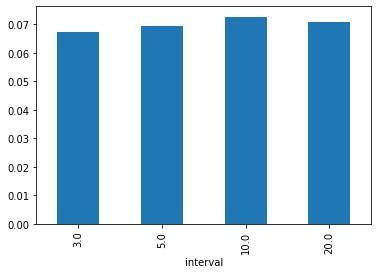

In [149]:
interval_group_df['min'].plot.bar()